In [1]:
# install packages here

In [2]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from tabulate import tabulate
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.svm import SVC # support vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, classification_report

sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
# Load dataset
from google.colab import drive

drive.mount('/content/drive')

path = r'/content/drive/MyDrive/datasets/bank-additional-full.csv'

df=pd.read_csv(path, sep=';', index_col=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [5]:
df.tail()


age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.shape


(41188, 21)

In [9]:
df.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
# Change object data type to categorical data type
df = df.astype({'job':'category', 'marital':'category', 'education':'category', 'default':'category', 'housing':'category', 'loan':'category', 'contact':'category', 'month':'category', 'day_of_week':'category', 'poutcome':'category', 'y':'category'})


In [11]:
df.dtypes


age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

In [12]:
# Change column names
new_column_names = {
    'contact': 'contact_type',
    'duration': 'last_contact_duration',
    'pdays': 'passed_days',
    'poutcome': 'previous_outcome',
    'emp.var.rate': 'employment_variation_rate',
    'cons.price.idx': 'consumer_price_index',
    'cons.conf.idx': 'consumer_confidence_index',
    'nr.employed': 'number_of_employees'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)


In [13]:
# Create a column called has_term_deposit which is going to represent 0 for the negative class and 1 for the positive class.
df['has_term_deposit'] = (df.y == 'yes').astype('int')


In [14]:
df.describe().T


count         mean         std       min  \
age                        41188.0    40.024060   10.421250    17.000   
last_contact_duration      41188.0   258.285010  259.279249     0.000   
campaign                   41188.0     2.567593    2.770014     1.000   
passed_days                41188.0   962.475454  186.910907     0.000   
previous                   41188.0     0.172963    0.494901     0.000   
employment_variation_rate  41188.0     0.081886    1.570960    -3.400   
consumer_price_index       41188.0    93.575664    0.578840    92.201   
consumer_confidence_index  41188.0   -40.502600    4.628198   -50.800   
euribor3m                  41188.0     3.621291    1.734447     0.634   
number_of_employees        41188.0  5167.035911   72.251528  4963.600   
has_term_deposit           41188.0     0.112654    0.316173     0.000   

                                25%       50%       75%       max  
age                          32.000    38.000    47.000    98.000  
last_contact_duration       102.000   180.000   319.000  4918.000  
campaign                      1.000     2.000     3.000    56.000  
passed_days                 999.000   999.000   999.000   999.000  
previous                      0.000     0.000     0.000     7.000  
employment_variation_rate    -1.800     1.100     1.400     1.400  
consumer_price_index         93.075    93.749    93.994    94.767  
consumer_confidence_index   -42.700   -41.800   -36.400   -26.900  
euribor3m                     1.344     4.857     4.961     5.045  
number_of_employees        5099.100  5191.000  5228.100  5228.100  
has_term_deposit              0.000     0.000     0.000     1.000

In [15]:
df.isnull().sum()


age                          0
job                          0
marital                      0
education                    0
default                      0
housing                      0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
last_contact_duration        0
campaign                     0
passed_days                  0
previous                     0
previous_outcome             0
employment_variation_rate    0
consumer_price_index         0
consumer_confidence_index    0
euribor3m                    0
number_of_employees          0
y                            0
has_term_deposit             0
dtype: int64

In [16]:
# Check the duplicated rows
df.duplicated().sum()


12

In [17]:
# Print duplicated values

"""
Duplicated rows can introduce bias and skew the analysis results. By removing duplicated rows, analysts can ensure the accuracy and integrity of the data, leading to more reliable insights and conclusions.
"""

duplicated_rows = df[df.duplicated(keep=False)]  # keep=False marks all occurrences as True
duplicated_rows


age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
20534   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
25217   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
28477   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
36951   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

      contact_type month day_of_week  ...  passed_days  previous  \
1265     telephone   may         thu  ...          999         0   
1266     telephone   may         thu  ...          999         0   
12260    telephone   jul         thu  ...          999         0   
12261    telephone   jul         thu  ...          999         0   
14155     cellular   jul         mon  ...          999         0   
14234     cellular   jul         mon  ...          999         0   
16819     cellular   jul         thu  ...          999         0   
16956     cellular   jul         thu  ...          999         0   
18464     cellular   jul         thu  ...          999         0   
18465     cellular   jul         thu  ...          999         0   
20072     cellular   aug         mon  ...          999         0   
20216     cellular   aug         mon  ...          999         0   
20531     cellular   aug         tue  ...          999         0   
20534     cellular   aug         tue  ...          999         0   
25183     cellular   nov         tue  ...          999         0   
25217     cellular   nov         tue  ...          999         0   
28476     cellular   apr         tue  ...          999         0   
28477     cellular   apr         tue  ...          999         0   
32505     cellular   may         fri  ...          999         0   
32516     cellular   may         fri  ...          999         0   
36950     cellular   jul         thu  ...          999         0   
36951     cellular   jul         thu  ...          999         0   
38255    telephone   oct         tue  ...          999         0   
38281    telephone   oct         tue  ...          999         0   

       previous_outcome  employment_variation_rate consumer_price_index  \
1265        nonexistent                        1.1               93.994   
1266        nonexistent                        1.1               93.994   
12260       nonexistent                        1.4               93.918   
12261

In [18]:
"""
For duplicated values, we can do this:
    - Review and Understand.
    - Address Data Entry Issues.
    - Aggregate Duplicates.
    - Flag Duplicates.
    - Handle Partial Duplicates.
    - Identify and Remove Duplicates.
"""

df = df.drop_duplicates()


In [19]:
df.duplicated().sum()


0

In [20]:
# Check the missing values
df.isnull().sum()


age                          0
job                          0
marital                      0
education                    0
default                      0
housing                      0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
last_contact_duration        0
campaign                     0
passed_days                  0
previous                     0
previous_outcome             0
employment_variation_rate    0
consumer_price_index         0
consumer_confidence_index    0
euribor3m                    0
number_of_employees          0
y                            0
has_term_deposit             0
dtype: int64

In [21]:
df.shape

(41176, 22)

In [22]:
# Explore unique values and their counts in a specified column

def explore_column(df, column_name):

    unique_values = df[column_name].unique()
    value_counts = df[column_name].value_counts()

    return unique_values, value_counts


In [23]:
unique_values, value_counts = explore_column(df, 'age')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 95, 98]

 ---------------------------------------- 

Value Counts:
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64


In [24]:
unique_values, value_counts = explore_column(df, 'job')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']

 ---------------------------------------- 

Value Counts:
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [25]:
unique_values, value_counts = explore_column(df, 'marital')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['divorced', 'married', 'single', 'unknown']

 ---------------------------------------- 

Value Counts:
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64


In [26]:
unique_values, value_counts = explore_column(df, 'education')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']

 ---------------------------------------- 

Value Counts:
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64


In [27]:
unique_values, value_counts = explore_column(df, 'default')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['no', 'unknown', 'yes']

 ---------------------------------------- 

Value Counts:
no         32577
unknown     8596
yes            3
Name: default, dtype: int64


In [28]:
unique_values, value_counts = explore_column(df, 'housing')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['no', 'unknown', 'yes']

 ---------------------------------------- 

Value Counts:
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64


In [29]:
unique_values, value_counts = explore_column(df, 'loan')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['no', 'unknown', 'yes']

 ---------------------------------------- 

Value Counts:
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64


In [30]:
unique_values, value_counts = explore_column(df, 'contact_type')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['cellular', 'telephone']

 ---------------------------------------- 

Value Counts:
cellular     26135
telephone    15041
Name: contact_type, dtype: int64


In [31]:
unique_values, value_counts = explore_column(df, 'month')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']

 ---------------------------------------- 

Value Counts:
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


In [32]:
unique_values, value_counts = explore_column(df, 'day_of_week')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['fri', 'mon', 'thu', 'tue', 'wed']

 ---------------------------------------- 

Value Counts:
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


In [33]:
unique_values, value_counts = explore_column(df, 'last_contact_duration')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

In [34]:
unique_values, value_counts = explore_column(df, 'campaign')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 56]

 ---------------------------------------- 

Value Counts:
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64


In [35]:
unique_values, value_counts = explore_column(df, 'passed_days')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 999]

 ---------------------------------------- 

Value Counts:
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: passed_days, dtype: int64


In [36]:
unique_values, value_counts = explore_column(df, 'previous')

print("Unique Values:")
print(sorted(unique_values))

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[0, 1, 2, 3, 4, 5, 6, 7]

 ---------------------------------------- 

Value Counts:
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


In [37]:
unique_values, value_counts = explore_column(df, 'previous_outcome')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
['nonexistent', 'failure', 'success']
Categories (3, object): ['failure', 'nonexistent', 'success']

 ---------------------------------------- 

Value Counts:
nonexistent    35551
failure         4252
success         1373
Name: previous_outcome, dtype: int64


In [38]:
unique_values, value_counts = explore_column(df, 'employment_variation_rate')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]

 ---------------------------------------- 

Value Counts:
 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: employment_variation_rate, dtype: int64


In [39]:
unique_values, value_counts = explore_column(df, 'consumer_price_index')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]

 ---------------------------------------- 

Value Counts:
93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: consumer_price_index, dtype: int64


In [40]:
unique_values, value_counts = explore_column(df, 'consumer_confidence_index')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]

 ---------------------------------------- 

Value Counts:
-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: consumer_confidence_index, dtype: int64


In [41]:
unique_values, value_counts = explore_column(df, 'euribor3m')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.365 1.354 1.344 1.334 1.327 1.313 1.299 1.291 1.281
 1.266 1.25  1.244 1.259 1.264 1.27  1.262 1.26  1.268 1.286 1.252 1.235
 1.224 1.215 1.206 1.099 1.085 1.072 1.059 1.048 1.044 1.029 1.018 1.007
 0.996 0.979 0.969 0.944 0.937 0.933 0.927 0.921 0.914 0.908 0.903 0.899
 0.884 0.883 0.881 0.879 0.873 0.869 0.861 0.859 0.854 0.851 0.849 0.843
 0.838 0.834 0.829 0.825 0.821 0.819 0.8

In [42]:
unique_values, value_counts = explore_column(df, 'number_of_employees')

print("Unique Values:")
print(unique_values)

print("\n", '-' * 40, "\n")

print("Value Counts:")
print(value_counts)


Unique Values:
[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]

 ---------------------------------------- 

Value Counts:
5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: number_of_employees, dtype: int64


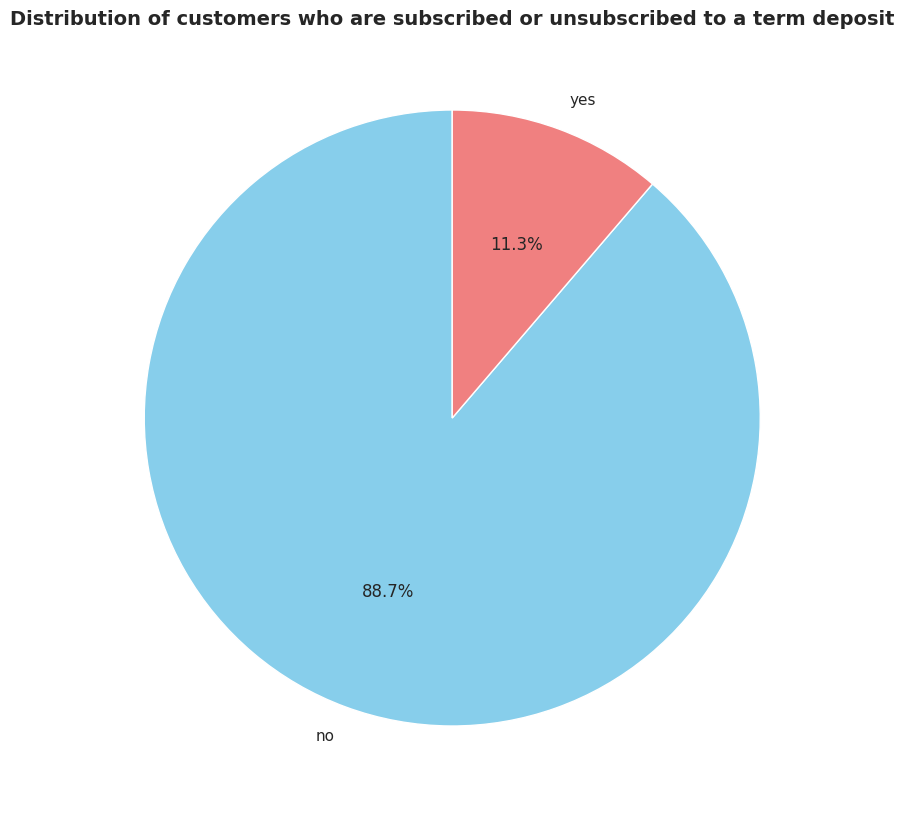

In [43]:
# Plot the (target) customers subscriptions to a term deposit

plt.figure(figsize=(20, 10))

counts = df['y'].value_counts()
labels = counts.index

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of customers who are subscribed or unsubscribed to a term deposit', fontsize=14, fontweight='bold')
plt.show()


In [44]:
# Plot customers subscriptions to a term deposit (Using plotly)
fig = px.pie(df, names='y', title='Distribution of customers who are subscribed or unsubscribed to a term deposit')
fig.show()


👆🏻 The dataset is imbalanced.

<Axes: >

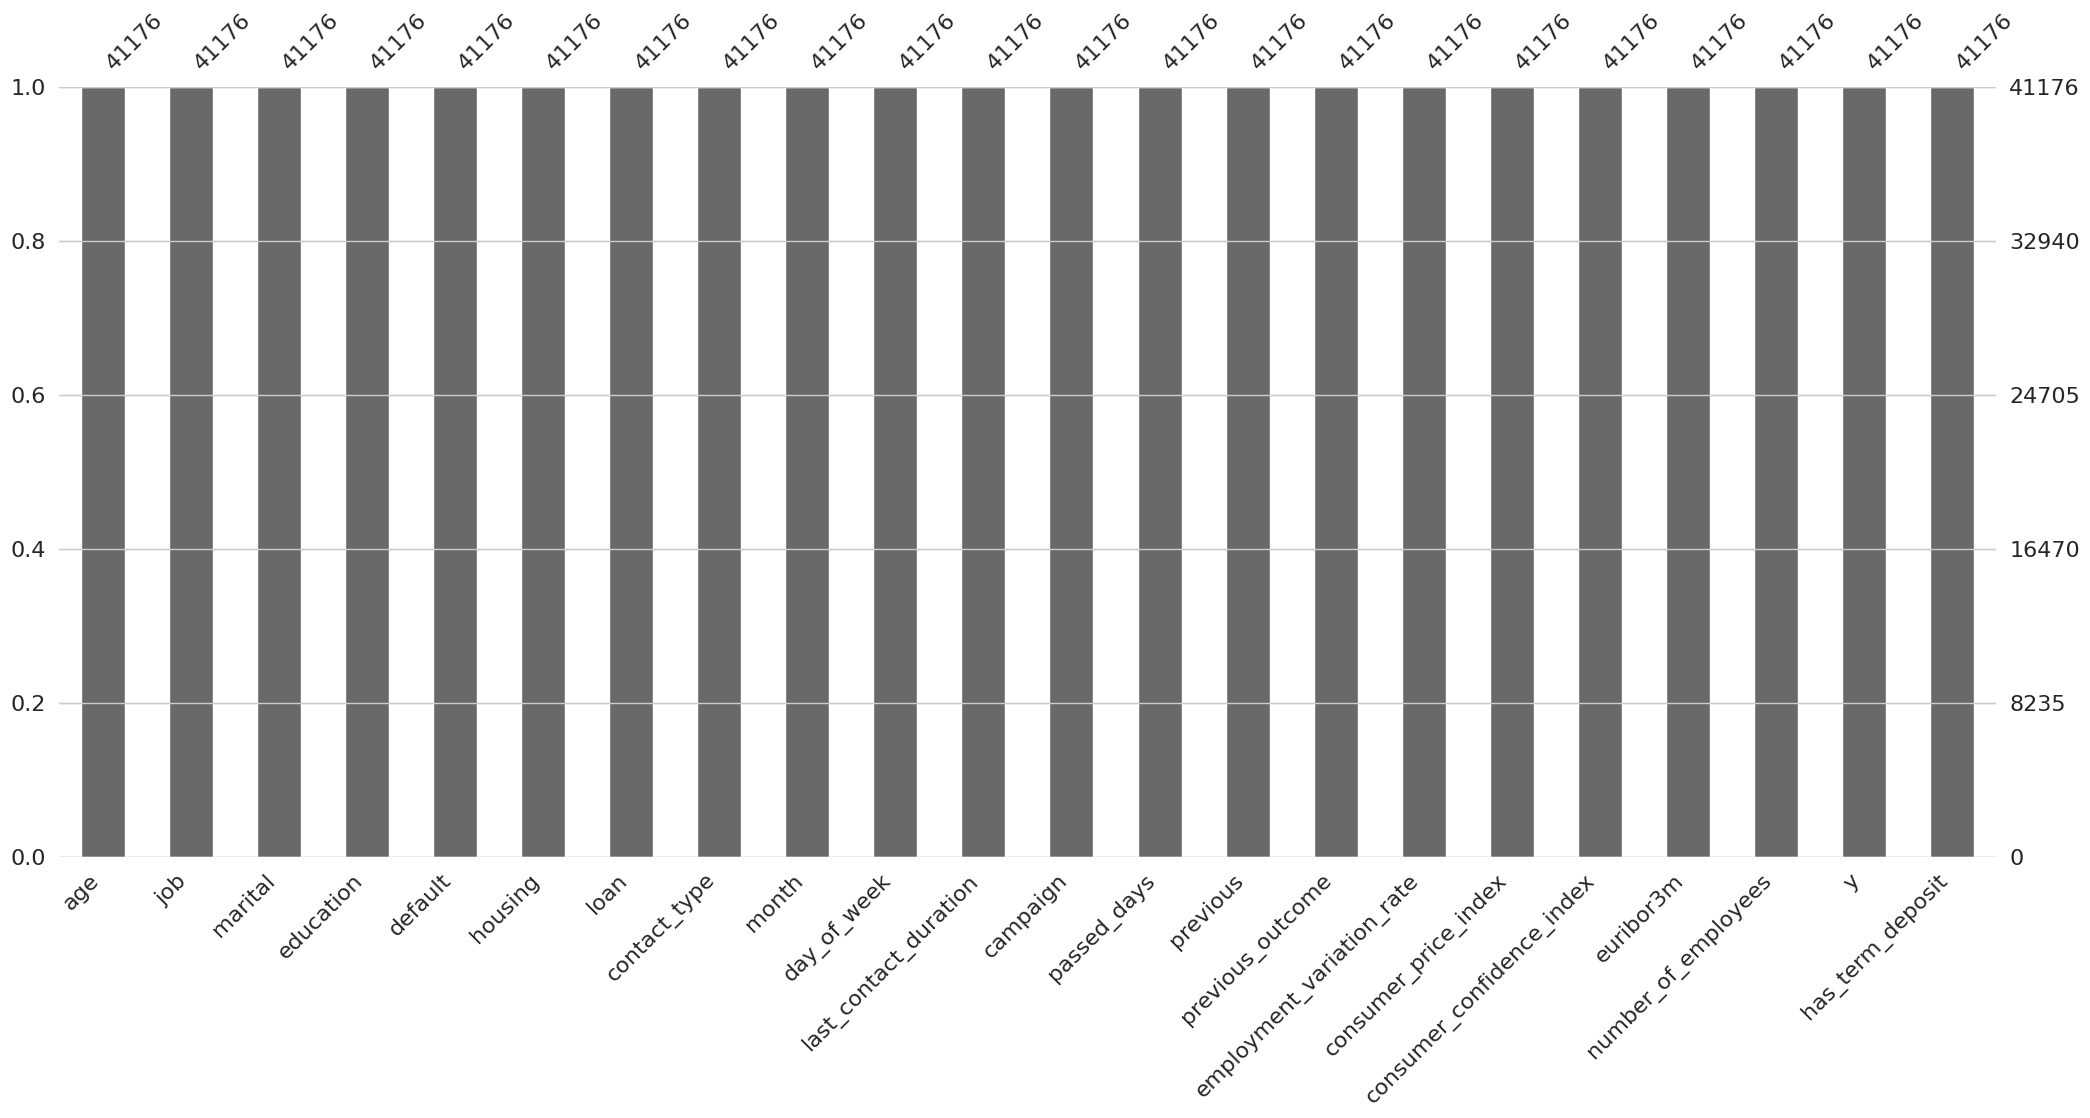

In [45]:
# Plot the missing values
msno.bar(df)


<Axes: >

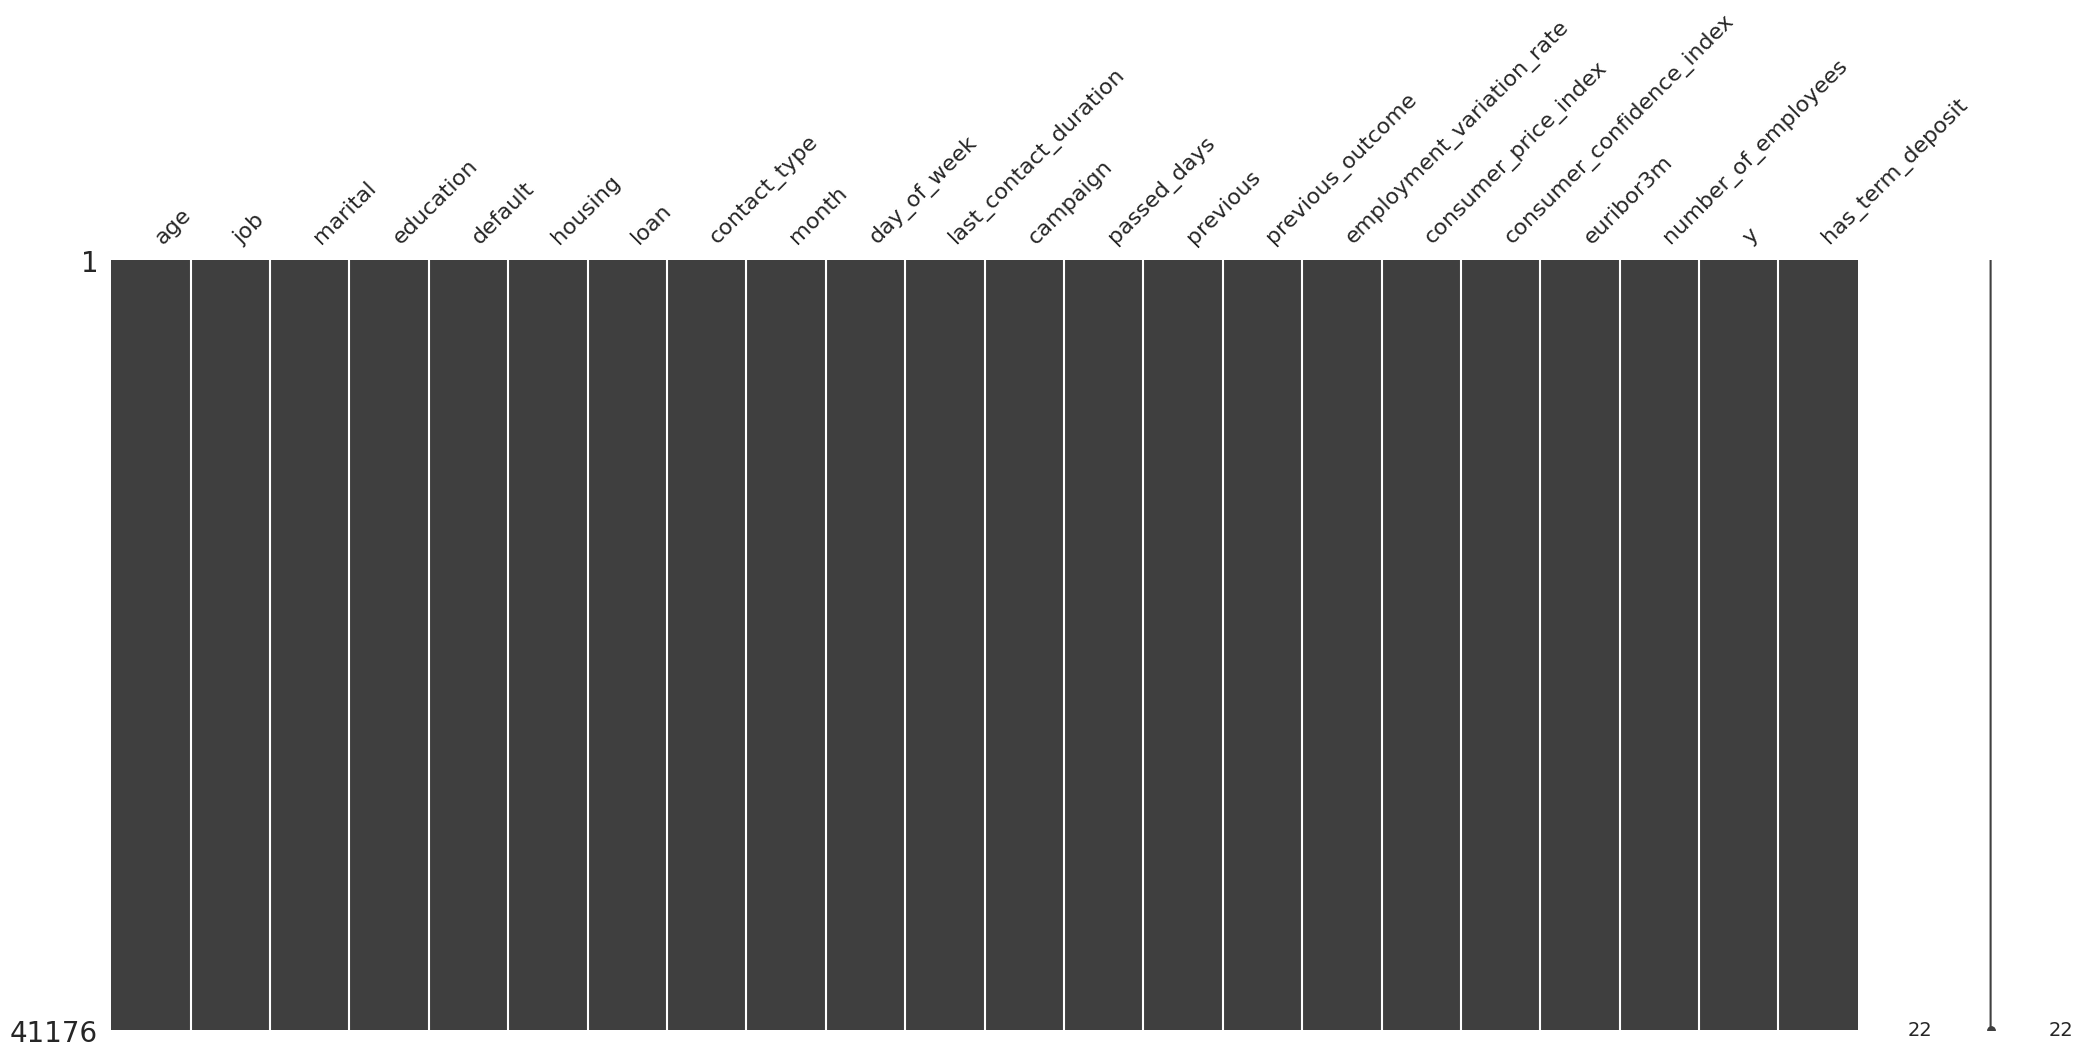

In [46]:
# Plot the missing values
msno.matrix(df)


In [47]:
df[list(df.columns)[:12]].sample(10)


age           job  marital          education  default housing loan  \
5070    42    management  married  university.degree       no      no   no   
17030   26    technician   single  university.degree       no      no   no   
29289   39      services  married        high.school       no      no   no   
38757   37        admin.   single        high.school       no      no  yes   
13539   31   blue-collar  married           basic.9y       no     yes   no   
568     23        admin.   single  university.degree       no      no   no   
34793   31      services   single        high.school  unknown     yes   no   
1803    32        admin.  married        high.school       no      no   no   
24587   38  entrepreneur  married           basic.9y       no     yes   no   
26719   32        admin.   single        high.school       no     yes   no   

      contact_type month day_of_week  last_contact_duration  campaign  
5070     telephone   may         fri                    206         1  
17030    telephone   jul         thu                    447         4  
29289     cellular   apr         fri                    185         2  
38757     cellular   nov         wed                    248         1  
13539     cellular   jul         thu                    192         1  
568      telephone   may         tue                    266         3  
34793     cellular   may         thu                    452         3  
1803     telephone   may         fri                    129         1  
24587     cellular   nov         mon                    555         1  
26719     cellular   nov         thu                    141         4

In [48]:
df[list(df.columns)[12:]].sample(10)


passed_days  previous previous_outcome  employment_variation_rate  \
11683          999         0      nonexistent                        1.4   
5428           999         0      nonexistent                        1.1   
18502          999         0      nonexistent                        1.4   
32284          999         0      nonexistent                       -1.8   
15687          999         0      nonexistent                        1.4   
1283           999         0      nonexistent                        1.1   
2865           999         0      nonexistent                        1.1   
31009          999         0      nonexistent                       -1.8   
5283           999         0      nonexistent                        1.1   
11574          999         0      nonexistent                        1.4   

       consumer_price_index  consumer_confidence_index  euribor3m  \
11683                94.465                      -41.8      4.959   
5428                 93.994                      -36.4      4.857   
18502                93.918                      -42.7      4.968   
32284                92.893                      -46.2      1.313   
15687                93.918                      -42.7      4.960   
1283                 93.994                      -36.4      4.855   
2865                 93.994                      -36.4      4.859   
31009                92.893                      -46.2      1.344   
5283                 93.994                      -36.4      4.857   
11574                94.465                      -41.8      4.959   

       number_of_employees   y  has_term_deposit  
11683               5228.1  no                 0  
5428                5191.0  no                 0  
18502               5228.1  no                 0  
32284               5099.1  no                 0  
15687               5228.1  no                 0  
1283                5191.0  no                 0  
2865                5191.0  no                 0  
31009               5099.1  no                 0  
5283                5191.0  no                 0  
11574               5228.1  no                 0

In [49]:
# Plot outliers for numerical variables using box plot

def plot_numerical_vars_with_outliers(df, column_name):
    plt.rcParams['axes.facecolor'] = '#f8fafc'
    plt.figure(figsize=(18, 10))

    sns.boxplot(x=df[column_name], palette='Paired')
    plt.title('Box Plot of Numerical Variables with Outliers')
    plt.show()


In [50]:
# Plot outliers for numerical variables using box plot (Plotly package)
def plot_numerical_vars_with_outliers_plotly(df, column_name, background_color='#f8fafc'):
    fig = go.Figure()

    # Add box plot
    fig.add_trace(go.Box(x=df[column_name], marker=dict(color='#f43f5e')))

    # Add mean as dotted line
    mean_value = df[column_name].mean()
    fig.add_trace(go.Scatter(x=[mean_value, mean_value], y=[0, 1], mode='lines', line=dict(dash='dash', color='black'), name='Mean'))

    # Update layout
    fig.update_layout(
        title=f'Box Plot of Numerical Variable {column_name} with Outliers',
        paper_bgcolor=background_color
    )

    fig.show()


In [51]:
# Plot distribution of categorical variables.
def plot_categorical_vars_distribution(df, column_name, background_color='#f8fafc', palette='pastel'):
    # Set background color
    plt.rcParams['axes.facecolor'] = background_color

    # Calculate percentage values
    total_count = len(df)
    percentage_values = (df[column_name].value_counts() / total_count) * 100

    # Create count plot
    plt.figure(figsize=(18, 10))
    ax = sns.countplot(x=df[column_name], palette=palette)

    # Add percentage labels and borders
    for p in ax.patches:
        percentage = f'{p.get_height() / total_count * 100:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

    # Customize the plot
    plt.title(f'Count Plot of Categorical Variable - {column_name}')
    plt.xticks(rotation=90)
    sns.despine(left=True, bottom=True)  # Remove spines on the left and bottom

    # Show the plot
    plt.show()


In [52]:
# Plot distribution of categorical variables (Using Plotly)
def plot_categorical_vars_distribution_plotly(df, column_name, background_color='#f8fafc'):
    # Calculate percentage values
    total_count = len(df)
    percentage_values = (df[column_name].value_counts() / total_count) * 100

    # Create a DataFrame with count and percentage values
    count_df = df[column_name].value_counts().reset_index()
    count_df.columns = [column_name, 'count']
    count_df['percentage'] = (count_df['count'] / total_count) * 100

    # Create a bar plot using Plotly
    fig = px.bar(count_df, x=column_name, y='count', color=column_name,
                 labels={'x': column_name, 'y': 'Count'}, title=f'Count Plot of Categorical Variable - {column_name}',
                 color_discrete_sequence=px.colors.qualitative.Pastel)

    # Add percentage labels and borders
    for bar in fig.data:
        percentage = f'{count_df[count_df[column_name] == bar.name]["percentage"].values[0]:.2f}%'
        bar.update(text=percentage, hoverinfo='text')

    # Customize the layout
    fig.update_layout(
        paper_bgcolor=background_color,
        xaxis_tickangle=-45
    )

    # Show the plot
    fig.show()

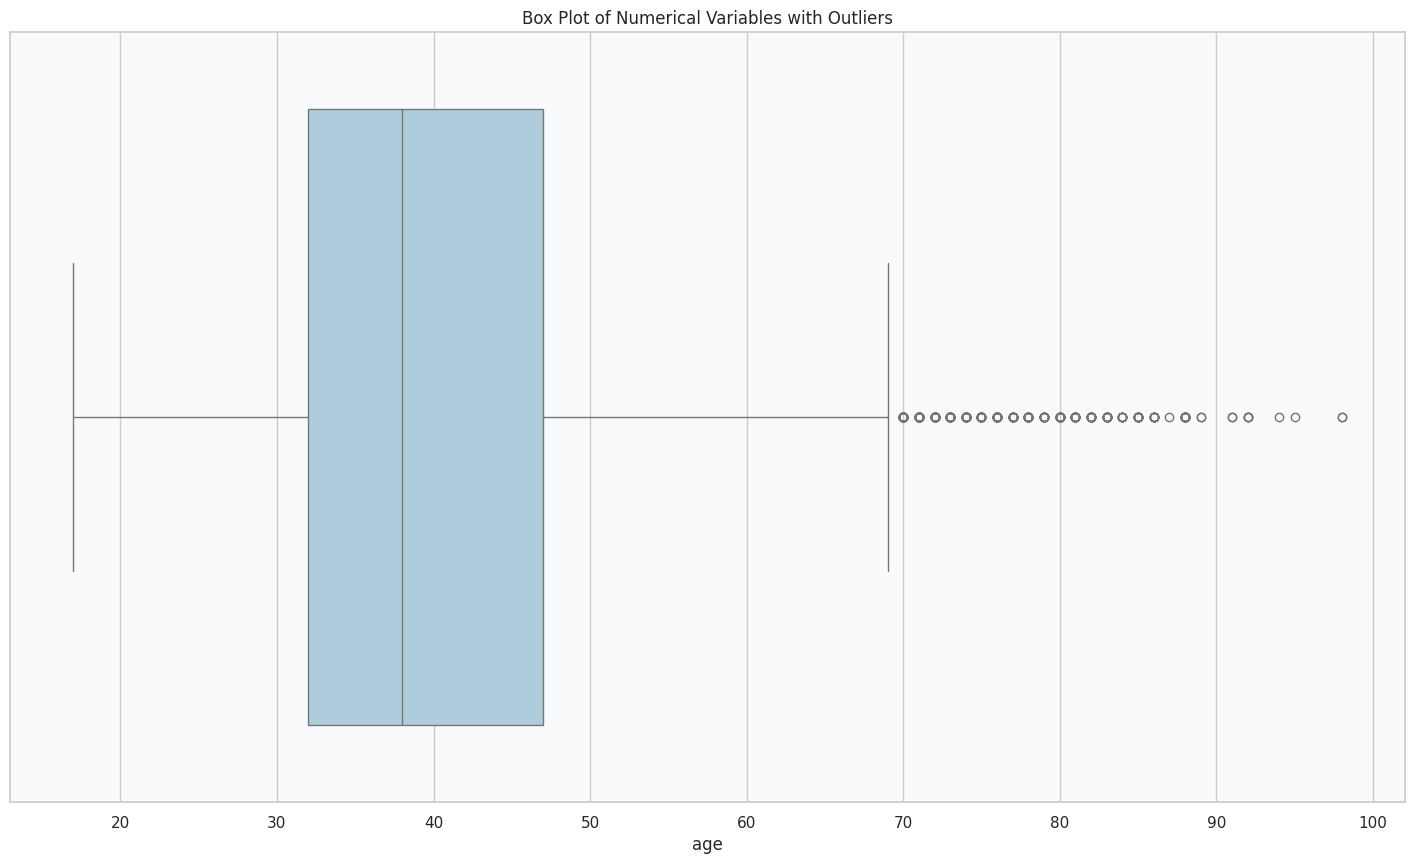

In [53]:
plot_numerical_vars_with_outliers(df, 'age')


In [54]:
plot_numerical_vars_with_outliers_plotly(df, 'age')


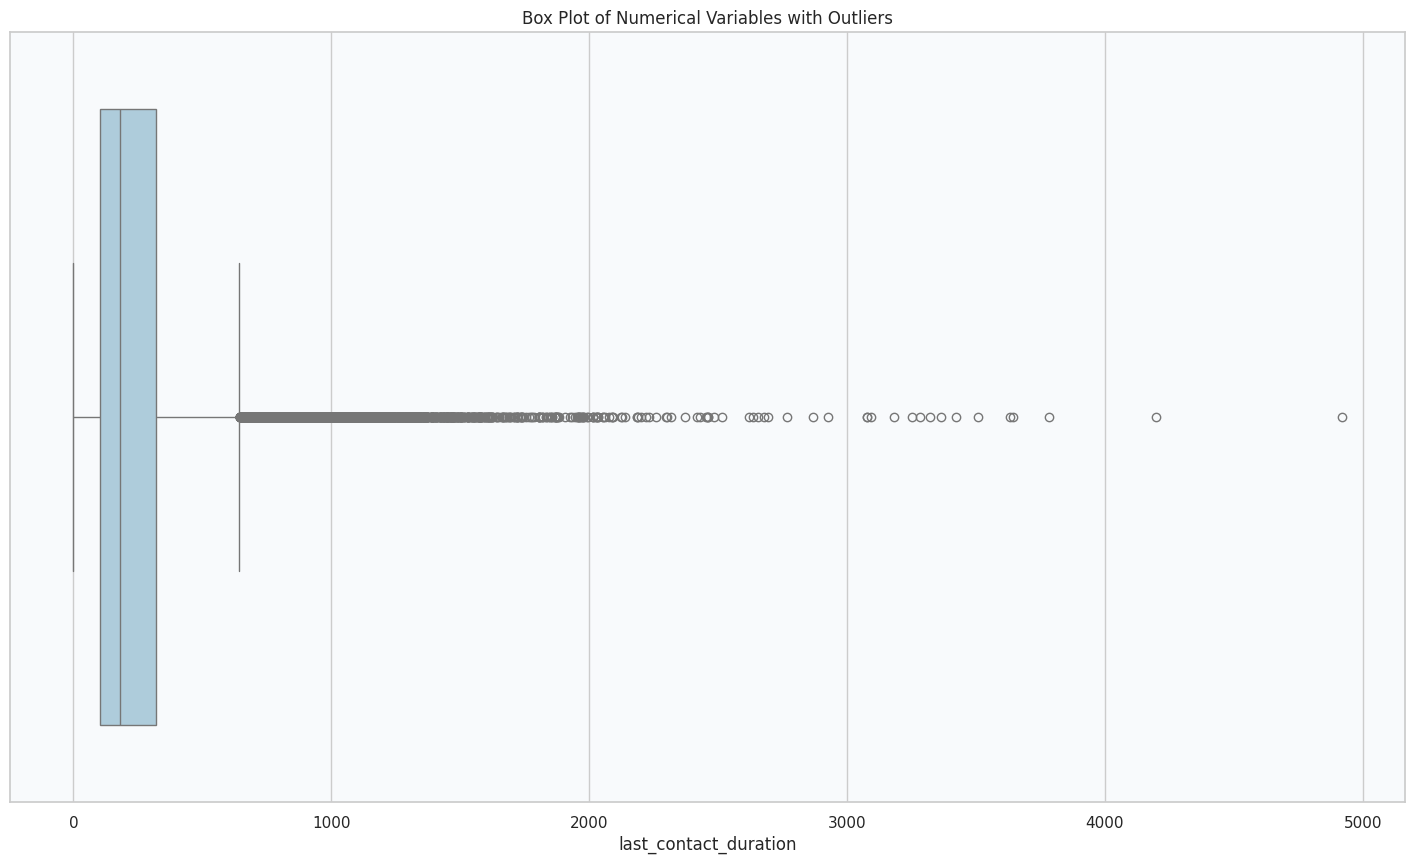

In [55]:
plot_numerical_vars_with_outliers(df, 'last_contact_duration')


In [56]:
plot_numerical_vars_with_outliers_plotly(df, 'last_contact_duration', '#E6ECF5')


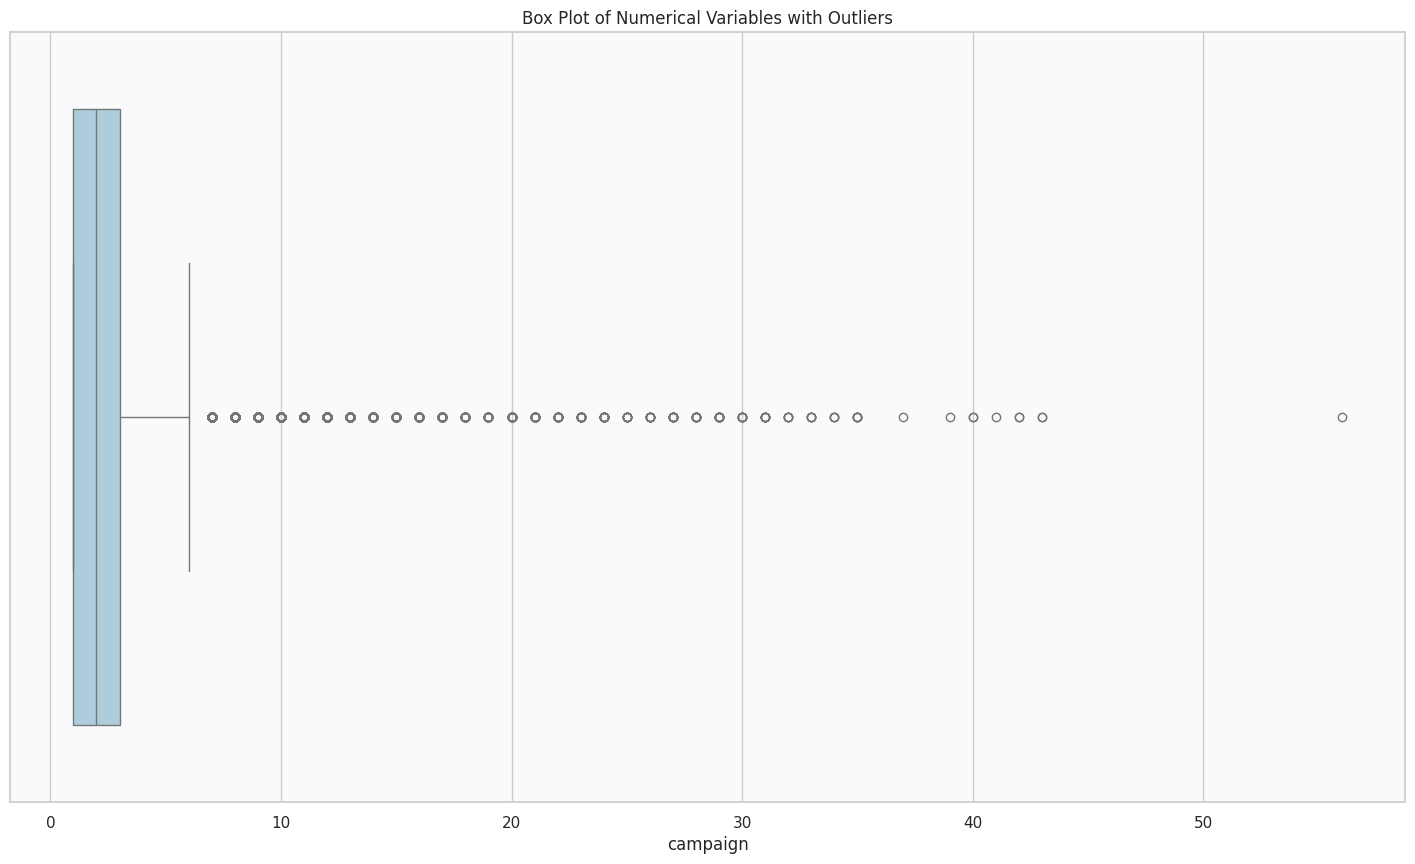

In [57]:
plot_numerical_vars_with_outliers(df, 'campaign')


In [58]:
plot_numerical_vars_with_outliers_plotly(df, 'campaign', '#E6ECF5')

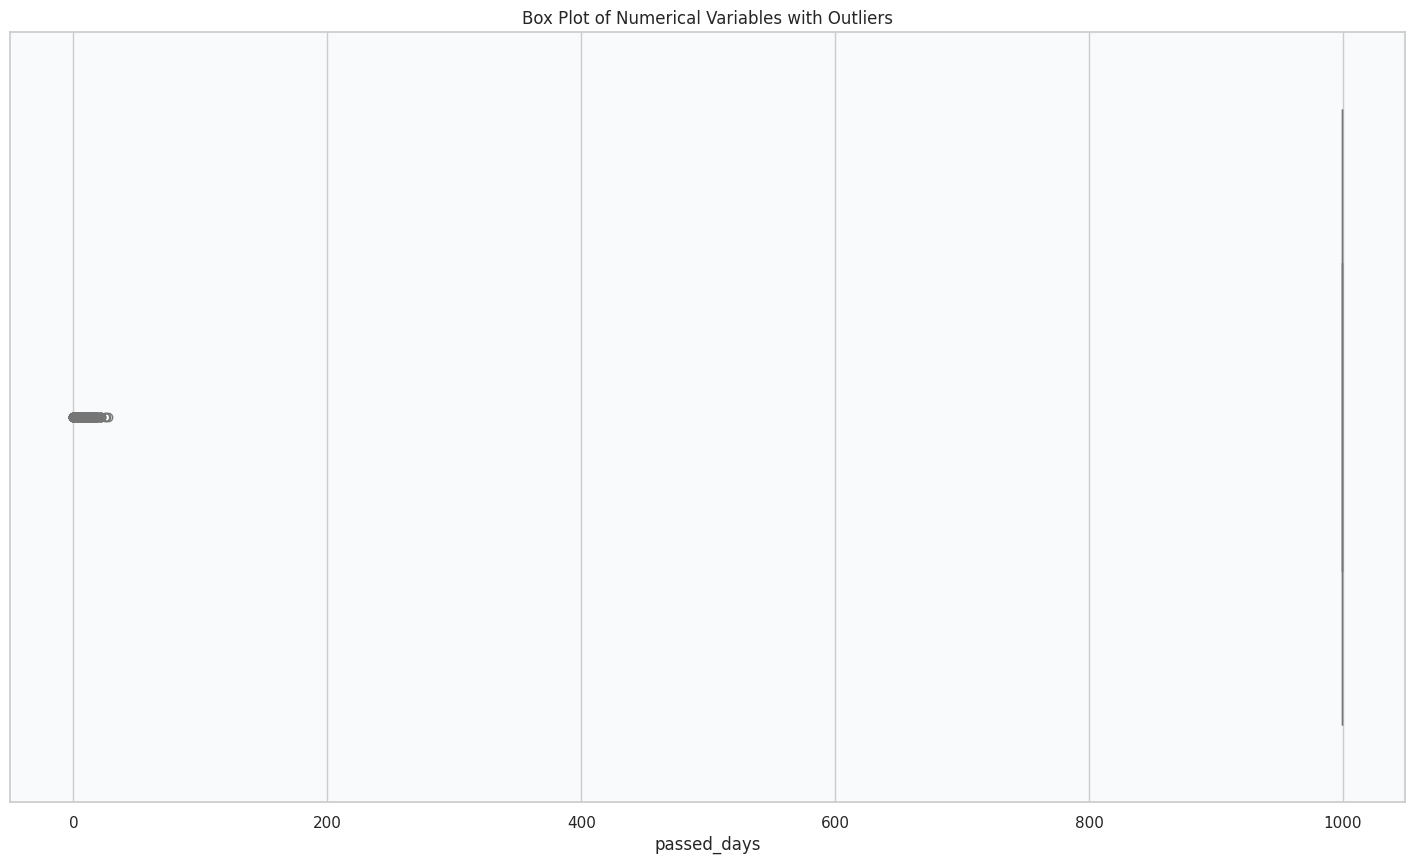

In [59]:
plot_numerical_vars_with_outliers(df, 'passed_days')


In [60]:
plot_numerical_vars_with_outliers_plotly(df, 'passed_days', '#E6ECF5')


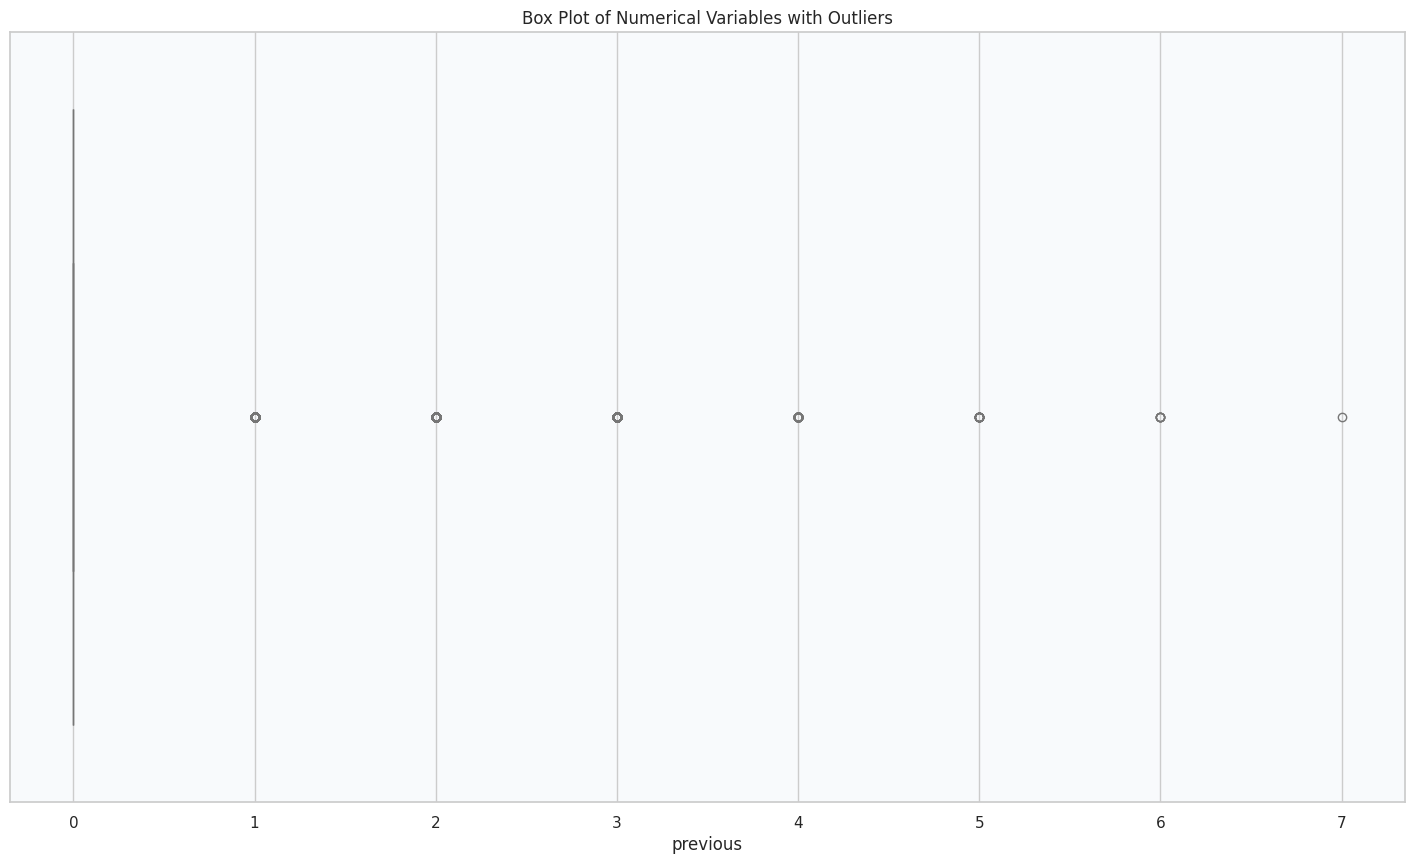

In [61]:
plot_numerical_vars_with_outliers(df, 'previous')

In [62]:
plot_numerical_vars_with_outliers_plotly(df, 'previous', '#E6ECF5')


### Handling outliers

In [63]:
# Create a copy of the dataset
df2 = df.copy()


In [64]:
# Using Z-scores [Count the number of outliers in a specific column of a dataset using Z-scores]

def detect_count_outliers(df, column_name, threshold=3):

    # Calculate Z-scores for the specified column
    z_scores = stats.zscore(df[column_name])

    # Identify outliers
    outliers_df = df[abs(z_scores) > threshold]

    # Count the number of outliers
    num_outliers = len(outliers_df)

    print(f"Number of outliers in '{column_name}': {num_outliers}")

    return num_outliers, outliers_df

In [65]:
# Handle outliers by replacing them with the median.
def handle_outliers_with_median(df, column_name, threshold=3):

    # Calculate Z-scores for the specified column
    z_scores = stats.zscore(df[column_name])

    # Replace outliers with the median
    df.loc[abs(z_scores) > threshold, column_name] = df[column_name].median()

    return df

In [66]:
num_outliers, outliers_df = detect_count_outliers(df2, 'age', threshold=3)
num_outliers
outliers_df


Number of outliers in 'age': 369


age      job   marital            education  default housing loan  \
27757   76  retired   married    university.degree       no      no  yes   
27780   73  retired   married    university.degree       no     yes   no   
27800   88  retired  divorced             basic.4y       no     yes   no   
27802   88  retired  divorced             basic.4y       no      no   no   
27805   88  retired  divorced             basic.4y       no     yes  yes   
...    ...      ...       ...                  ...      ...     ...  ...   
40986   84  retired  divorced             basic.4y  unknown     yes  yes   
40996   81  retired   married             basic.4y       no     yes   no   
41004   80  retired   married  professional.course       no     yes   no   
41183   73  retired   married  professional.course       no     yes   no   
41187   74  retired   married  professional.course       no     yes   no   

      contact_type month day_of_week  ...  passed_days  previous  \
27757     cellular   mar         thu  ...          999         0   
27780     cellular   mar         tue  ...          999         1   
27800     cellular   mar         wed  ...          999         0   
27802     cellular   mar         wed  ...          999         0   
27805     cellular   mar         wed  ...          999         0   
...            ...   ...         ...  ...          ...       ...   
40986     cellular   oct         mon  ...            3         1   
40996     cellular   oct         wed  ...          999         2   
41004     cellular   oct         thu  ...          999         1   
41183     cellular   nov         fri  ...          999         0   
41187     cellular   nov         fri  ...          999         1   

       previous_outcome  employment_variation_rate consumer_price_index  \
27757       nonexistent                       -1.8               92.843   
27780           failure                       -1.8               92.843   
27800       nonexistent                       -1.8               92.843   
27802       nonexistent                       -1.8               92.843   
27805       nonexistent                       -1.8               92.843   
...                 ...                        ...                  ...   
40986           success                       -1.1               94.601   
40996           failure                       -1.1               94.601   
41004           failure                       -1.1               94.601   
41183       nonexistent                       -1.1               94.767   
41187           failure                       -1.1               94.767   

       consumer_confidence_index  euribor3m  number_of_employees    y  \
27757                      -50.0      1.757               5099.1   no   
27780                      -50.0      1.687               5099.1   no   
27800                      -50.0      1.663               5099.1   no   
27802                      -50.0      1.663               5099.1  yes   
27805                      -50.0      1.663               5099.1  yes   
...                          ...        ...                  ...  ...   
40986                      -49.5      1.000               4963.6   no   
40996                      -49.5      1.016               4963.6  yes   
41004                      -49.5      1.025               4963.6  yes   
41183                      -50.8      1.028               4963.6  yes   
41187                      -50.8      1.028               4963.6   no   

       has_term_deposit  
27757                 0  
27780                 0  
27800                 0  
27802                 1  
27805                 1  
...                 ...  
40986                 0  
40996                 1  
41004                 1  
41183                 1  
41187                 0  

[369 rows x 22 columns]

In [67]:
df2 = handle_outliers_with_median(df2, 'age', threshold=3)


In [68]:
num_outliers, outliers_df = detect_count_outliers(df2, 'age', threshold=3)
num_outliers
outliers_df


Number of outliers in 'age': 133


age      job   marital            education  default housing loan  \
27713   70  retired  divorced             basic.4y       no     yes   no   
27837   70  retired   married             basic.4y       no     yes   no   
27838   70  retired   married             basic.4y       no      no   no   
27844   70  retired   married             basic.4y       no     yes   no   
27879   70   admin.  divorced    university.degree       no      no   no   
...    ...      ...       ...                  ...      ...     ...  ...   
40703   71  retired   married          high.school       no      no   no   
40886   70  retired   married             basic.4y  unknown      no   no   
40921   71  retired   married  professional.course       no     yes   no   
40933   71  retired   married  professional.course       no      no   no   
40951   70  retired   married  professional.course       no      no   no   

      contact_type month day_of_week  ...  passed_days  previous  \
27713     cellular   mar         mon  ...          999         0   
27837     cellular   mar         mon  ...          999         1   
27838     cellular   mar         mon  ...          999         1   
27844    telephone   mar         mon  ...          999         0   
27879     cellular   mar         mon  ...          999         0   
...            ...   ...         ...  ...          ...       ...   
40703     cellular   sep         mon  ...          999         0   
40886     cellular   oct         thu  ...           14         3   
40921     cellular   oct         mon  ...          999         0   
40933     cellular   oct         tue  ...          999         0   
40951     cellular   oct         thu  ...            6         3   

       previous_outcome  employment_variation_rate consumer_price_index  \
27713       nonexistent                       -1.8               92.843   
27837           failure                       -1.8               92.843   
27838           failure                       -1.8               92.843   
27844       nonexistent                       -1.8               92.843   
27879       nonexistent                       -1.8               92.843   
...                 ...                        ...                  ...   
40703       nonexistent                       -1.1               94.199   
40886           failure                       -1.1               94.601   
40921       nonexistent                       -1.1               94.601   
40933       nonexistent                       -1.1               94.601   
40951           success                       -1.1               94.601   

       consumer_confidence_index  euribor3m  number_of_employees    y  \
27713                      -50.0      1.811               5099.1  yes   
27837                      -50.0      1.629               5099.1   no   
27838                      -50.0      1.629               5099.1   no   
27844                      -50.0      1.629               5099.1   no   
27879                      -50.0      1.560               5099.1   no   
...                          ...        ...                  ...  ...   
40703                      -37.5      0.879               4963.6  yes   
40886                      -49.5      0.965               4963.6   no   
40921                      -49.5      0.977               4963.6   no   
40933                      -49.5      0.982               4963.6  yes   
40951                      -49.5      0.987               4963.6  yes   

       has_term_deposit  
27713                 1  
27837                 0  
27838                 0  
27844                 0  
27879                 0  
...                 ...  
40703                 1  
40886                 0  
40921                 0  
40933                 1  
40951                 1  

[133 rows x 22 columns]

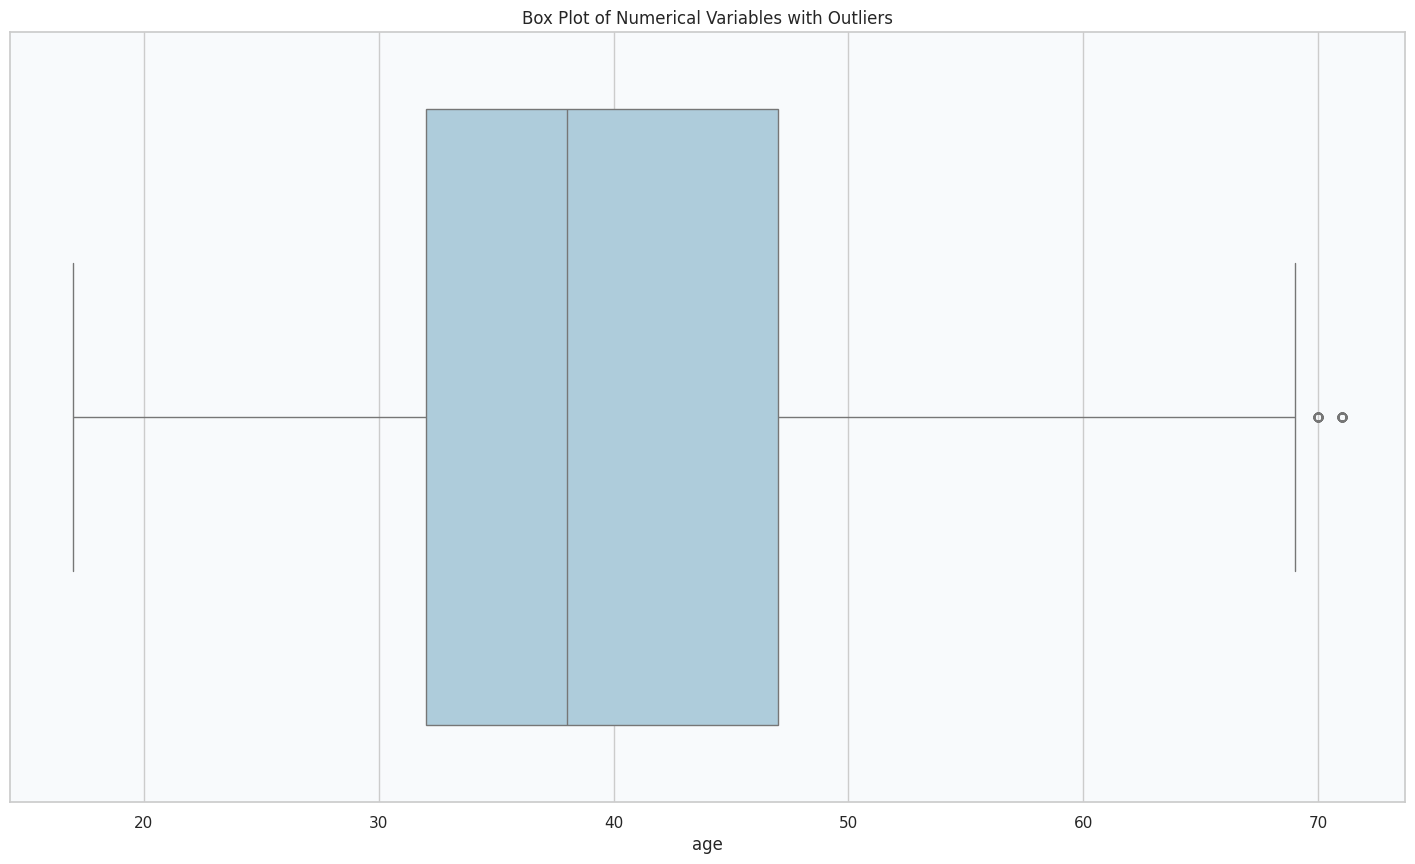

In [69]:
plot_numerical_vars_with_outliers(df2, 'age')

In [70]:
plot_numerical_vars_with_outliers_plotly(df2, 'age')


In [71]:
num_outliers, outliers_df = detect_count_outliers(df2, 'last_contact_duration', threshold=3)
num_outliers
outliers_df


Number of outliers in 'last_contact_duration': 861


age           job   marital            education  default housing loan  \
37      52    technician   married             basic.9y       no     yes   no   
75      41   blue-collar  divorced             basic.4y  unknown     yes   no   
83      49  entrepreneur   married    university.degree  unknown     yes   no   
88      49    technician   married             basic.9y       no      no   no   
164     39      services  divorced          high.school  unknown      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
40880   28        admin.    single          high.school       no      no   no   
40970   24        admin.    single    university.degree       no     yes   no   
41121   46        admin.    single    university.degree       no     yes   no   
41123   36   blue-collar    single             basic.6y       no      no   no   
41164   54        admin.   married  professional.course       no      no   no   

      contact_type month day_of_week  ...  passed_days  previous  \
37       telephone   may         mon  ...          999         0   
75       telephone   may         mon  ...          999         0   
83       telephone   may         mon  ...          999         0   
88       telephone   may         mon  ...          999         0   
164      telephone   may         mon  ...          999         0   
...            ...   ...         ...  ...          ...       ...   
40880     cellular   oct         wed  ...          999         0   
40970     cellular   oct         fri  ...            3         2   
41121     cellular   nov         tue  ...          999         1   
41123     cellular   nov         tue  ...          999         0   
41164     cellular   nov         tue  ...           10         1   

       previous_outcome  employment_variation_rate consumer_price_index  \
37          nonexistent                        1.1               93.994   
75          nonexistent                        1.1               93.994   
83          nonexistent                        1.1               93.994   
88          nonexistent                        1.1               93.994   
164         nonexistent                        1.1               93.994   
...                 ...                        ...                  ...   
40880       nonexistent                       -1.1               94.601   
40970           success                       -1.1               94.601   
41121           failure                       -1.1               94.767   
41123       nonexistent                       -1.1               94.767   
41164           success                       -1.1               94.767   

       consumer_confidence_index  euribor3m  number_of_employees    y  \
37                         -36.4      4.857               5191.0   no   
75                         -36.4      4.857               5191.0  yes   
83                         -36.4      4.857               5191.0  yes   
88                         -36.4      4.857               5191.0  yes   
164                        -36.4      4.857               5191.0   no   
...                          ...        ...                  ...  ...   
40880                      -49.5      0.959               4963.6  yes   
40970                      -49.5      0.993               4963.6  yes   
41121                      -50.8      1.046               4963.6   no   
41123                      -50.8      1.046               4963.6  yes   
41164                      -50.8      1.035               4963.6  yes   

       has_term_deposit  
37                    0  
75                    1  
83                    1  
88                    1  
164                   0  
...                 ...  
40880                 1  
40970                 1  
41121                 0  
41123                 1  
41164                 1  

[861 rows x 22 columns]

In [72]:
df2 = handle_outliers_with_median(df2, 'last_contact_duration', threshold=3)


In [73]:
num_outliers, outliers_df = detect_count_outliers(df2, 'last_contact_duration', threshold=3)
num_outliers
outliers_df


Number of outliers in 'last_contact_duration': 886


age           job   marital          education  default housing loan  \
61      51   blue-collar   married           basic.9y       no     yes   no   
111     58    unemployed   married           basic.4y  unknown      no   no   
169     54    management  divorced  university.degree       no     yes   no   
276     34      services   married        high.school       no      no   no   
286     39     housemaid   married           basic.9y       no     yes   no   
...    ...           ...       ...                ...      ...     ...  ...   
40993   50  entrepreneur  divorced  university.degree       no     yes   no   
41009   24   blue-collar    single        high.school       no      no   no   
41052   65       retired   married           basic.4y       no      no   no   
41122   34    technician   married            unknown       no      no   no   
41160   33        admin.   married  university.degree       no      no   no   

      contact_type month day_of_week  ...  passed_days  previous  \
61       telephone   may         mon  ...          999         0   
111      telephone   may         mon  ...          999         0   
169      telephone   may         mon  ...          999         0   
276      telephone   may         mon  ...          999         0   
286      telephone   may         mon  ...          999         0   
...            ...   ...         ...  ...          ...       ...   
40993    telephone   oct         tue  ...           11         2   
41009     cellular   oct         thu  ...            3         1   
41052     cellular   oct         wed  ...          999         0   
41122     cellular   nov         tue  ...          999         0   
41160     cellular   nov         tue  ...          999         0   

       previous_outcome  employment_variation_rate consumer_price_index  \
61          nonexistent                        1.1               93.994   
111         nonexistent                        1.1               93.994   
169         nonexistent                        1.1               93.994   
276         nonexistent                        1.1               93.994   
286         nonexistent                        1.1               93.994   
...                 ...                        ...                  ...   
40993           success                       -1.1               94.601   
41009           success                       -1.1               94.601   
41052       nonexistent                       -1.1               94.601   
41122       nonexistent                       -1.1               94.767   
41160       nonexistent                       -1.1               94.767   

       consumer_confidence_index  euribor3m  number_of_employees    y  \
61                         -36.4      4.857               5191.0   no   
111                        -36.4      4.857               5191.0   no   
169                        -36.4      4.857               5191.0   no   
276                        -36.4      4.857               5191.0   no   
286                        -36.4      4.857               5191.0  yes   
...                          ...        ...                  ...  ...   
40993                      -49.5      1.008               4963.6  yes   
41009                      -49.5      1.025               4963.6  yes   
41052                      -49.5      1.043               4963.6  yes   
41122                      -50.8      1.046               4963.6  yes   
41160                      -50.8      1.035               4963.6  yes   

       has_term_deposit  
61                    0  
111                   0  
169                   0  
276                   0  
286                   1  
...                 ...  
40993                 1  
41009                 1  
41052                 1  
41122                 1  
41160                 1  

[886 rows x 22 columns]

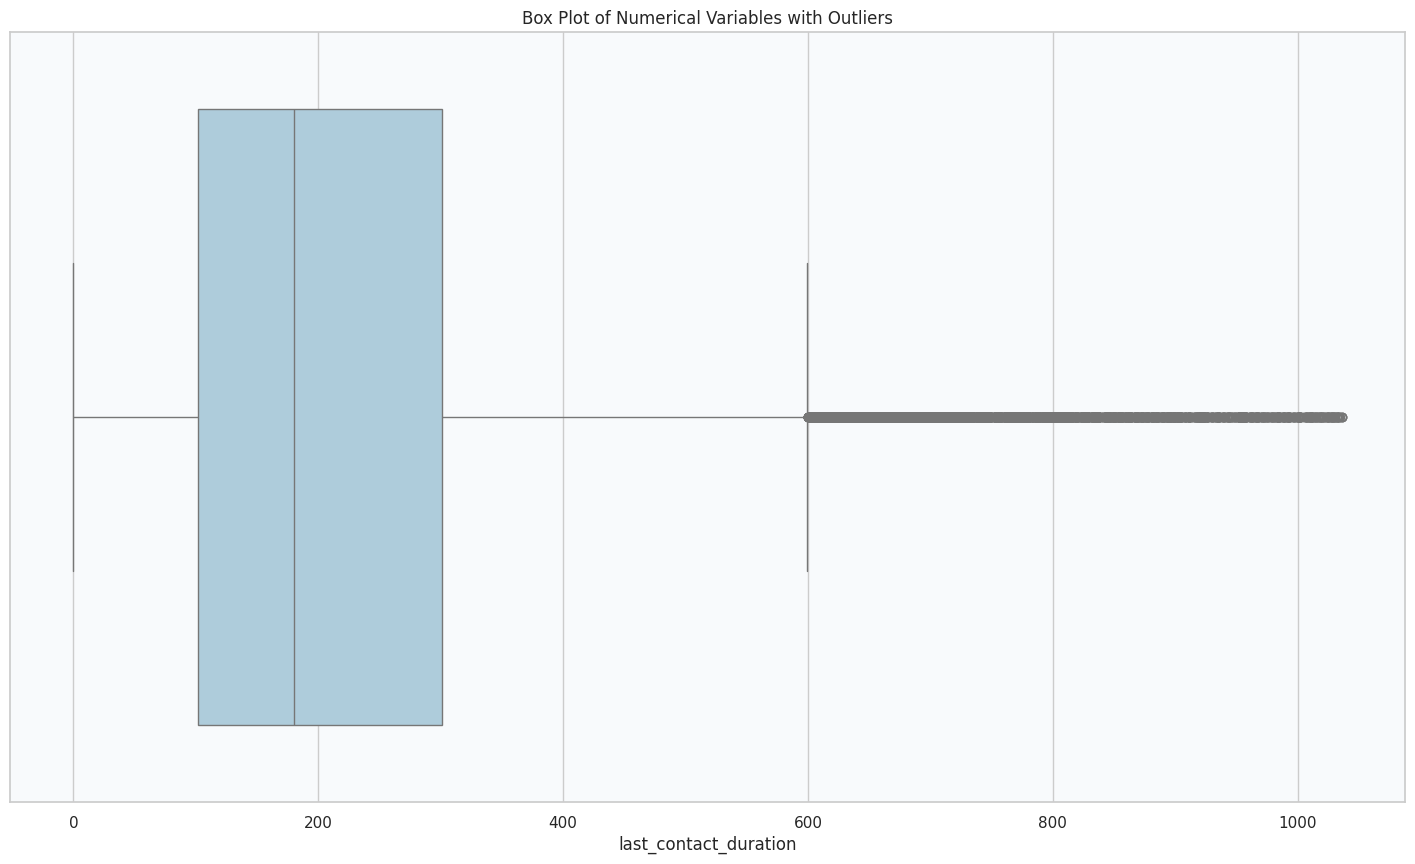

In [74]:
plot_numerical_vars_with_outliers(df2, 'last_contact_duration')


In [75]:
plot_numerical_vars_with_outliers_plotly(df2, 'last_contact_duration', '#E6ECF5')

In [76]:
num_outliers, outliers_df = detect_count_outliers(df2, 'campaign', threshold=3)
num_outliers
outliers_df


Number of outliers in 'campaign': 869


age          job   marital            education  default housing loan  \
2189    56       admin.   married             basic.9y  unknown      no   no   
2234    47   management   married    university.degree       no      no   no   
2554    31       admin.   married          high.school  unknown     yes   no   
2589    47     services   married          high.school  unknown      no  yes   
2590    47  blue-collar   married  professional.course  unknown     yes   no   
...    ...          ...       ...                  ...      ...     ...  ...   
37587   28   unemployed   married  professional.course       no      no   no   
37876   29       admin.    single    university.degree       no     yes  yes   
37893   52       admin.   married              unknown       no      no   no   
40063   21      student    single              unknown       no     yes  yes   
40529   38      retired  divorced    university.degree       no      no   no   

      contact_type month day_of_week  ...  passed_days  previous  \
2189     telephone   may         mon  ...          999         0   
2234     telephone   may         mon  ...          999         0   
2554     telephone   may         tue  ...          999         0   
2589     telephone   may         tue  ...          999         0   
2590     telephone   may         tue  ...          999         0   
...            ...   ...         ...  ...          ...       ...   
37587    telephone   aug         fri  ...          999         0   
37876     cellular   aug         mon  ...          999         0   
37893    telephone   sep         tue  ...           14         2   
40063     cellular   jul         thu  ...            9         2   
40529     cellular   aug         mon  ...          999         1   

       previous_outcome  employment_variation_rate consumer_price_index  \
2189        nonexistent                        1.1               93.994   
2234        nonexistent                        1.1               93.994   
2554        nonexistent                        1.1               93.994   
2589        nonexistent                        1.1               93.994   
2590        nonexistent                        1.1               93.994   
...                 ...                        ...                  ...   
37587       nonexistent                       -2.9               92.201   
37876       nonexistent                       -2.9               92.201   
37893           failure                       -3.4               92.379   
40063           failure                       -1.7               94.215   
40529           failure                       -1.7               94.027   

       consumer_confidence_index  euribor3m  number_of_employees   y  \
2189                       -36.4      4.857               5191.0  no   
2234                       -36.4      4.857               5191.0  no   
2554                       -36.4      4.856               5191.0  no   
2589                       -36.4      4.856               5191.0  no   
2590                       -36.4      4.856               5191.0  no   
...                          ...        ...                  ...  ..   
37587                      -31.4      0.869               5076.2  no   
37876                      -31.4      0.821               5076.2  no   
37893                      -29.8      0.819               5017.5  no   
40063                      -40.3      0.810               4991.6  no   
40529                      -38.3      0.891               4991.6  no   

       has_term_deposit  
2189                  0  
2234                  0  
2554                  0  
2589                  0  
2590                  0  
...                 ...  
37587                 0  
37876                 0  
37893                 0  
40063                 0  
40529                 0  

[869 rows x 22 columns]

In [77]:
df2 = handle_outliers_with_median(df2, 'campaign', threshold=3)


In [78]:
num_outliers, outliers_df = detect_count_outliers(df2, 'campaign', threshold=3)
num_outliers
outliers_df


Number of outliers in 'campaign': 908


age          job  marital            education  default housing loan  \
1043    41   technician   single    university.degree  unknown      no   no   
1094    40   technician  married  professional.course       no     yes   no   
1467    38       admin.   single    university.degree       no      no   no   
1484    38  blue-collar  married             basic.6y       no      no   no   
1866    54   management  married             basic.4y  unknown      no   no   
...    ...          ...      ...                  ...      ...     ...  ...   
40176   31       admin.  married          high.school       no      no   no   
40332   25      student   single          high.school       no     yes   no   
40468   38      retired  married              unknown       no      no   no   
40611   38      retired  married             basic.9y       no      no   no   
40821   33   technician   single  professional.course       no     yes   no   

      contact_type month day_of_week  ...  passed_days  previous  \
1043     telephone   may         wed  ...          999         0   
1094     telephone   may         wed  ...          999         0   
1467     telephone   may         thu  ...          999         0   
1484     telephone   may         thu  ...          999         0   
1866     telephone   may         fri  ...          999         0   
...            ...   ...         ...  ...          ...       ...   
40176     cellular   jul         fri  ...          999         0   
40332     cellular   aug         mon  ...            4         1   
40468     cellular   aug         wed  ...          999         2   
40611    telephone   sep         fri  ...          999         1   
40821     cellular   sep         fri  ...          999         2   

       previous_outcome  employment_variation_rate consumer_price_index  \
1043        nonexistent                        1.1               93.994   
1094        nonexistent                        1.1               93.994   
1467        nonexistent                        1.1               93.994   
1484        nonexistent                        1.1               93.994   
1866        nonexistent                        1.1               93.994   
...                 ...                        ...                  ...   
40176       nonexistent                       -1.7               94.215   
40332           success                       -1.7               94.027   
40468           failure                       -1.7               94.027   
40611           failure                       -1.1               94.199   
40821           failure                       -1.1               94.199   

       consumer_confidence_index  euribor3m  number_of_employees   y  \
1043                       -36.4      4.856               5191.0  no   
1094                       -36.4      4.856               5191.0  no   
1467                       -36.4      4.855               5191.0  no   
1484                       -36.4      4.855               5191.0  no   
1866                       -36.4      4.855               5191.0  no   
...                          ...        ...                  ...  ..   
40176                      -40.3      0.861               4991.6  no   
40332                      -38.3      0.898               4991.6  no   
40468                      -38.3      0.903               4991.6  no   
40611                      -37.5      0.883               4963.6  no   
40821                      -37.5      0.879               4963.6  no   

       has_term_deposit  
1043                  0  
1094                  0  
1467                  0  
1484                  0  
1866                  0  
...                 ...  
40176                 0  
40332                 0  
40468                 0  
40611                 0  
40821                 0  

[908 rows x 22 columns]

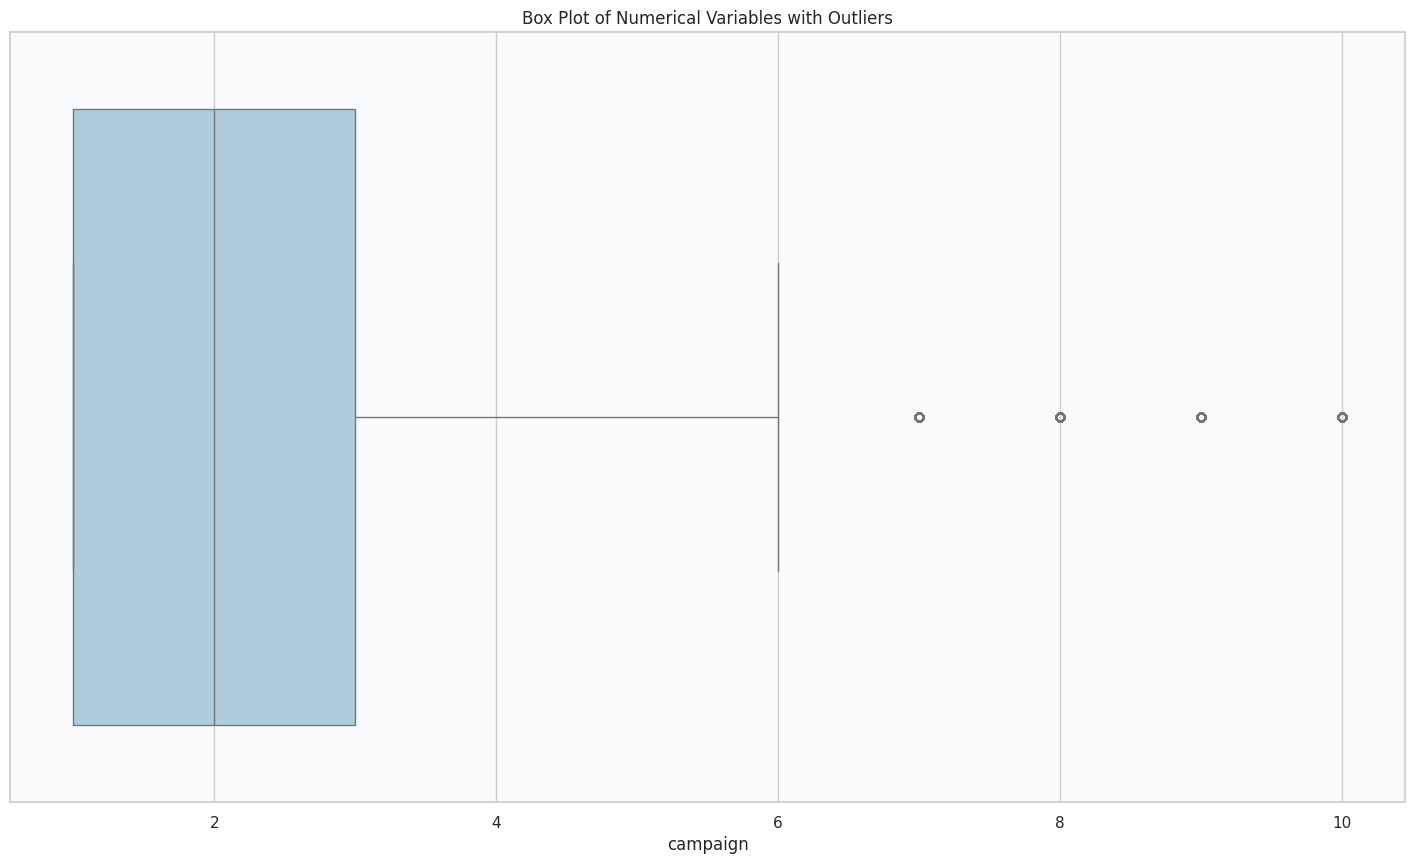

In [79]:
plot_numerical_vars_with_outliers(df2, 'campaign')


In [80]:
plot_numerical_vars_with_outliers_plotly(df2, 'campaign', '#E6ECF5')


In [81]:
num_outliers, outliers_df = detect_count_outliers(df2, 'passed_days', threshold=3)
num_outliers
outliers_df


Number of outliers in 'passed_days': 1515


age            job   marital            education  default housing  \
24108   37         admin.   married    university.degree       no     yes   
24264   48     management   married    university.degree       no     yes   
24279   42     technician   married  professional.course  unknown     yes   
24397   50   entrepreneur   married    university.degree  unknown     yes   
24482   36  self-employed    single    university.degree       no     yes   
...    ...            ...       ...                  ...      ...     ...   
41163   35     technician  divorced             basic.4y       no     yes   
41164   54         admin.   married  professional.course       no      no   
41174   62        retired   married    university.degree       no     yes   
41178   62        retired   married    university.degree       no      no   
41182   29     unemployed    single             basic.4y       no     yes   

      loan contact_type month day_of_week  ...  passed_days  previous  \
24108   no    telephone   nov         wed  ...            6         1   
24264   no     cellular   nov         mon  ...            4         1   
24279   no     cellular   nov         mon  ...            4         1   
24397   no     cellular   nov         mon  ...            3         1   
24482   no     cellular   nov         mon  ...            4         1   
...    ...          ...   ...         ...  ...          ...       ...   
41163   no     cellular   nov         tue  ...            4         2   
41164   no     cellular   nov         tue  ...           10         1   
41174   no     cellular   nov         thu  ...            1         6   
41178   no     cellular   nov         thu  ...            6         3   
41182   no     cellular   nov         fri  ...            9         1   

       previous_outcome  employment_variation_rate consumer_price_index  \
24108           success                       -0.1               93.200   
24264           success                       -0.1               93.200   
24279           success                       -0.1               93.200   
24397           success                       -0.1               93.200   
24482           success                       -0.1               93.200   
...                 ...                        ...                  ...   
41163           success                       -1.1               94.767   
41164           success                       -1.1               94.767   
41174           success                       -1.1               94.767   
41178           success                       -1.1               94.767   
41182           success                       -1.1               94.767   

       consumer_confidence_index  euribor3m  number_of_employees    y  \
24108                      -42.0      4.286               5195.8   no   
24264                      -42.0      4.191               5195.8   no   
24279                      -42.0      4.191               5195.8   no   
24397                      -42.0      4.191               5195.8   no   
24482                      -42.0      4.191               5195.8   no   
...                          ...        ...                  ...  ...   
41163                      -50.8      1.035               4963.6  yes   
41164                      -50.8      1.035               4963.6  yes   
41174                      -50.8      1.031               4963.6  yes   
41178                      -50.8      1.031               4963.6  yes   
41182                      -50.8      1.028               4963.6   no   

       has_term_deposit  
24108                 0  
24264                 0  
24279                 0  
24397                 0  
24482                 0  
...                 ...  
41163                 1  
41164                 1  
41174                 1  
41178                 1  
41182                 0  

[1515 rows x 22 columns]

In [82]:
df2 = handle_outliers_with_median(df2, 'passed_days', threshold=3)


In [83]:
num_outliers, outliers_df = detect_count_outliers(df2, 'passed_days', threshold=3)
num_outliers
outliers_df


Number of outliers in 'passed_days': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit]
Index: []

[0 rows x 22 columns]

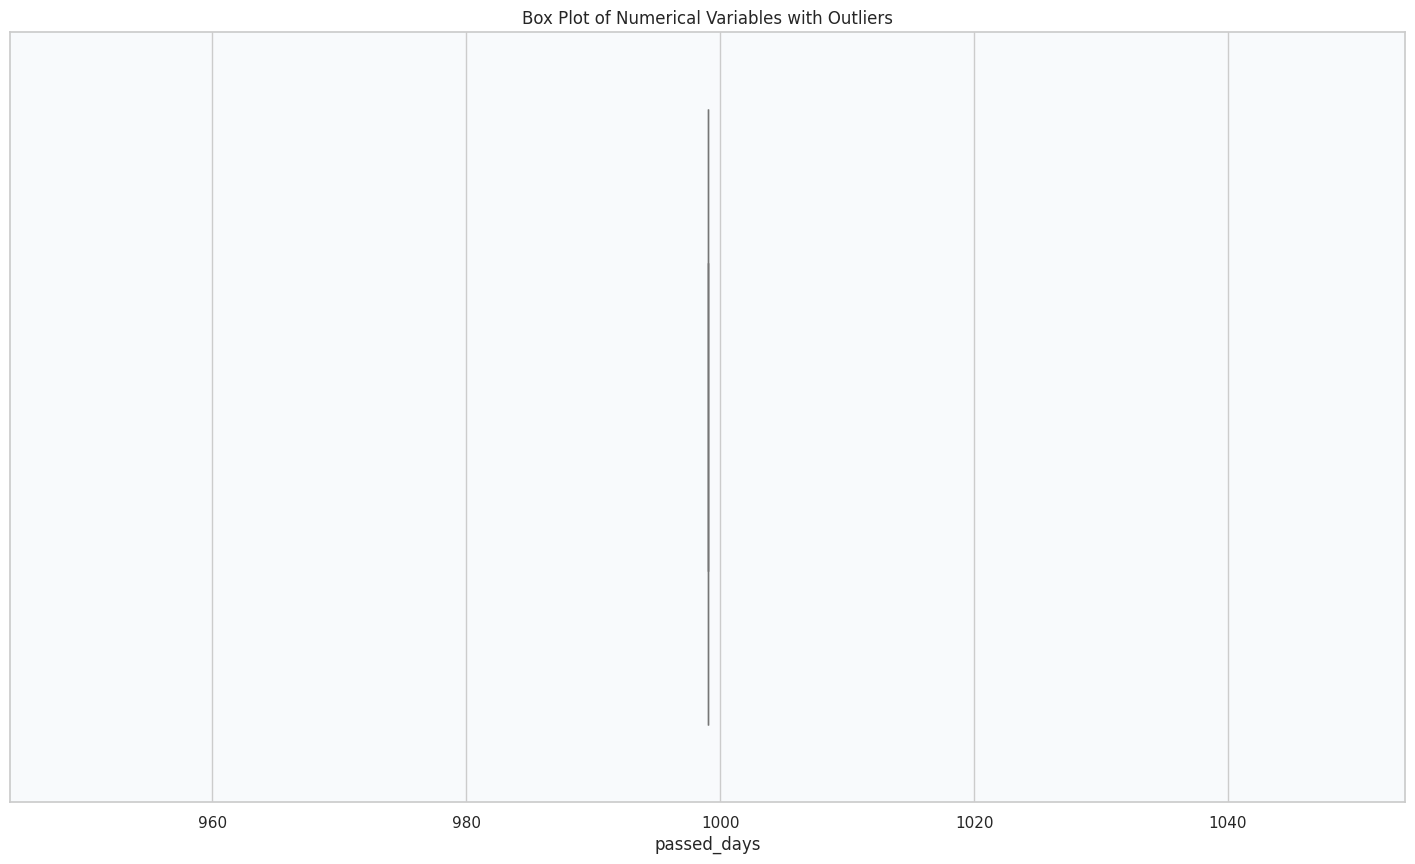

In [84]:
plot_numerical_vars_with_outliers(df2, 'passed_days')

In [85]:
plot_numerical_vars_with_outliers_plotly(df2, 'passed_days', '#E6ECF5')


In [86]:
num_outliers, outliers_df = detect_count_outliers(df2, 'previous', threshold=3)
num_outliers
outliers_df


Number of outliers in 'previous': 1064


age         job   marital          education default housing loan  \
25996   35  management   married  university.degree      no     yes  yes   
27658   50      admin.  divorced  university.degree      no     yes   no   
27778   38  technician   married  university.degree      no      no   no   
27832   30     student    single        high.school      no      no   no   
27991   29      admin.    single  university.degree      no     yes   no   
...    ...         ...       ...                ...     ...     ...  ...   
41170   40  management  divorced  university.degree      no     yes   no   
41173   62     retired   married  university.degree      no     yes   no   
41174   62     retired   married  university.degree      no     yes   no   
41175   34     student    single            unknown      no     yes   no   
41178   62     retired   married  university.degree      no      no   no   

      contact_type month day_of_week  ...  passed_days  previous  \
25996    telephone   nov         wed  ...          999         2   
27658     cellular   nov         fri  ...          999         2   
27778     cellular   mar         tue  ...          999         2   
27832     cellular   mar         fri  ...          999         2   
27991     cellular   apr         wed  ...          999         2   
...            ...   ...         ...  ...          ...       ...   
41170     cellular   nov         wed  ...          999         4   
41173     cellular   nov         thu  ...          999         2   
41174     cellular   nov         thu  ...          999         6   
41175     cellular   nov         thu  ...          999         2   
41178     cellular   nov         thu  ...          999         3   

       previous_outcome  employment_variation_rate consumer_price_index  \
25996           success                       -0.1               93.200   
27658           success                       -0.1               93.200   
27778           failure                       -1.8               92.843   
27832           failure                       -1.8               92.843   
27991           success                       -1.8               93.075   
...                 ...                        ...                  ...   
41170           failure                       -1.1               94.767   
41173           failure                       -1.1               94.767   
41174           success                       -1.1               94.767   
41175           failure                       -1.1               94.767   
41178           success                       -1.1               94.767   

       consumer_confidence_index  euribor3m  number_of_employees    y  \
25996                      -42.0      4.120               5195.8   no   
27658                      -42.0      4.021               5195.8   no   
27778                      -50.0      1.687               5099.1  yes   
27832                      -50.0      1.640               5099.1  yes   
27991                      -47.1      1.498               5099.1   no   
...                          ...        ...                  ...  ...   
41170                      -50.8      1.030               4963.6   no   
41173                      -50.8      1.031               4963.6  yes   
41174                      -50.8      1.031               4963.6  yes   
41175                      -50.8      1.031               4963.6   no   
41178                      -50.8      1.031               4963.6  yes   

       has_term_deposit  
25996                 0  
27658                 0  
27778                 1  
27832                 1  
27991                 0  
...                 ...  
41170                 0  
41173                 1  
41174                 1  
41175                 0  
41178                 1  

[1064 rows x 22 columns]

In [87]:
df2 = handle_outliers_with_median(df2, 'previous', threshold=3)


In [88]:
num_outliers, outliers_df = detect_count_outliers(df2, 'previous', threshold=3)
num_outliers
outliers_df

Number of outliers in 'previous': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit]
Index: []

[0 rows x 22 columns]

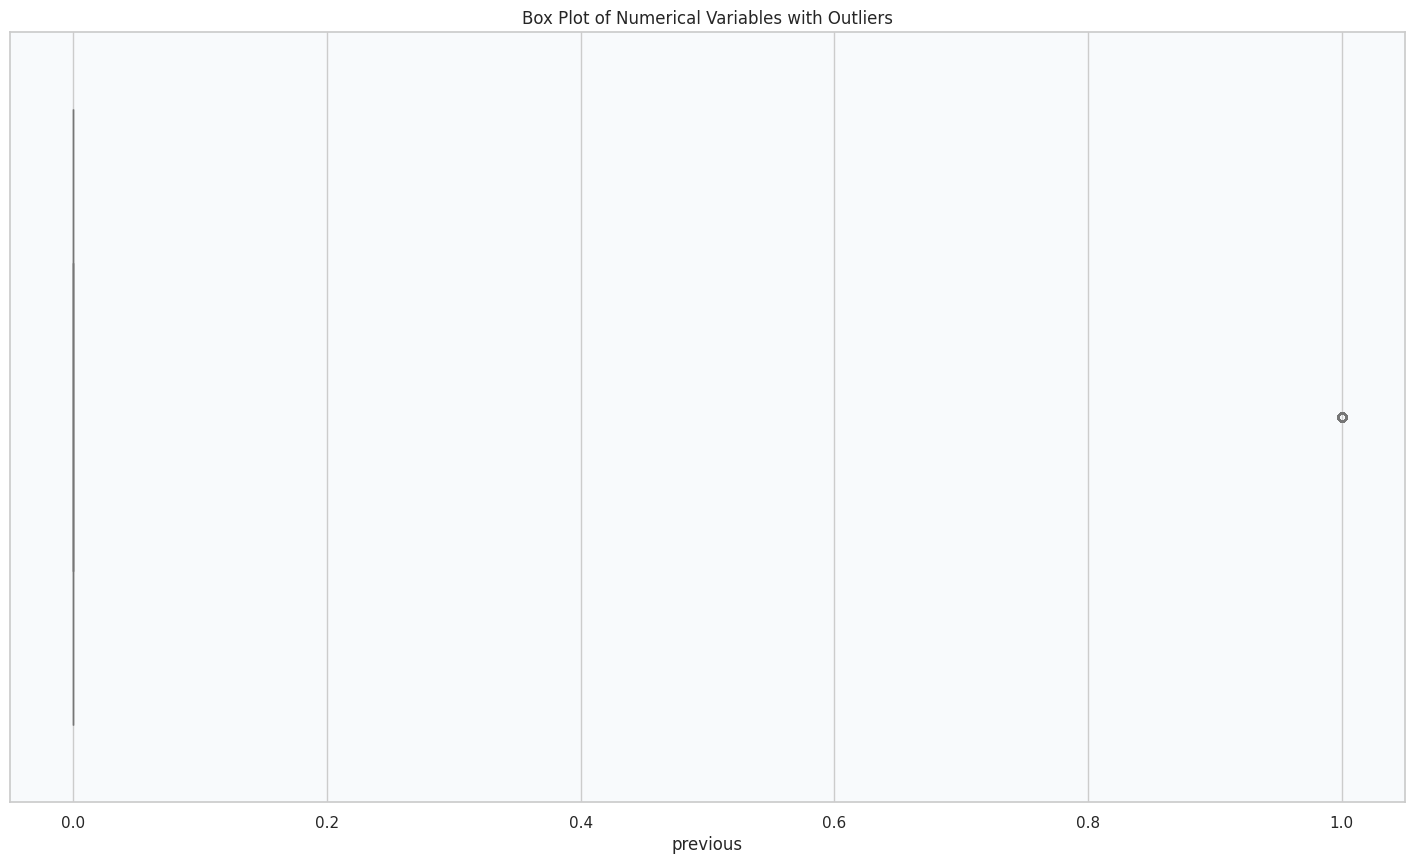

In [89]:
plot_numerical_vars_with_outliers(df2, 'previous')


In [90]:
plot_numerical_vars_with_outliers_plotly(df2, 'previous', '#E6ECF5')

In [91]:
num_outliers, outliers_df = detect_count_outliers(df2, 'employment_variation_rate', threshold=3)
num_outliers
outliers_df


Number of outliers in 'employment_variation_rate': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit]
Index: []

[0 rows x 22 columns]

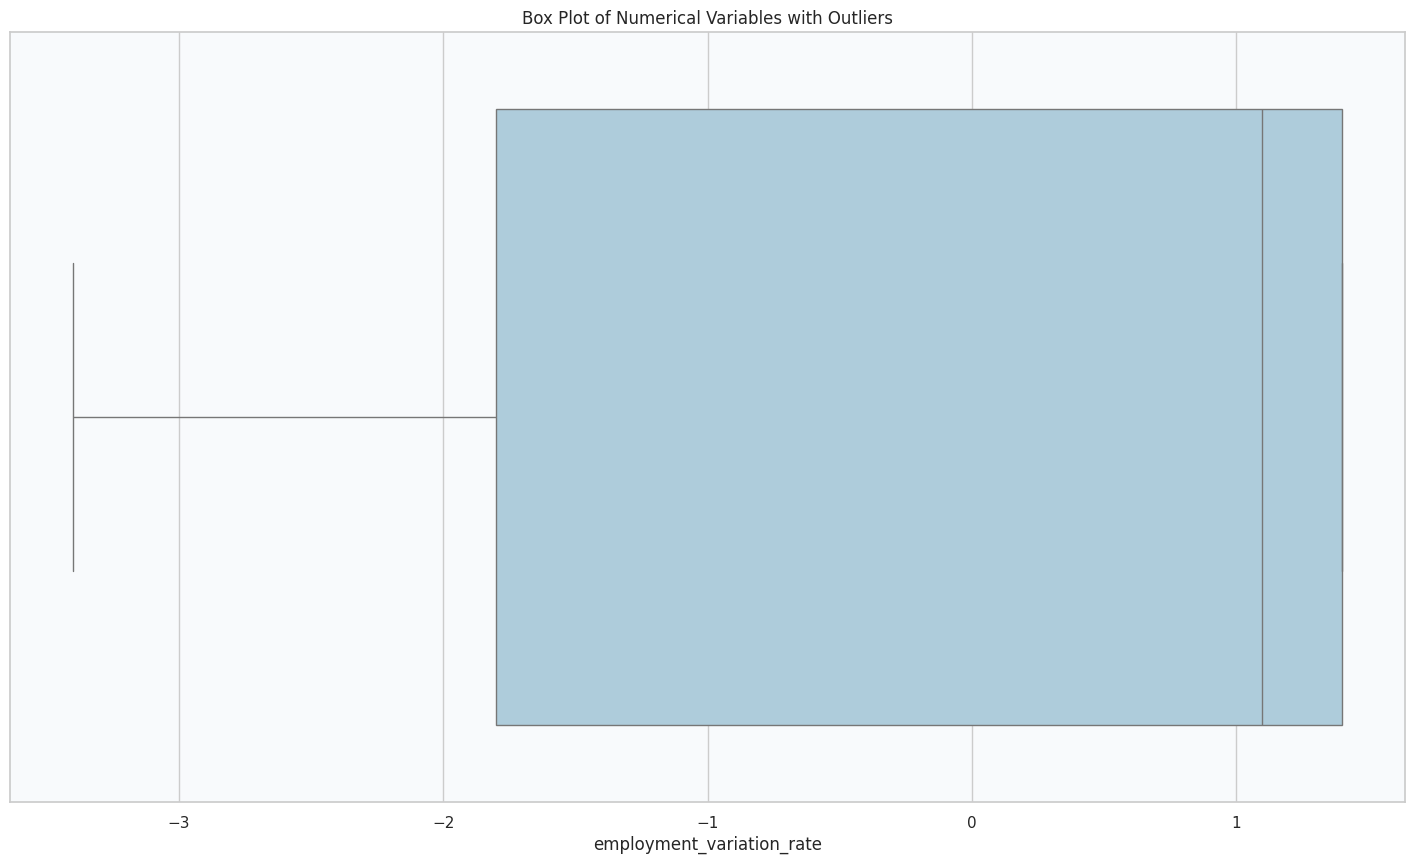

In [92]:
plot_numerical_vars_with_outliers(df2, 'employment_variation_rate')

In [93]:
num_outliers, outliers_df = detect_count_outliers(df2, 'consumer_price_index', threshold=3)
num_outliers
outliers_df


Number of outliers in 'consumer_price_index': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit]
Index: []

[0 rows x 22 columns]

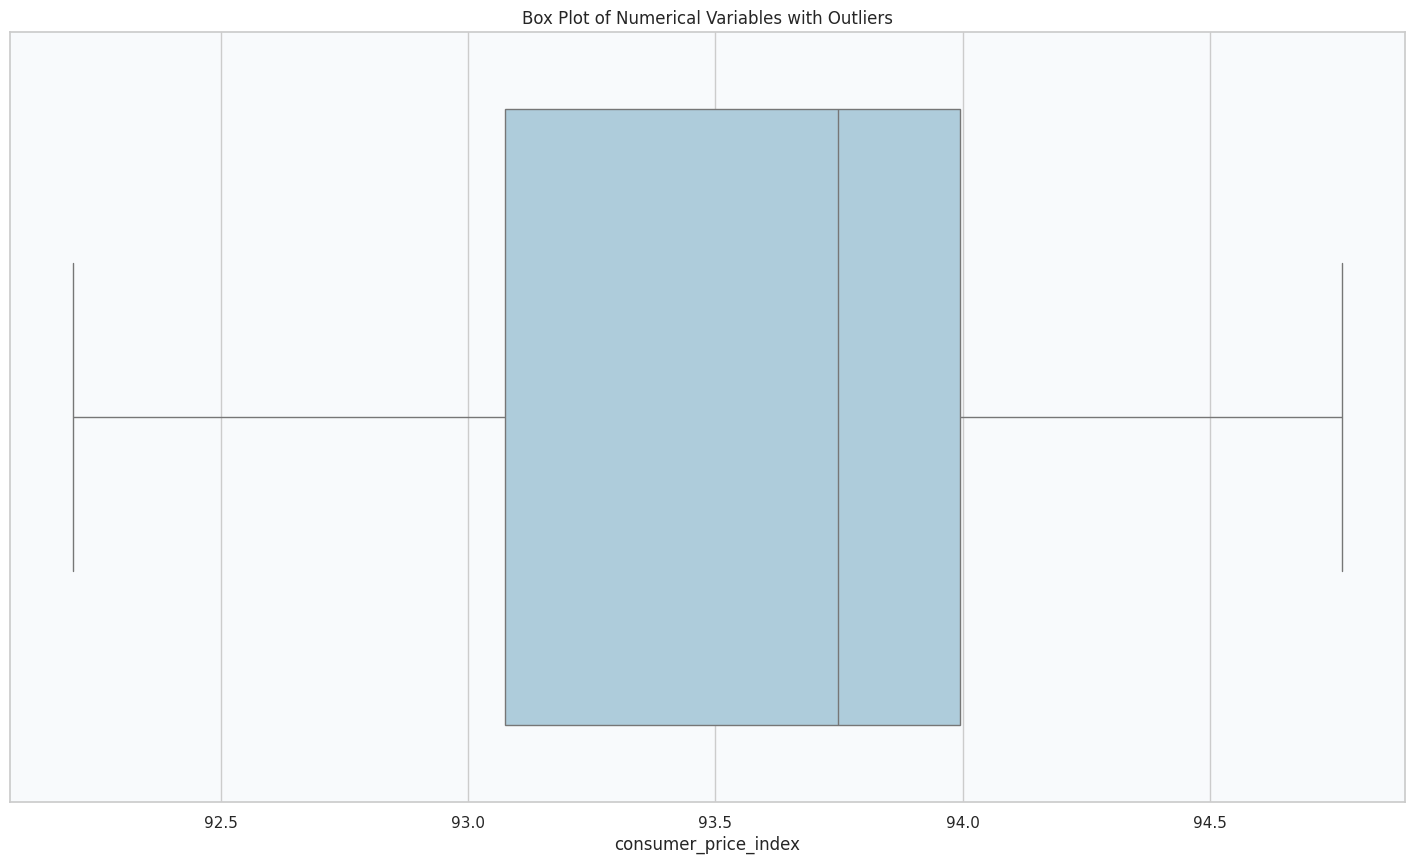

In [94]:
plot_numerical_vars_with_outliers(df2, 'consumer_price_index')


In [95]:
num_outliers, outliers_df = detect_count_outliers(df2, 'consumer_confidence_index', threshold=3)
num_outliers
outliers_df


Number of outliers in 'consumer_confidence_index': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit]
Index: []

[0 rows x 22 columns]

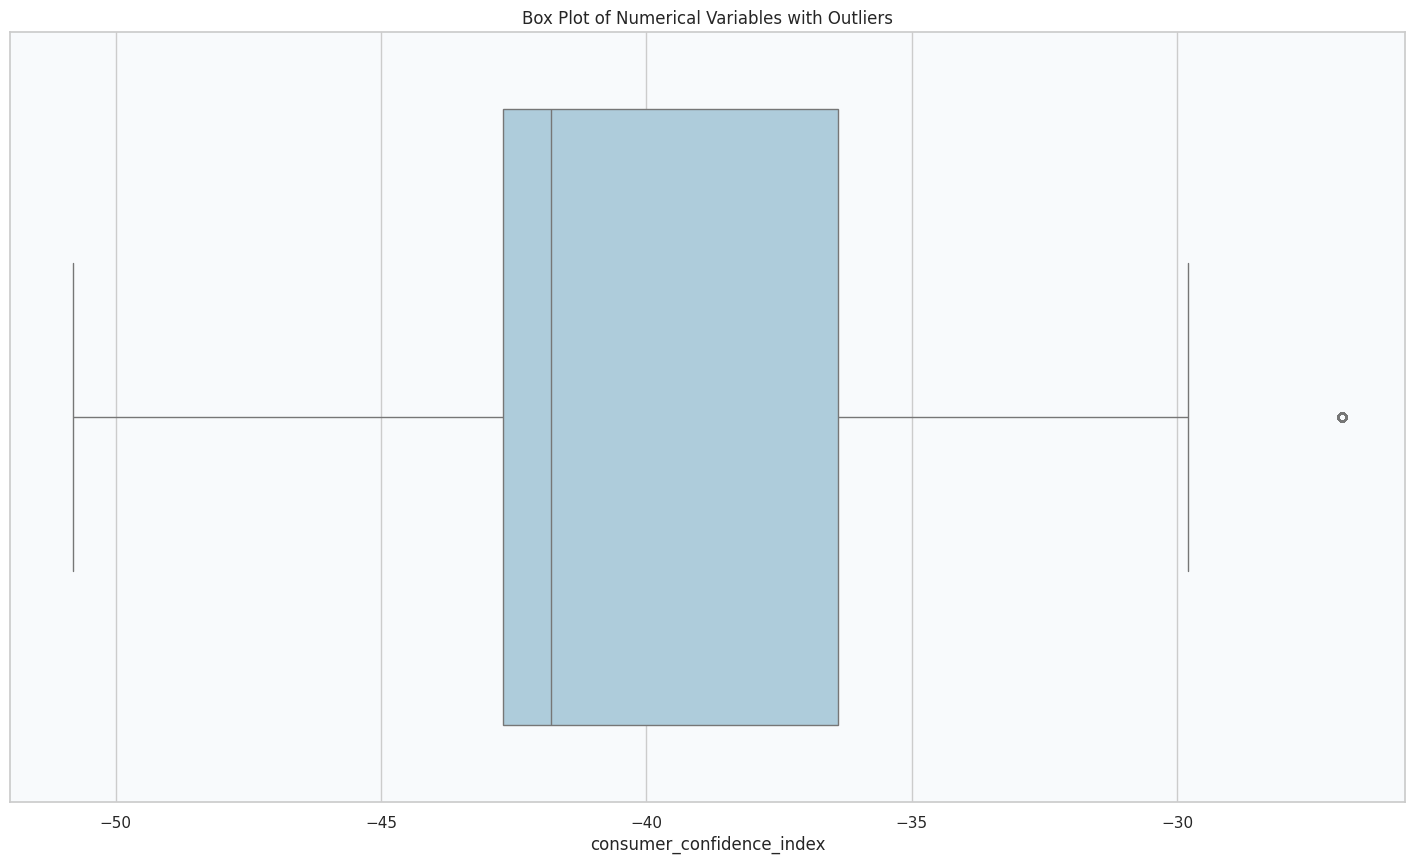

In [96]:
plot_numerical_vars_with_outliers(df2, 'consumer_confidence_index')


In [97]:
num_outliers, outliers_df = detect_count_outliers(df2, 'euribor3m', threshold=3)
num_outliers
outliers_df


Number of outliers in 'euribor3m': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit]
Index: []

[0 rows x 22 columns]

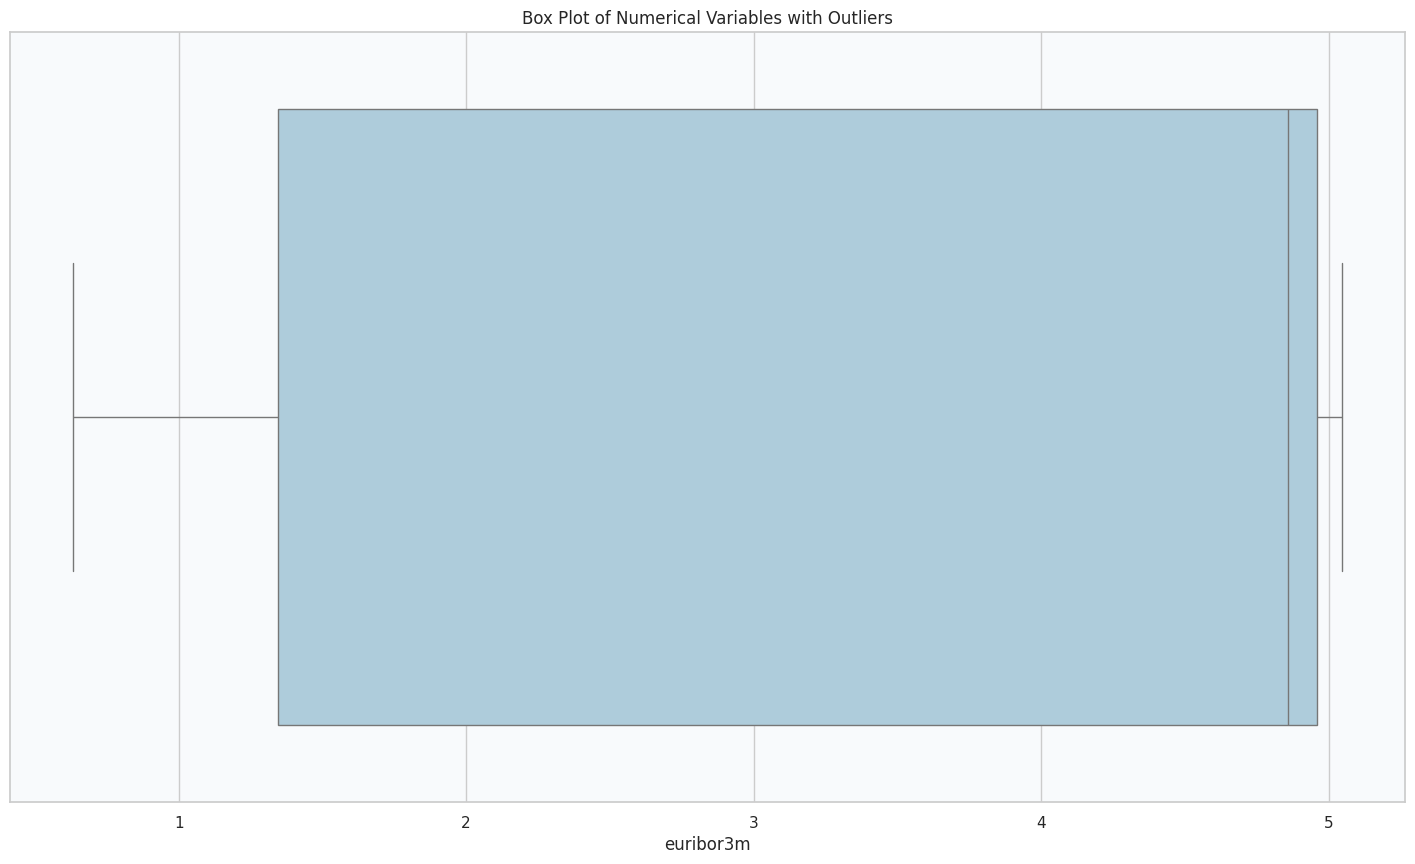

In [98]:
plot_numerical_vars_with_outliers(df2, 'euribor3m')


In [99]:
num_outliers, outliers_df = detect_count_outliers(df2, 'number_of_employees', threshold=3)
num_outliers
outliers_df


Number of outliers in 'number_of_employees': 0


Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact_type, month, day_of_week, last_contact_duration, campaign, passed_days, previous, previous_outcome, employment_variation_rate, consumer_price_index, consumer_confidence_index, euribor3m, number_of_employees, y, has_term_deposit]
Index: []

[0 rows x 22 columns]

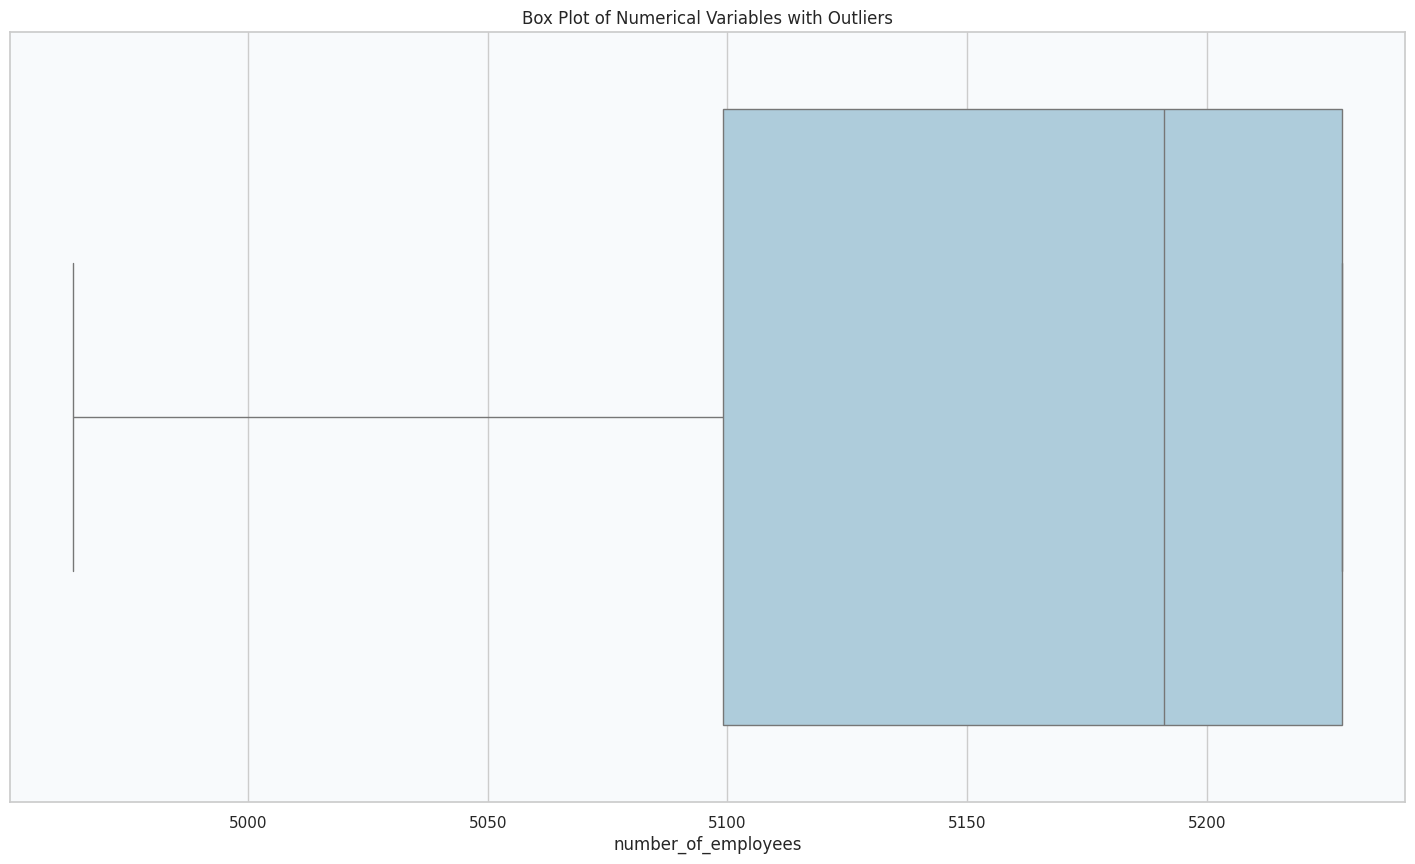

In [100]:
plot_numerical_vars_with_outliers(df2, 'number_of_employees')


### Data Visualization

In [101]:
# See the correlations between categorical variables
def plot_categorical_count(df, x_column, hue_column, title, palette='Paired'):

    plt.figure(figsize=(20, 10))
    sns.countplot(x=x_column, hue=hue_column, data=df, palette=palette)

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.legend(title=hue_column, loc='upper right')

    plt.show()

In [102]:
# See the correlations between categorical variables (Using Plotly)
def plotly_categorical_count(df, x_column, hue_column, title, color_discrete_sequence=None):

    # Create a dataframe with counts and percentages
    count_df = df.groupby([x_column, hue_column]).size().reset_index(name='count')
    total_counts = count_df.groupby(x_column)['count'].transform('sum')
    count_df['percentage'] = (count_df['count'] / total_counts) * 100

    # Create the bar plot
    fig = px.bar(count_df, x=x_column, y='count', color=hue_column,
                 title=title, color_discrete_sequence=color_discrete_sequence)

    # Add borders and percentage labels
    for bar in fig.data:
        bar.update(marker_line_color='black', marker_line_width=1, hoverinfo='y+text',
                   text=count_df[count_df[hue_column] == bar.name]['percentage'].round(2).astype(str) + '%')

    fig.update_layout(
        xaxis_title=x_column,
        yaxis_title='Count',
        legend_title=hue_column,
        barmode='group',
        bargap=0.1,
        showlegend=True,
        legend=dict(x=1.02, y=1)
    )

    fig.show()

In [103]:
df2.groupby(['job','y'])['y'].count()


job            y  
admin.         no     9068
               yes    1351
blue-collar    no     8615
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1284
               yes     434
self-employed  no     1272
               yes     149
services       no     3644
               yes     323
student        no      600
               yes     275
technician     no     6009
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: y, dtype: int64

In [104]:
pd.crosstab(df2.y, df2.job, margins=True).style.background_gradient(cmap='summer_r')


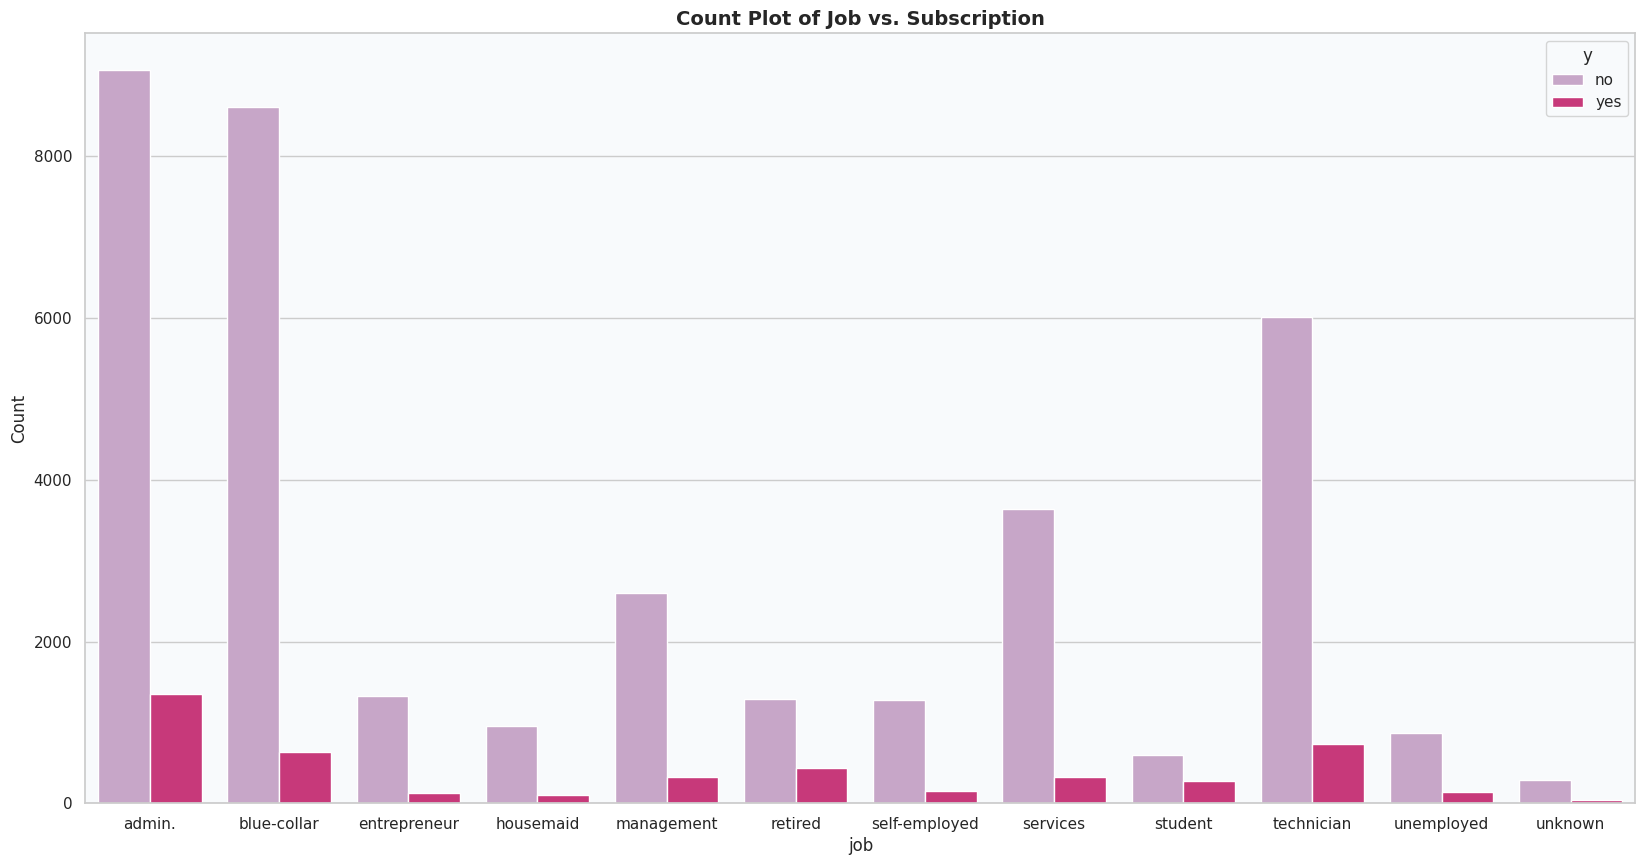

In [105]:
plot_categorical_count(df2[['job', 'y']], x_column='job', hue_column='y', title='Count Plot of Job vs. Subscription', palette='PuRd')


In [106]:
# Plotly
plotly_categorical_count(df2[['job', 'y']], x_column='job', hue_column='y', title='Count Plot of Job vs. Subscription')


In [107]:
df2.groupby(['marital','y'])['y'].count()

marital   y  
divorced  no      4135
          yes      476
married   no     22390
          yes     2531
single    no      9944
          yes     1620
unknown   no        68
          yes       12
Name: y, dtype: int64

In [108]:
pd.crosstab(df2.y, df2.marital, margins=True).style.background_gradient(cmap='summer_r')


In [109]:
pd.crosstab([df2.job, df2.y], df.marital, margins=True).style.background_gradient(cmap='summer_r')


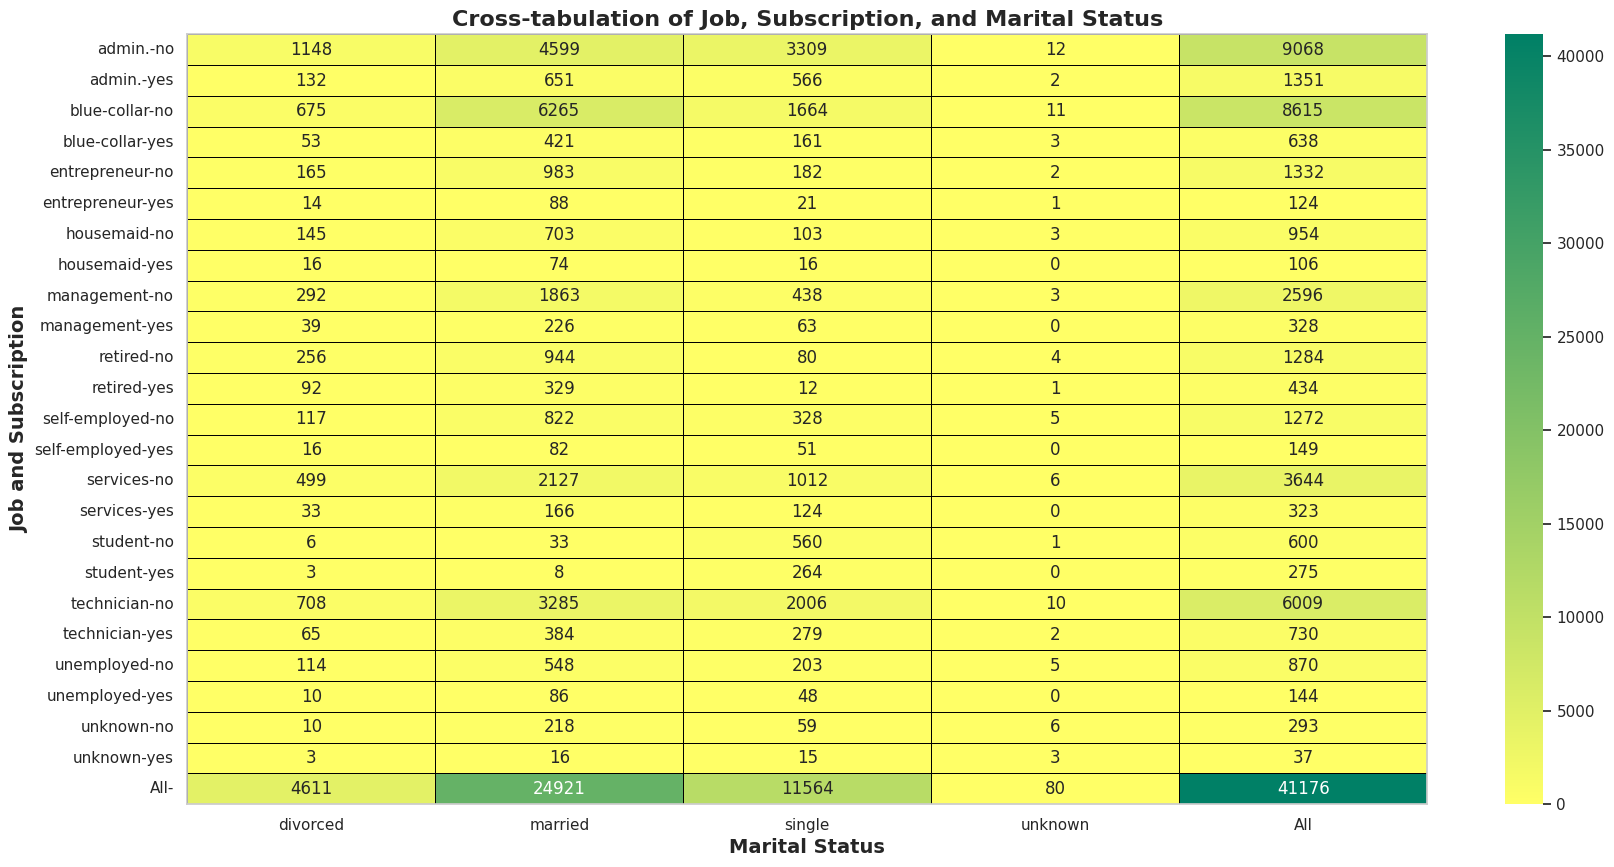

In [110]:
# Plot the correlation between job, subscription and marital status

cross_tab_df = pd.crosstab([df2['job'], df2['y']], df2['marital'], margins=True)

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(cross_tab_df, annot=True, cmap='summer_r', fmt='d', cbar=True, linewidths=.5, linecolor='black')

# Bold text for feature names
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

heatmap.set_title('Cross-tabulation of Job, Subscription, and Marital Status', fontweight='bold', fontsize=16)
plt.xlabel('Marital Status', fontweight='bold', fontsize=14)
plt.ylabel('Job and Subscription', fontweight='bold', fontsize=14)
plt.show()

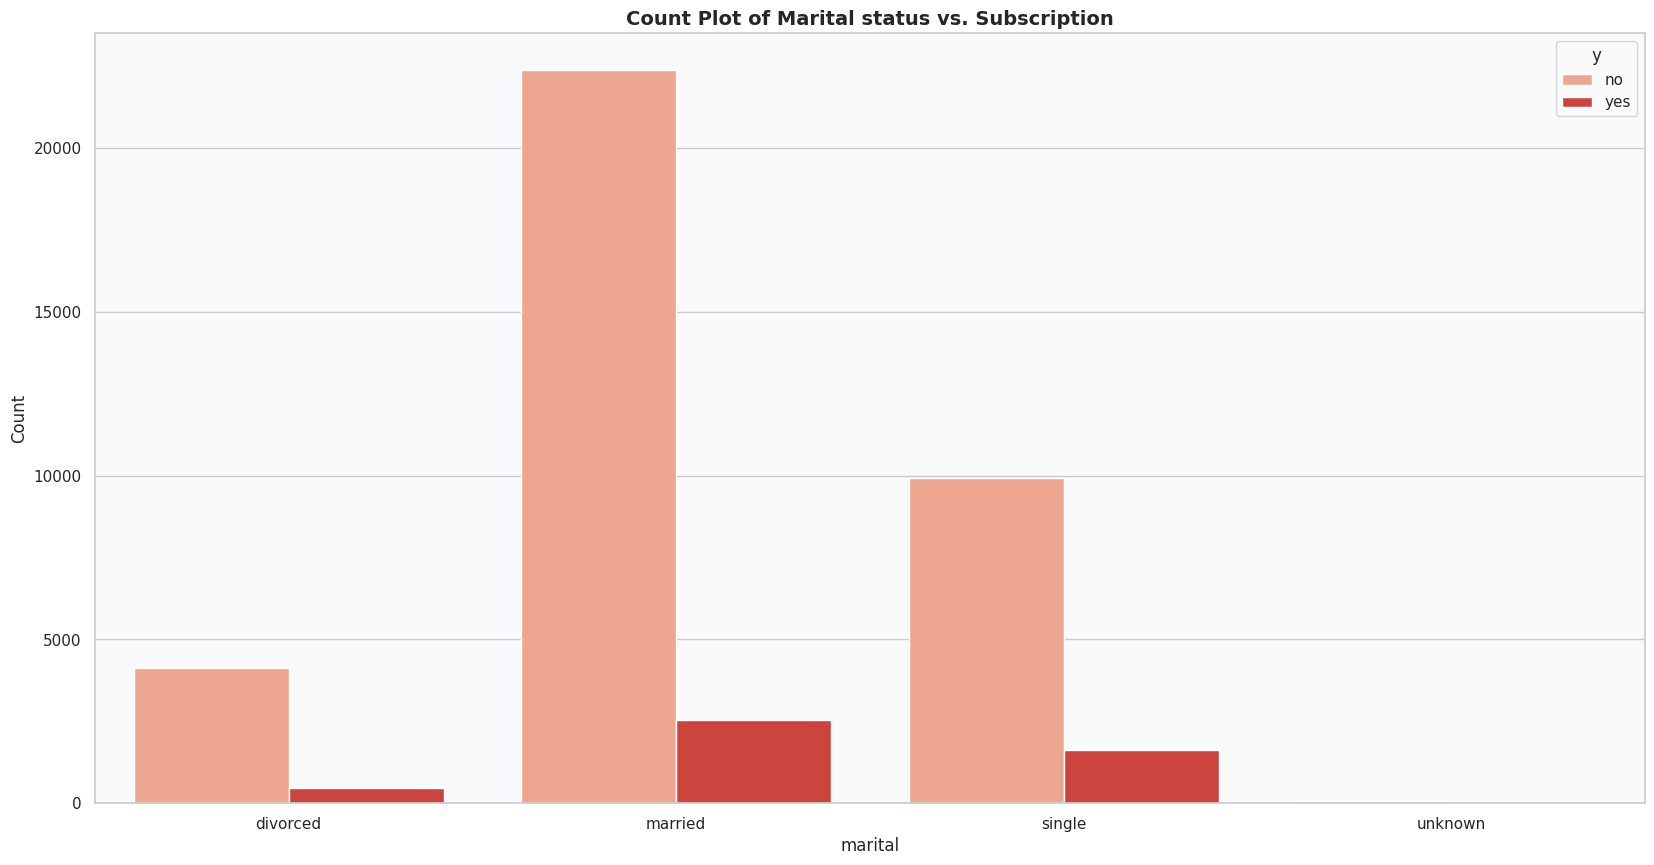

In [111]:
plot_categorical_count(df2[['marital', 'y']], x_column='marital', hue_column='y', title='Count Plot of Marital status vs. Subscription', palette='Reds')


In [112]:
# Plotly
plotly_categorical_count(df2[['marital', 'y']], x_column='marital', hue_column='y', title='Count Plot of Marital status based on Subscription')


In [113]:
df2.groupby(['education','y'])['y'].count()


education            y  
basic.4y             no      3748
                     yes      428
basic.6y             no      2103
                     yes      188
basic.9y             no      5572
                     yes      473
high.school          no      8481
                     yes     1031
illiterate           no        14
                     yes        4
professional.course  no      4645
                     yes      595
university.degree    no     10495
                     yes     1669
unknown              no      1479
                     yes      251
Name: y, dtype: int64

In [114]:
pd.crosstab(df2.y, df2.education, margins=True).style.background_gradient(cmap='summer_r')


In [115]:
pd.crosstab([df2.job, df2.y], df2.education, margins=True).style.background_gradient(cmap='summer_r')


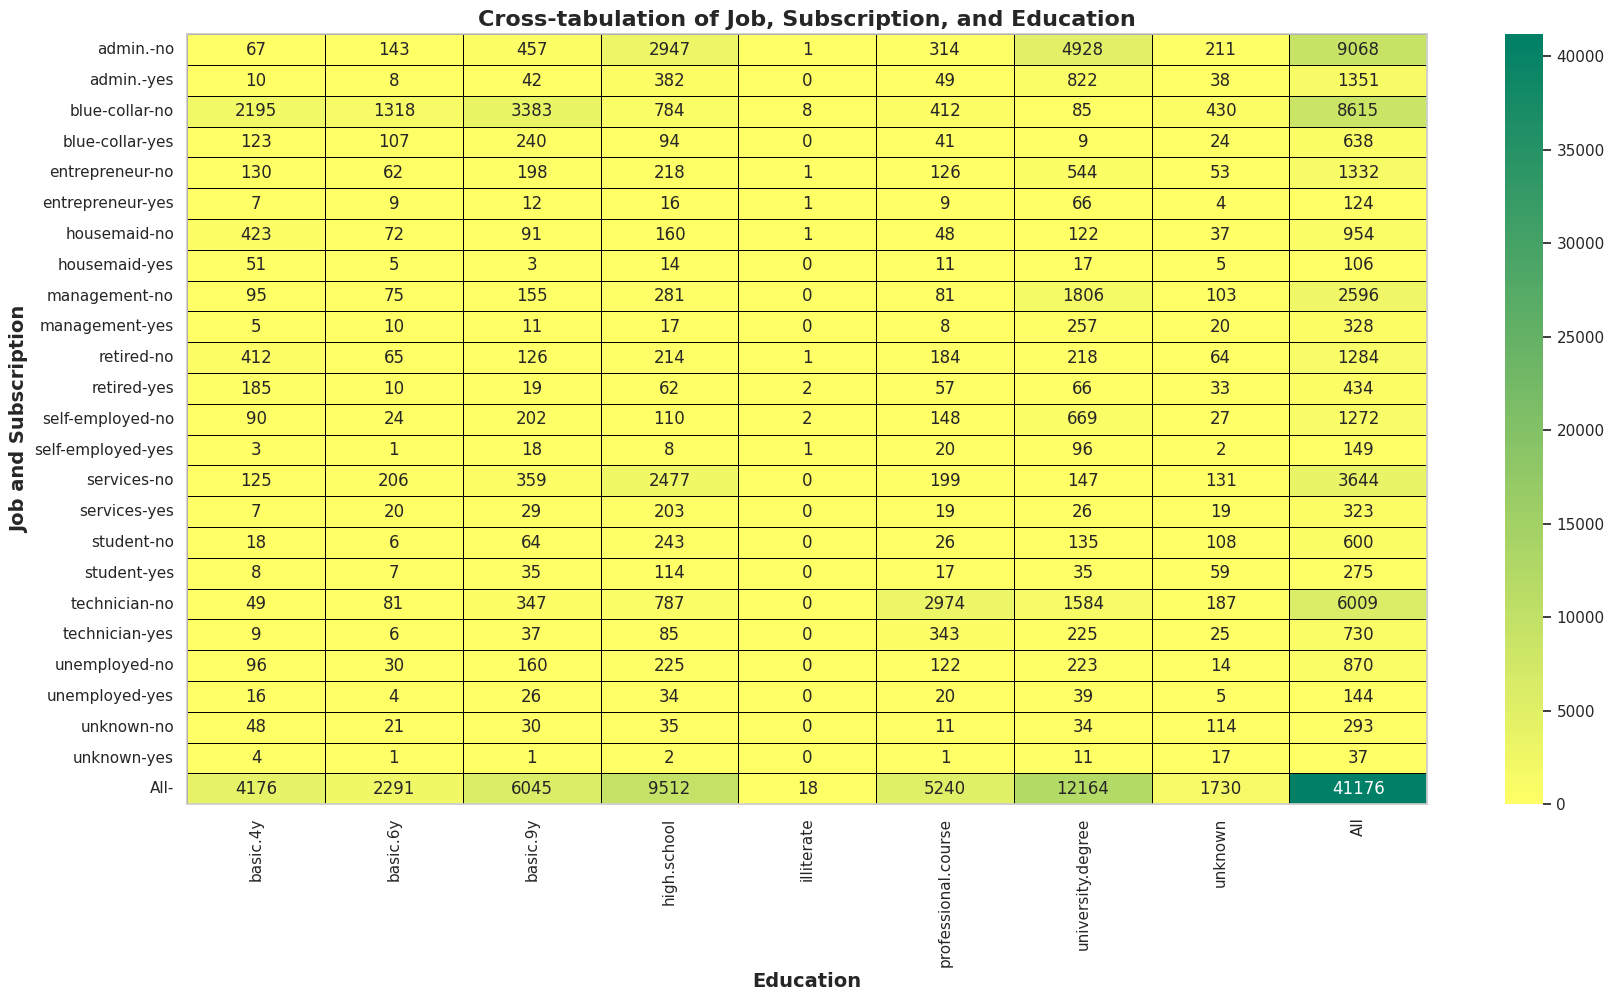

In [116]:
# Plot the correlation between job, subscription and education

cross_tab_df = pd.crosstab([df2['job'], df2['y']], df2['education'], margins=True)

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(cross_tab_df, annot=True, cmap='summer_r', fmt='d', cbar=True, linewidths=.5, linecolor='black')

# Bold text for feature names
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

heatmap.set_title('Cross-tabulation of Job, Subscription, and Education', fontweight='bold', fontsize=16)
plt.xlabel('Education', fontweight='bold', fontsize=14)
plt.ylabel('Job and Subscription', fontweight='bold', fontsize=14)

plt.show()

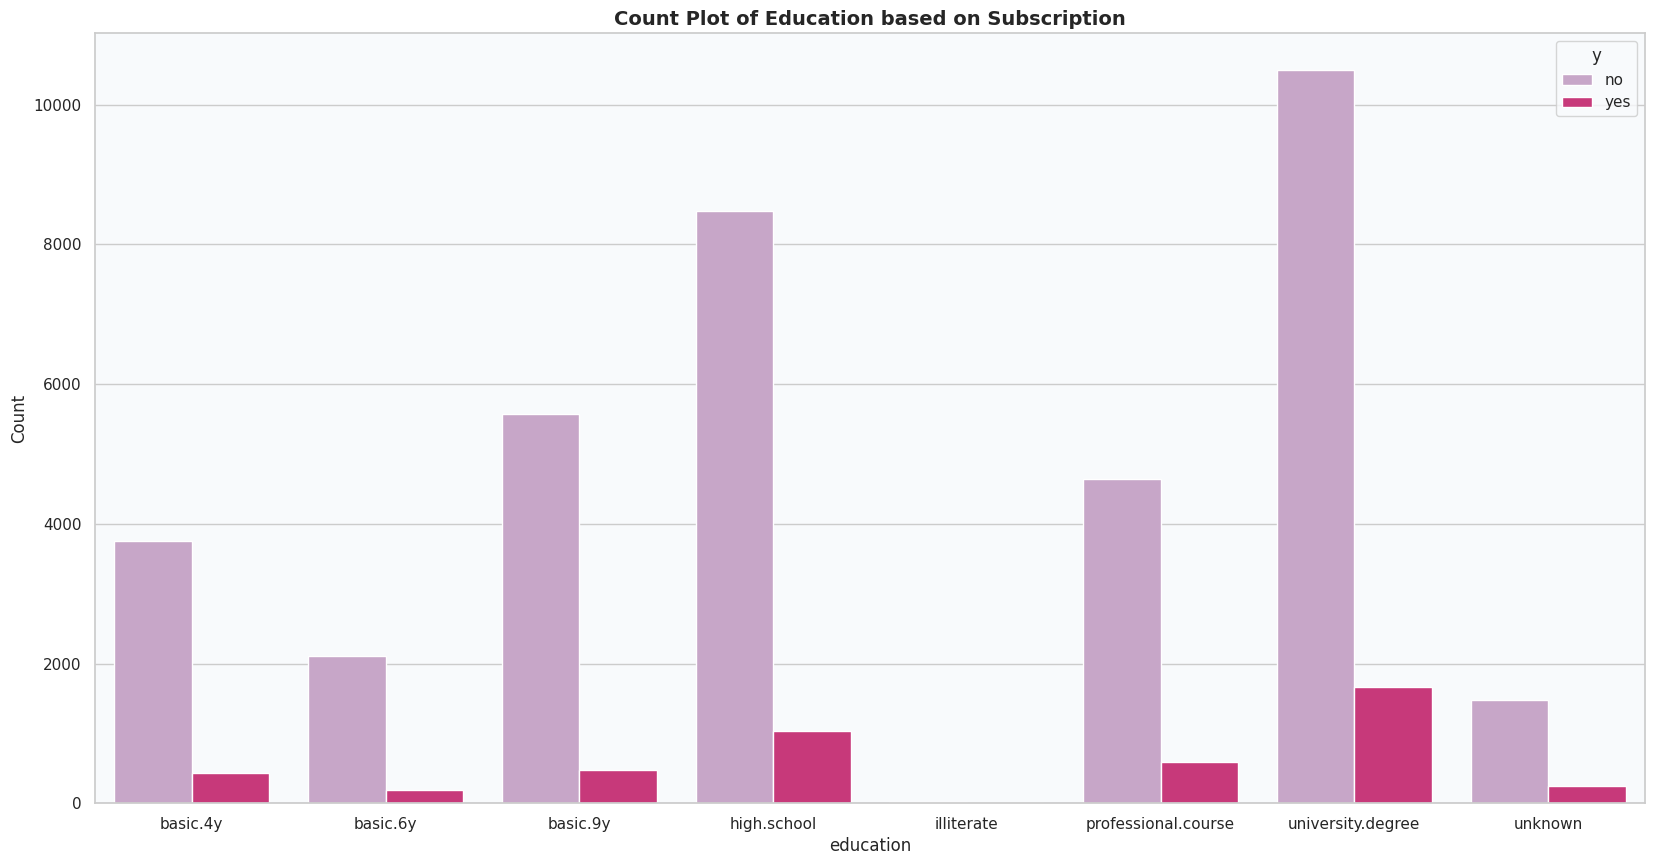

In [117]:
plot_categorical_count(df2[['education', 'y']], x_column='education', hue_column='y', title='Count Plot of Education based on Subscription', palette='PuRd')


In [118]:
# Plotly
plotly_categorical_count(df2[['education', 'y']], x_column='education', hue_column='y', title='<b>Count Plot of Education based on Subscription</b>')

In [119]:
df2.groupby(['default','y'])['y'].count()

default  y  
no       no     28381
         yes     4196
unknown  no      8153
         yes      443
yes      no         3
         yes        0
Name: y, dtype: int64

In [120]:
pd.crosstab(df2.y, df2.default, margins=True).style.background_gradient(cmap='summer_r')


In [121]:
pd.crosstab([df2.age, df2.y], df2.default, margins=True).style.background_gradient(cmap='summer_r')


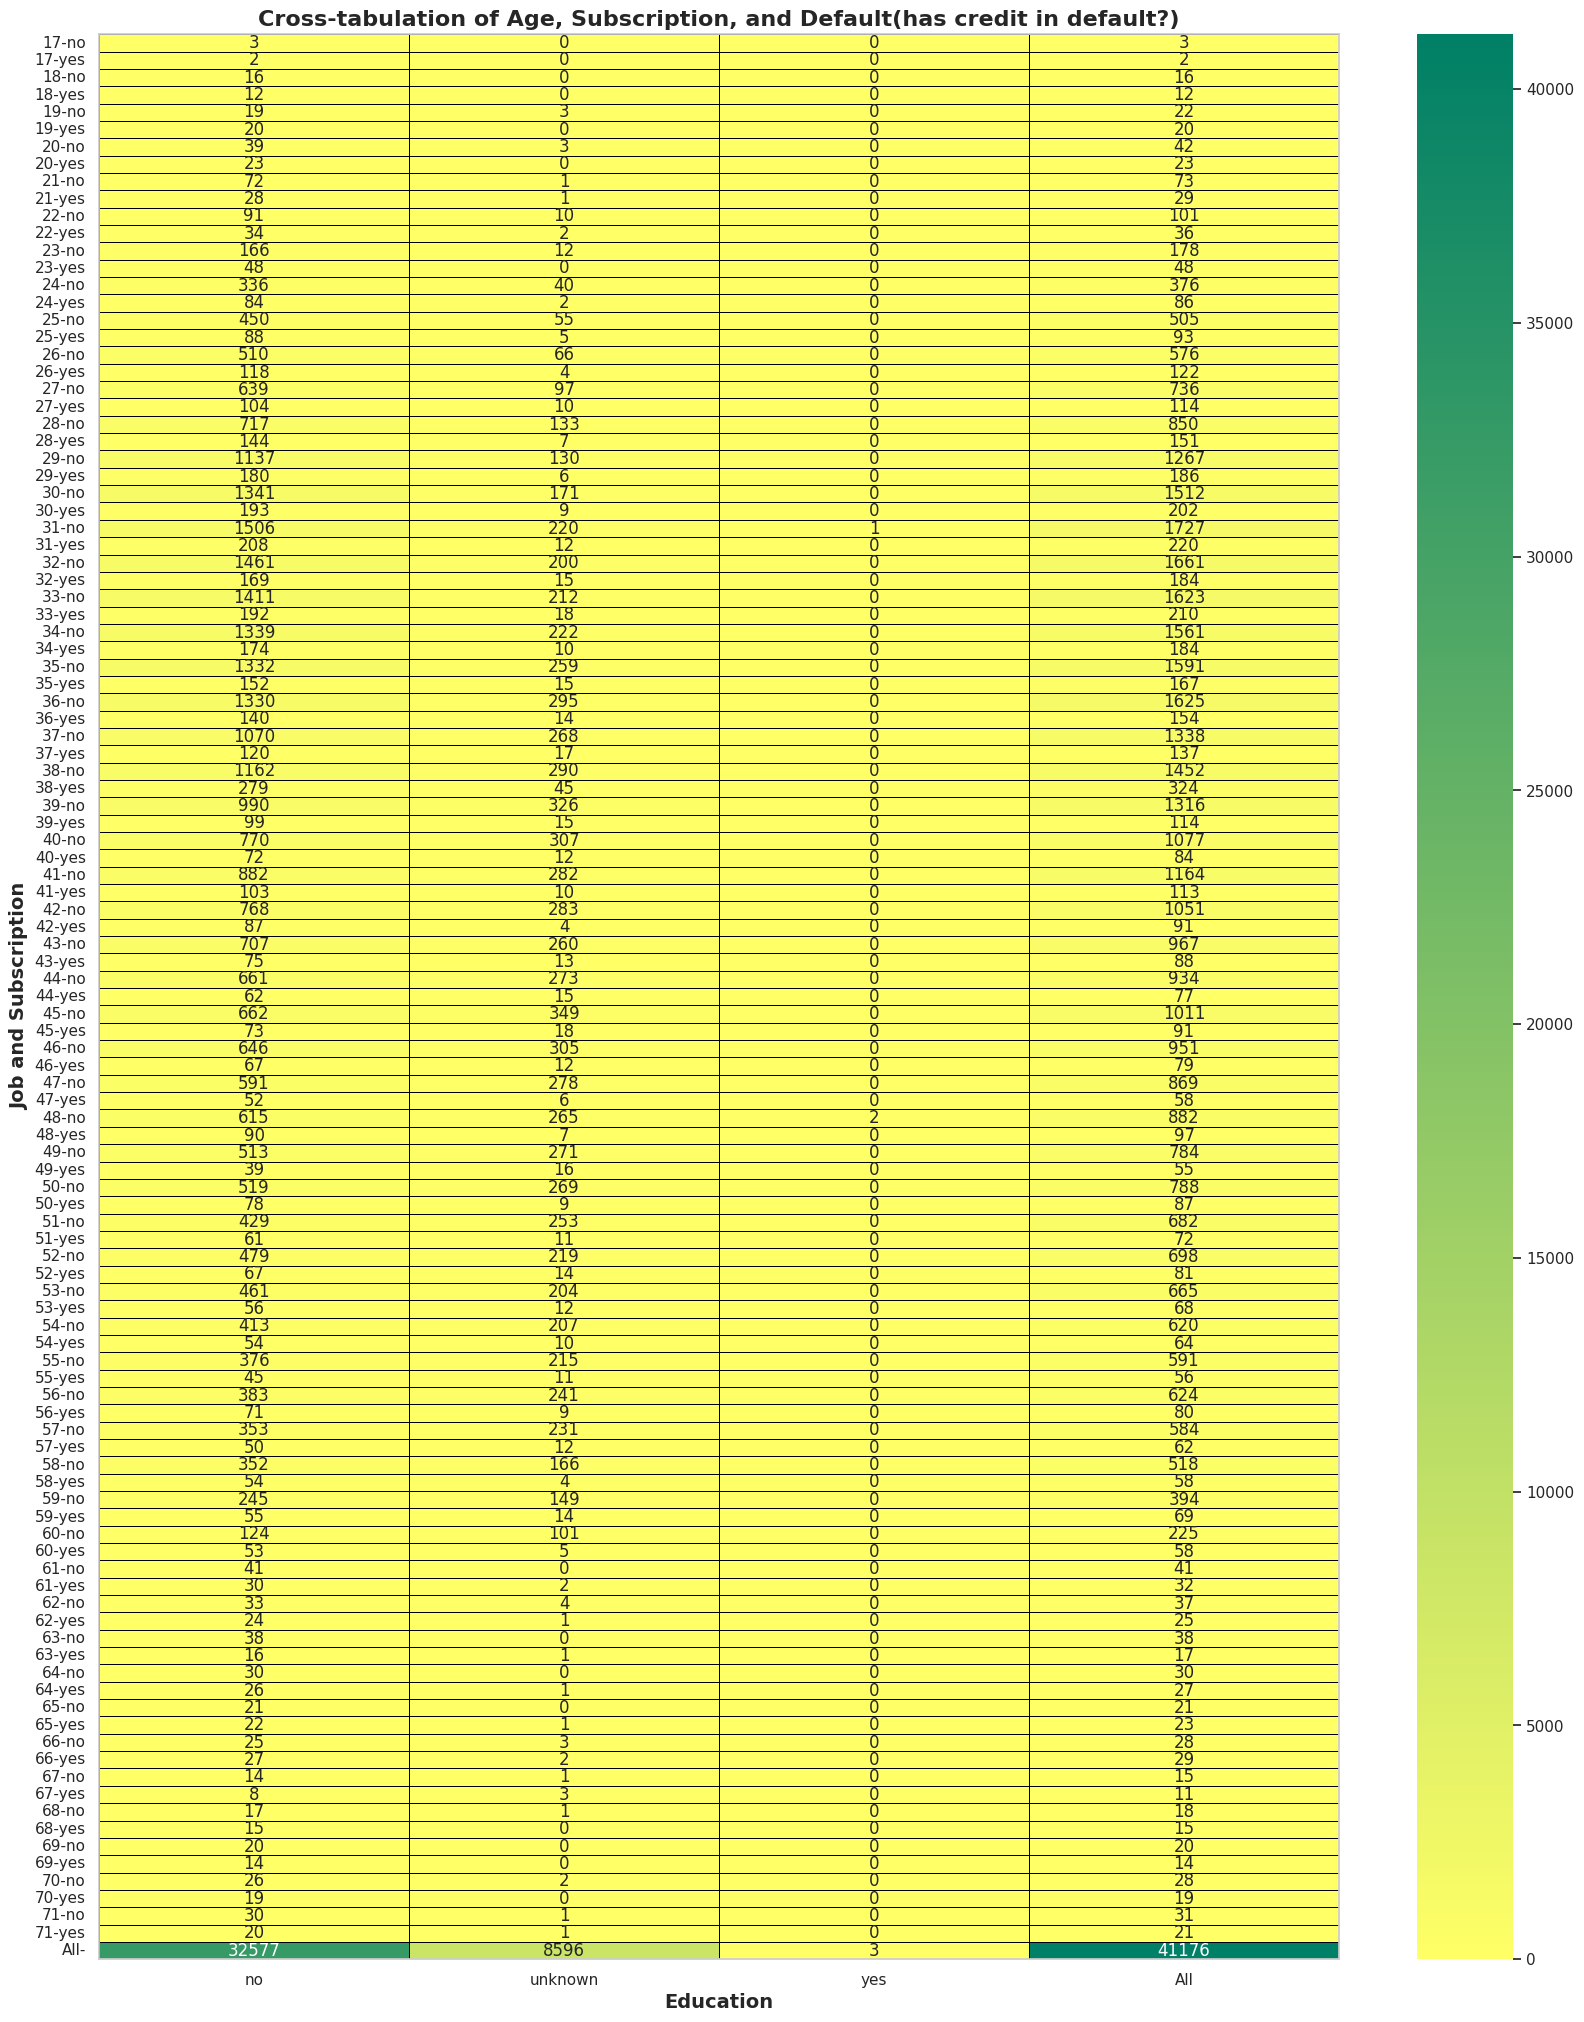

In [122]:
# Plot the correlation between age, subscription and default
cross_tab_df = pd.crosstab([df2['age'], df2['y']], df2['default'], margins=True)

plt.figure(figsize=(20, 25))
heatmap = sns.heatmap(cross_tab_df, annot=True, cmap='summer_r', fmt='d', cbar=True, linewidths=.5, linecolor='black')

# Bold text for feature names
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

heatmap.set_title('Cross-tabulation of Age, Subscription, and Default(has credit in default?)', fontweight='bold', fontsize=16)
plt.xlabel('Education', fontweight='bold', fontsize=14)
plt.ylabel('Job and Subscription', fontweight='bold', fontsize=14)

plt.show()

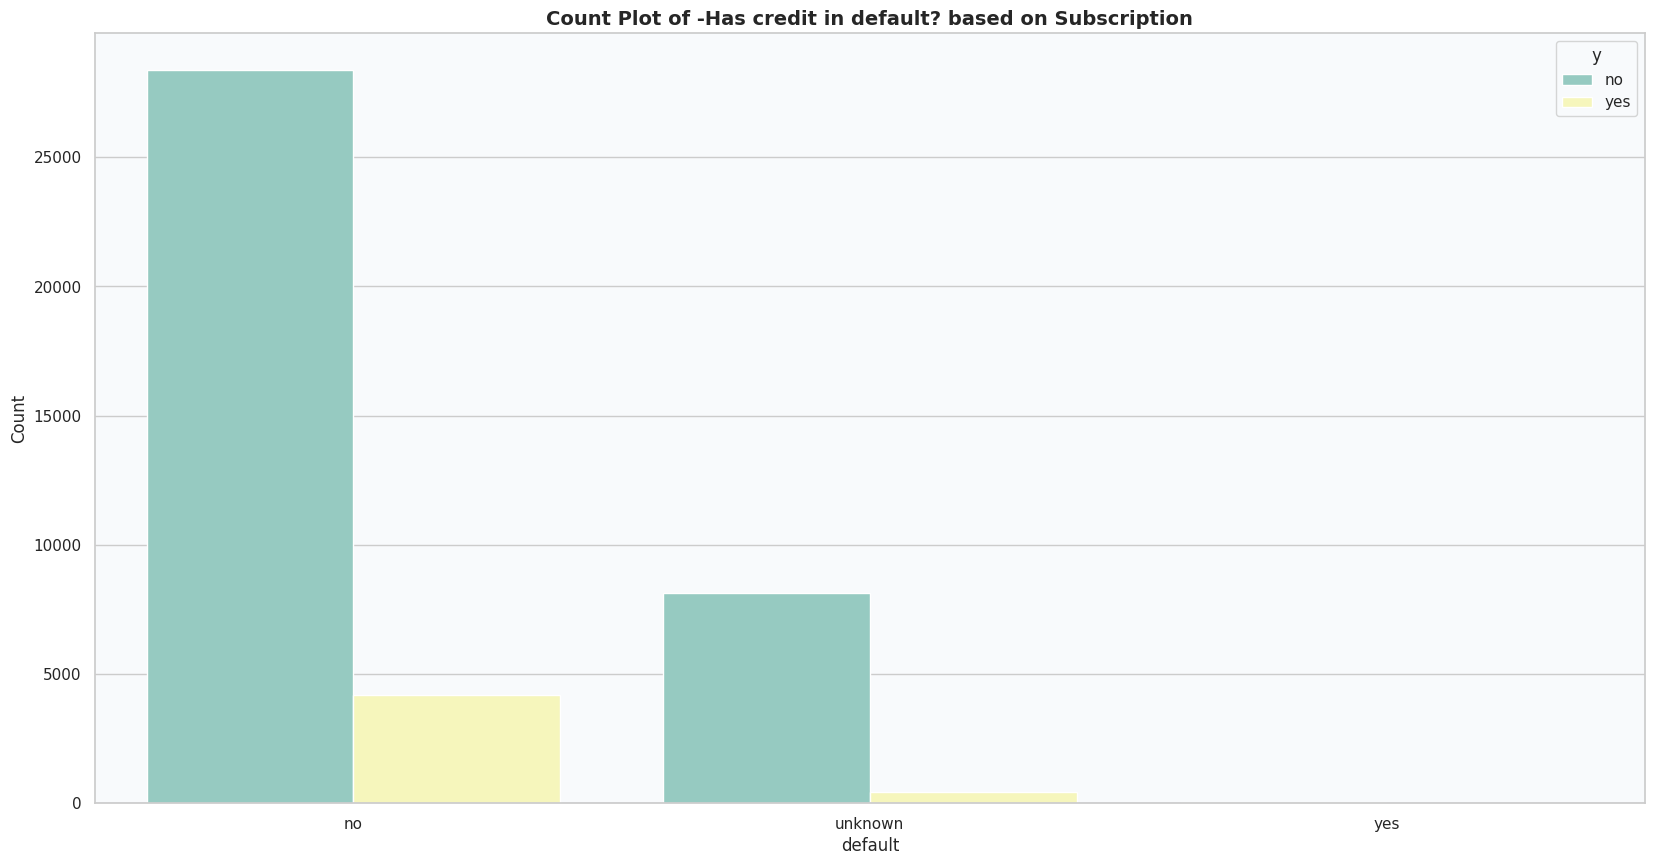

In [123]:
plot_categorical_count(df2[['default', 'y']], x_column='default', hue_column='y', title='Count Plot of -Has credit in default? based on Subscription', palette='Set3')


In [124]:
# Plotly
plotly_categorical_count(df2[['default', 'y']], x_column='default', hue_column='y', title='Count Plot of - Has credit in default? based on Subscription')


In [125]:
df2.groupby(['housing','y'])['y'].count()


housing  y  
no       no     16590
         yes     2025
unknown  no       883
         yes      107
yes      no     19064
         yes     2507
Name: y, dtype: int64

In [126]:
pd.crosstab(df2.y, df2.housing, margins=True).style.background_gradient(cmap='summer_r')

In [127]:
pd.crosstab([df2.marital, df2.y], df2.housing, margins=True).style.background_gradient(cmap='summer_r')

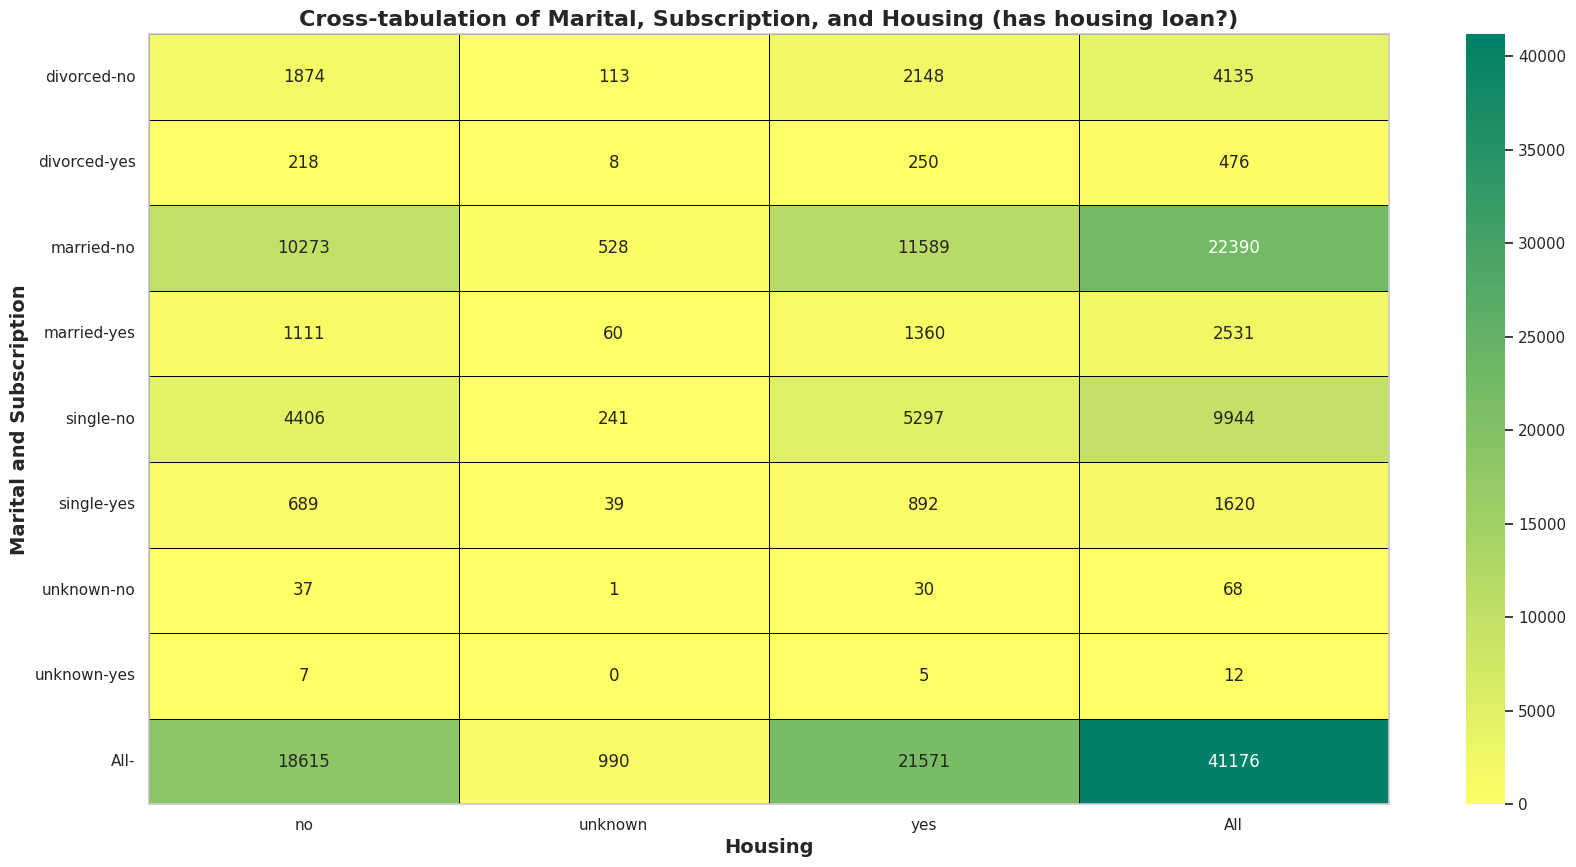

In [128]:
# Plot the correlation between marital, subscription and housing
cross_tab_df = pd.crosstab([df2['marital'], df2['y']], df2['housing'], margins=True)

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(cross_tab_df, annot=True, cmap='summer_r', fmt='d', cbar=True, linewidths=.5, linecolor='black')

# Bold text for feature names
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

heatmap.set_title('Cross-tabulation of Marital, Subscription, and Housing (has housing loan?)', fontweight='bold', fontsize=16)
plt.xlabel('Housing', fontweight='bold', fontsize=14)
plt.ylabel('Marital and Subscription', fontweight='bold', fontsize=14)

plt.show()

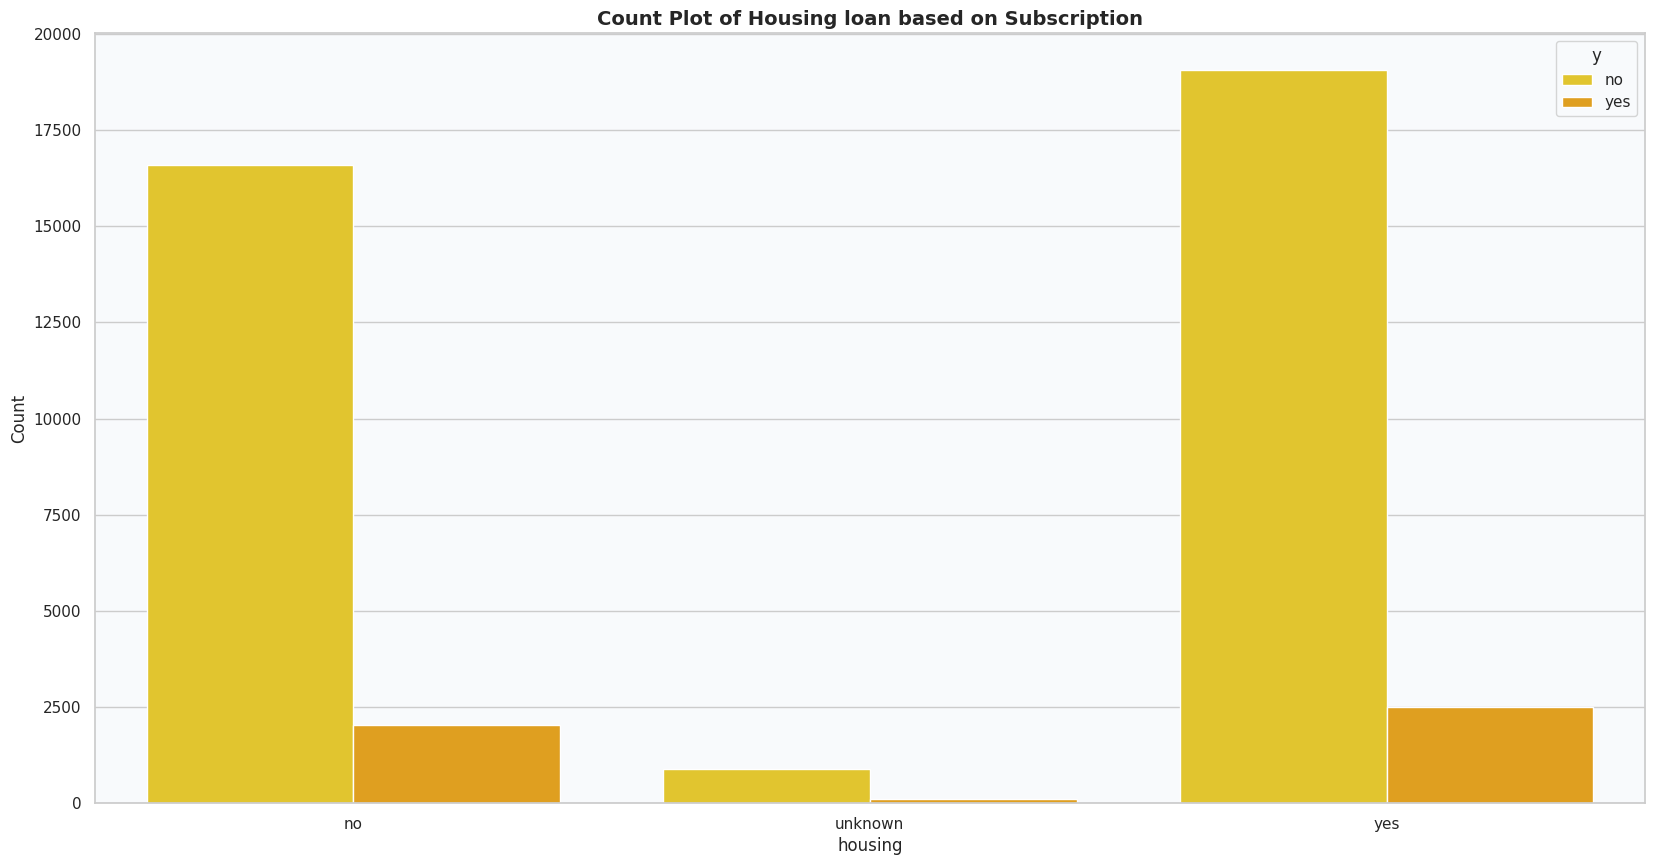

In [129]:
plot_categorical_count(df2[['housing', 'y']], x_column='housing', hue_column='y', title='Count Plot of Housing loan based on Subscription', palette='Wistia')


In [130]:
# Plotly
plotly_categorical_count(df2[['housing', 'y']], x_column='housing', hue_column='y', title='Count Plot of Housing loan based on Subscription')

In [131]:
df2.groupby(['loan','y'])['y'].count()

loan     y  
no       no     30089
         yes     3849
unknown  no       883
         yes      107
yes      no      5565
         yes      683
Name: y, dtype: int64

In [132]:
pd.crosstab(df2.y, df2.loan, margins=True).style.background_gradient(cmap='summer_r')

In [133]:
pd.crosstab([df2.loan, df2.y], df2.marital, margins=True).style.background_gradient(cmap='summer_r')

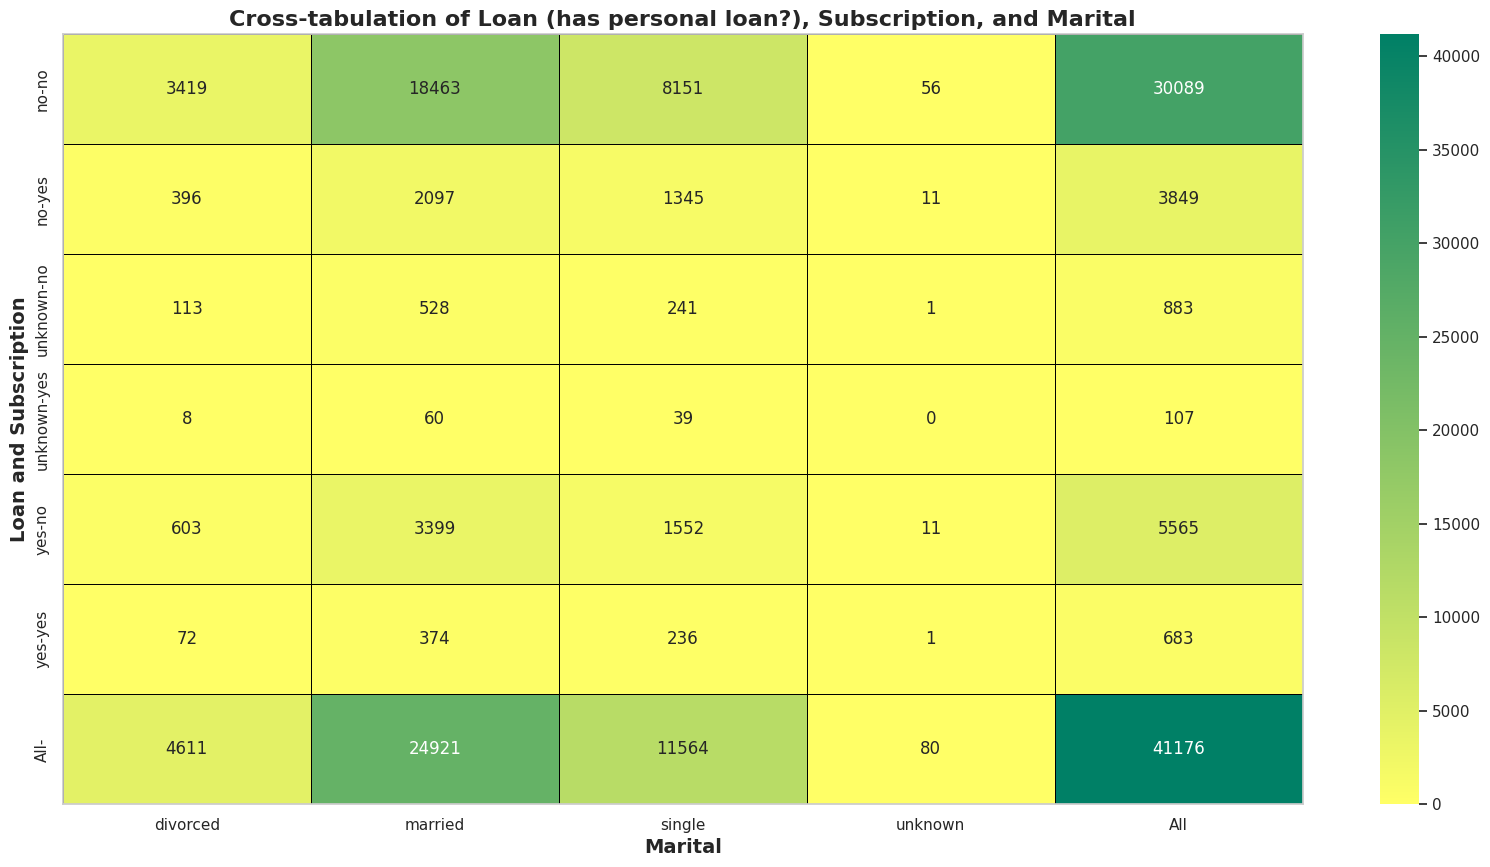

In [134]:
# Plot the correlation between loan, subscription and marital status
cross_tab_df = pd.crosstab([df2['loan'], df2['y']], df2['marital'], margins=True)

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(cross_tab_df, annot=True, cmap='summer_r', fmt='d', cbar=True, linewidths=.5, linecolor='black')

# Bold text for feature names
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

heatmap.set_title('Cross-tabulation of Loan (has personal loan?), Subscription, and Marital', fontweight='bold', fontsize=16)
plt.xlabel('Marital', fontweight='bold', fontsize=14)
plt.ylabel('Loan and Subscription', fontweight='bold', fontsize=14)

plt.show()

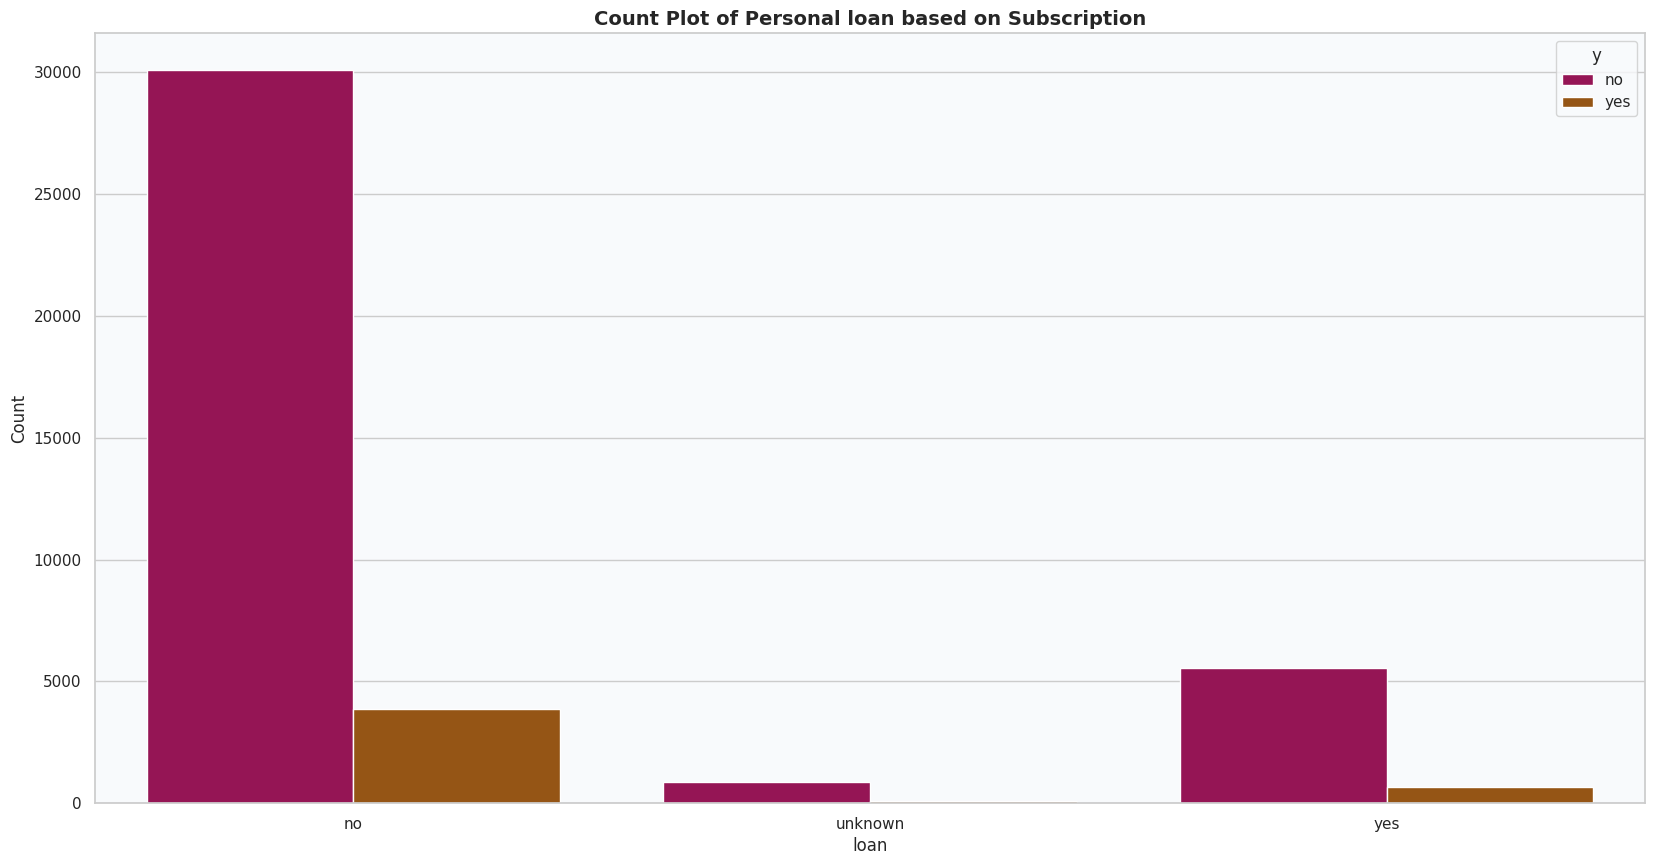

In [135]:
plot_categorical_count(df2[['loan', 'y']], x_column='loan', hue_column='y', title='Count Plot of Personal loan based on Subscription', palette='brg')

In [136]:
# Plotly
plotly_categorical_count(df2[['loan', 'y']], x_column='loan', hue_column='y', title='<b>Count Plot of Personal loan based on Subscription</b>')

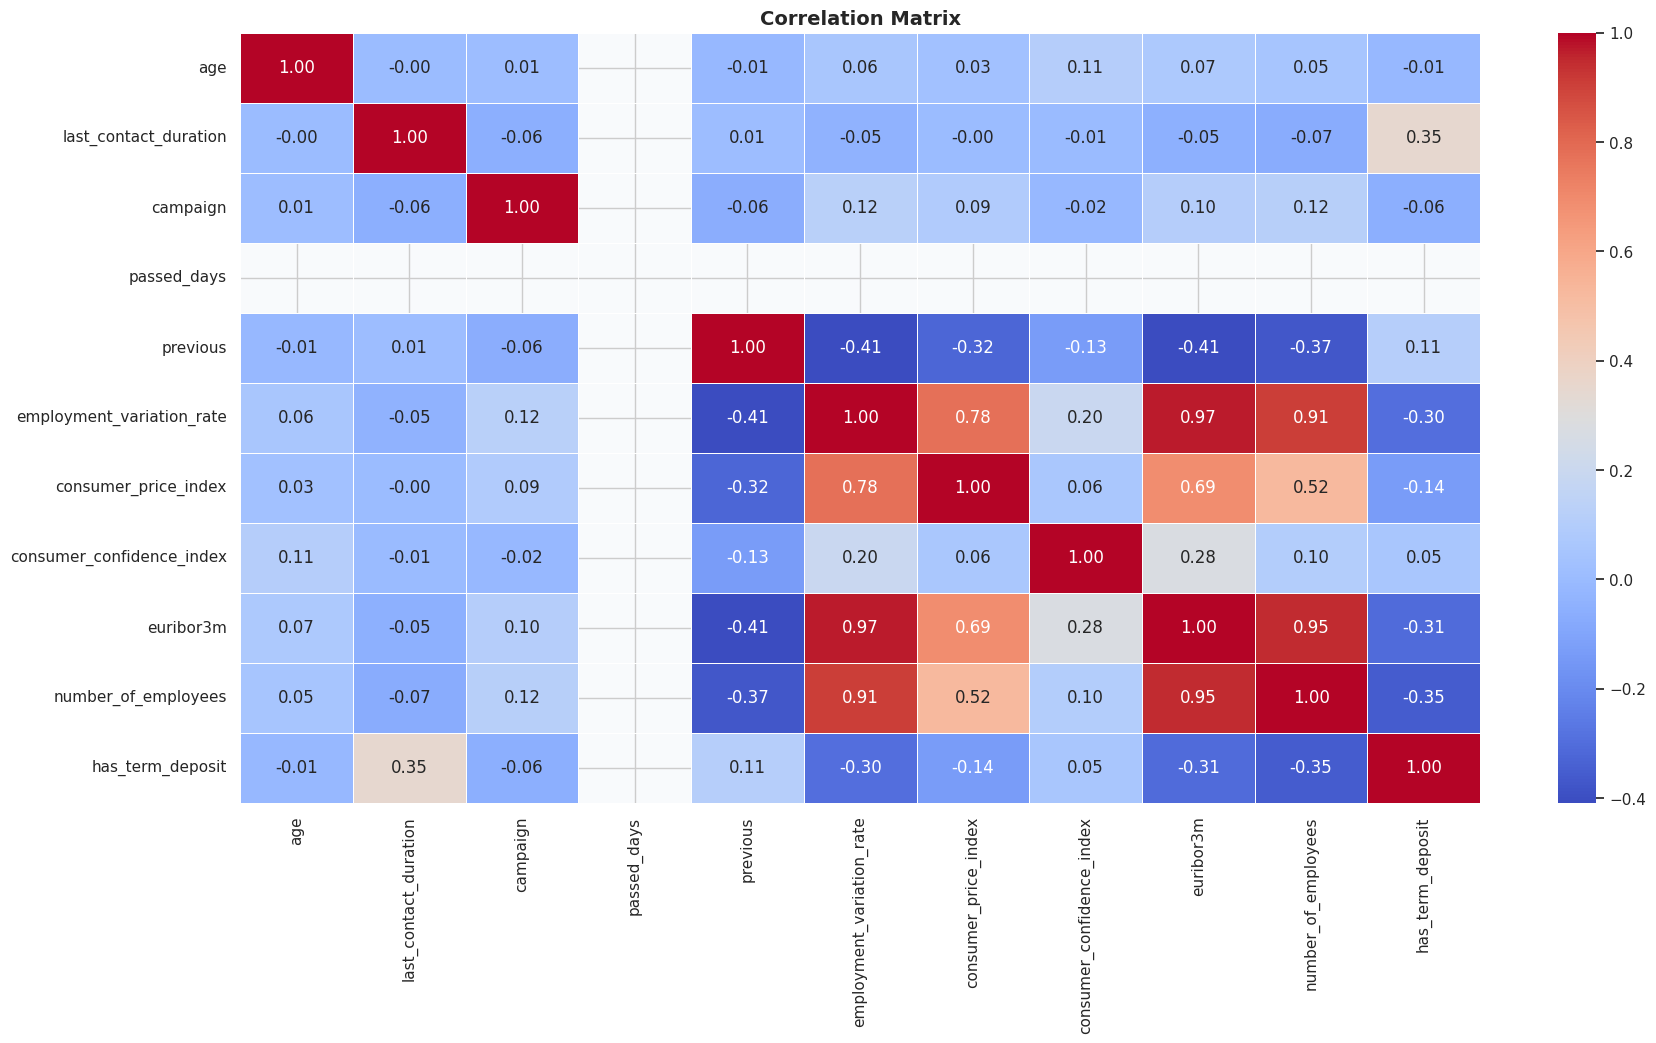

In [137]:
# Select the specified features
numeric_features = df2[['age', 'last_contact_duration', 'campaign', 'passed_days', 'previous',
            'employment_variation_rate', 'consumer_price_index', 'consumer_confidence_index',
            'euribor3m', 'number_of_employees', 'has_term_deposit']]

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the plot
plt.title('Correlation Matrix', fontweight='bold', fontsize=14)

plt.show()


In [138]:
numeric_features = df2[['age', 'last_contact_duration', 'campaign', 'passed_days', 'previous',
            'employment_variation_rate', 'consumer_price_index', 'consumer_confidence_index',
            'euribor3m', 'number_of_employees', 'has_term_deposit']]

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Create a Plotly figure for the correlation matrix
fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=numeric_features.columns,
                y=numeric_features.columns,
                color_continuous_scale='blues',  # Choose an appropriate color scale
                title='Correlation Matrix')

# Customize the layout
fig.update_layout(width=1000, height=800)

# Show the figure
fig.show()


In [139]:
# Plot a correlation matrix heatmap between one numeric feature and target
def plot_correlation_heatmap(df, features, target, cmap='coolwarm', figsize=(10, 8)):
    df_selected = df[features + [target]]

    # Calculate correlation matrix
    correlation_matrix = df_selected.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)

    # Create a heatmap using seaborn
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)

    # Set the title
    plt.title(f'Correlation Matrix Heatmap - {target} vs {", ".join(features)}')

    # Show the plot
    plt.show()

In [140]:
# Plot a correlation matrix heatmap between one numeric feature and target (Using Plotly)
def plot_correlation_heatmap_plotly(df, features, target, colorscale='Viridis'):
    # Select relevant columns
    df_selected = df[features + [target]]

    # Calculate correlation matrix
    correlation_matrix = df_selected.corr()

    # Create a heatmap using Plotly
    heatmap = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale=colorscale,
        colorbar=dict(title='Correlation'),
    ))

    # Customize the layout
    heatmap.update_layout(
        title=f'Correlation Matrix Heatmap - {target} vs {", ".join(features)}',
        xaxis=dict(title='Variable'),
        yaxis=dict(title='Variable'),
    )

    # Show the plot
    heatmap.show()

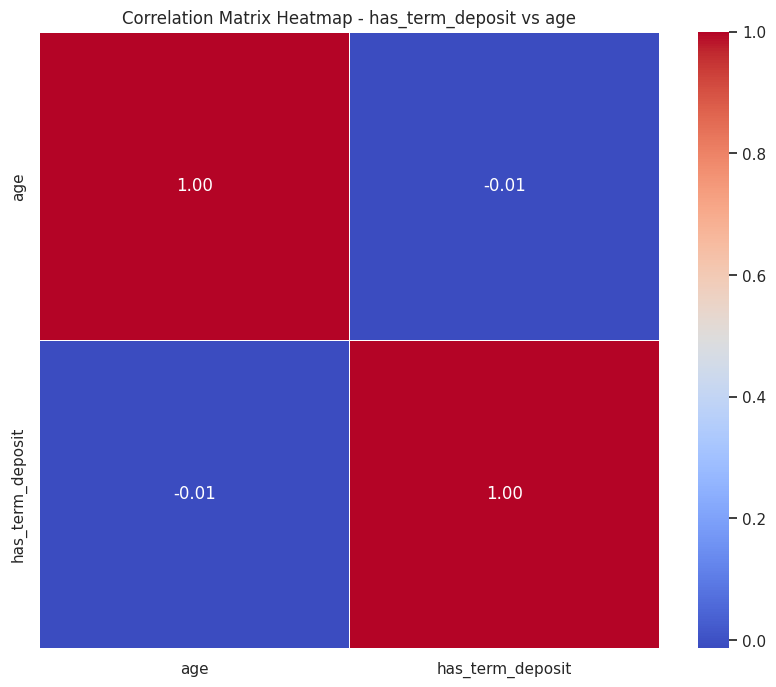

In [141]:
plot_correlation_heatmap(df2, features=['age'], target='has_term_deposit')

In [142]:
plot_correlation_heatmap_plotly(df2, features=['age'], target='has_term_deposit')


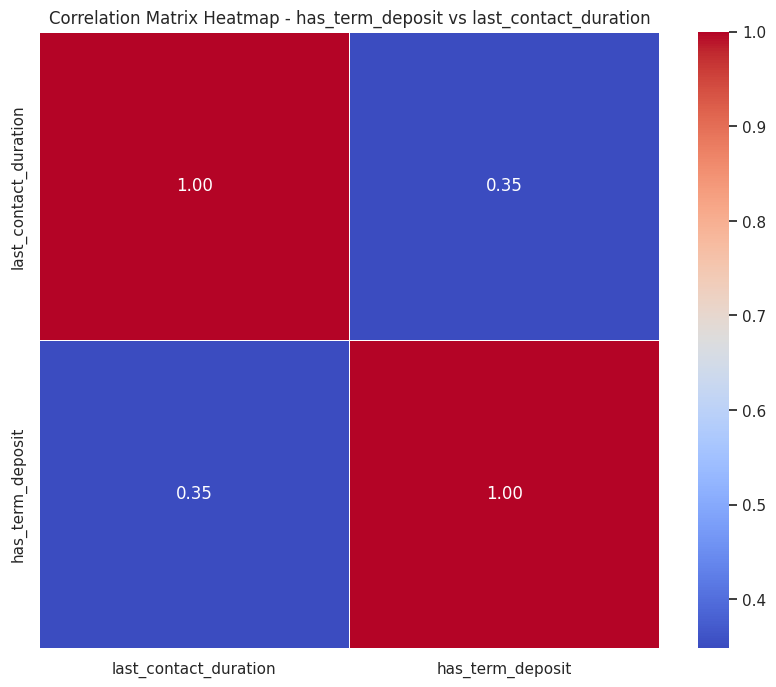

In [143]:
plot_correlation_heatmap(df2, features=['last_contact_duration'], target='has_term_deposit')

In [144]:
plot_correlation_heatmap_plotly(df2, features=['last_contact_duration'], target='has_term_deposit')

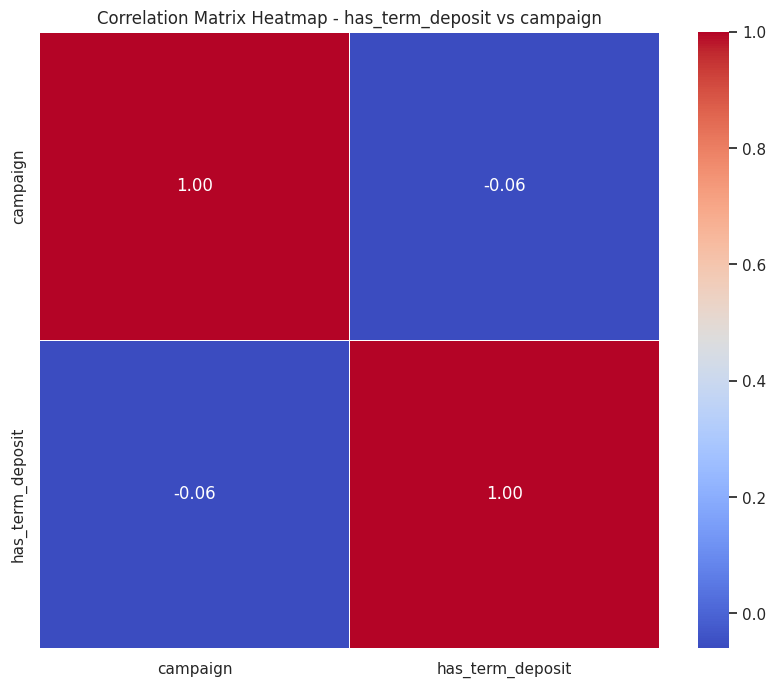

In [145]:
plot_correlation_heatmap(df2, features=['campaign'], target='has_term_deposit')

In [146]:
plot_correlation_heatmap_plotly(df2, features=['campaign'], target='has_term_deposit')

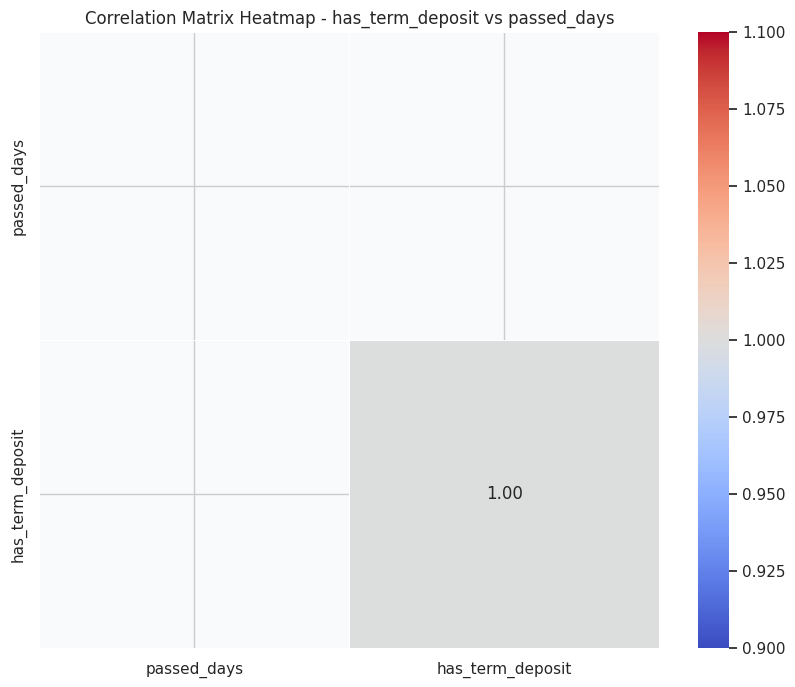

In [147]:
plot_correlation_heatmap(df2, features=['passed_days'], target='has_term_deposit')

In [148]:
plot_correlation_heatmap_plotly(df2, features=['passed_days'], target='has_term_deposit')

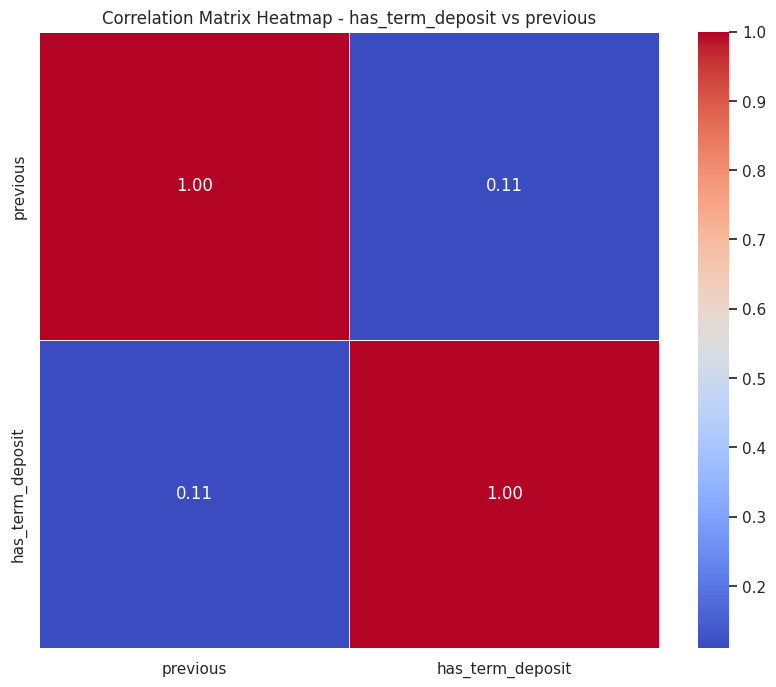

In [149]:
plot_correlation_heatmap(df2, features=['previous'], target='has_term_deposit')


In [150]:
plot_correlation_heatmap_plotly(df2, features=['previous'], target='has_term_deposit')

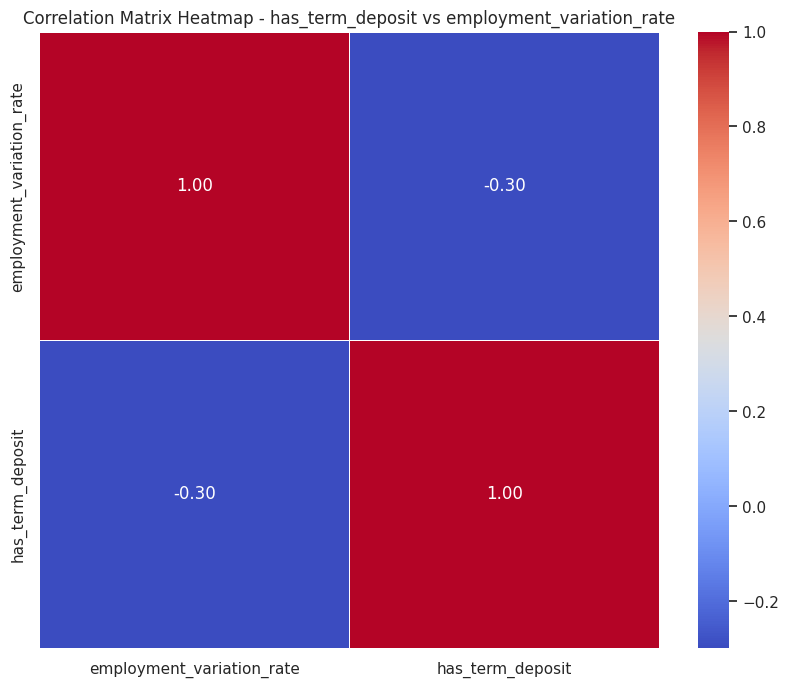

In [151]:
plot_correlation_heatmap(df2, features=['employment_variation_rate'], target='has_term_deposit')

In [152]:
plot_correlation_heatmap_plotly(df2, features=['employment_variation_rate'], target='has_term_deposit')

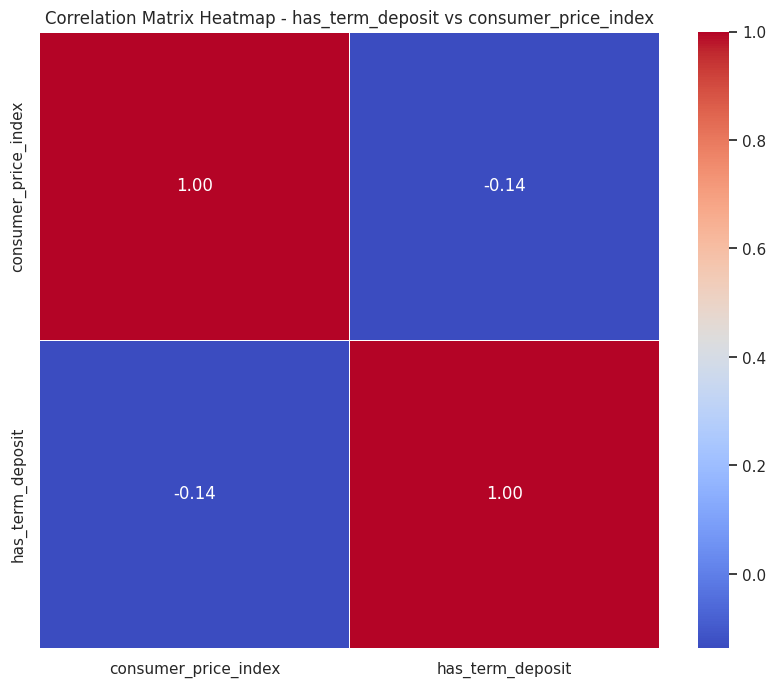

In [153]:
plot_correlation_heatmap(df2, features=['consumer_price_index'], target='has_term_deposit')

In [154]:
plot_correlation_heatmap_plotly(df2, features=['consumer_price_index'], target='has_term_deposit')

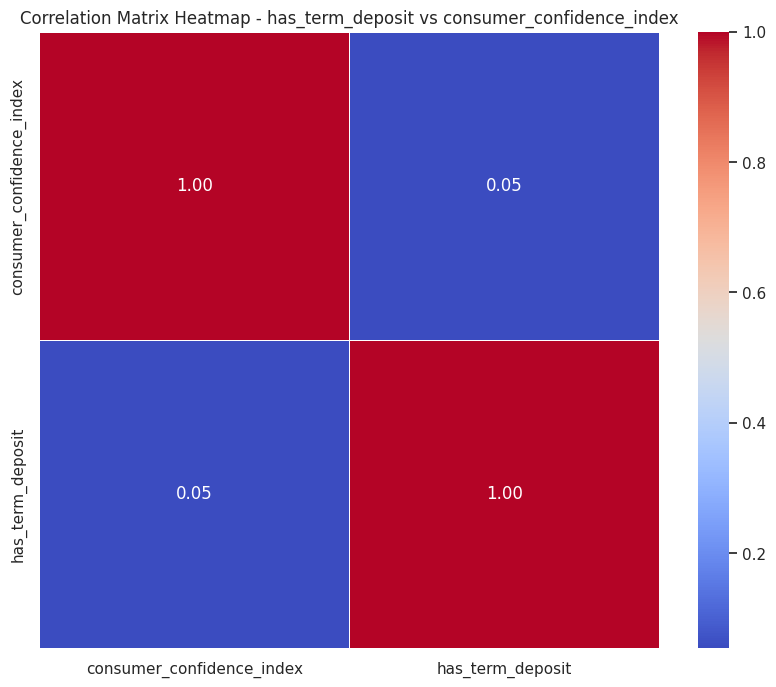

In [155]:
plot_correlation_heatmap(df2, features=['consumer_confidence_index'], target='has_term_deposit')

In [156]:
plot_correlation_heatmap_plotly(df2, features=['consumer_confidence_index'], target='has_term_deposit')

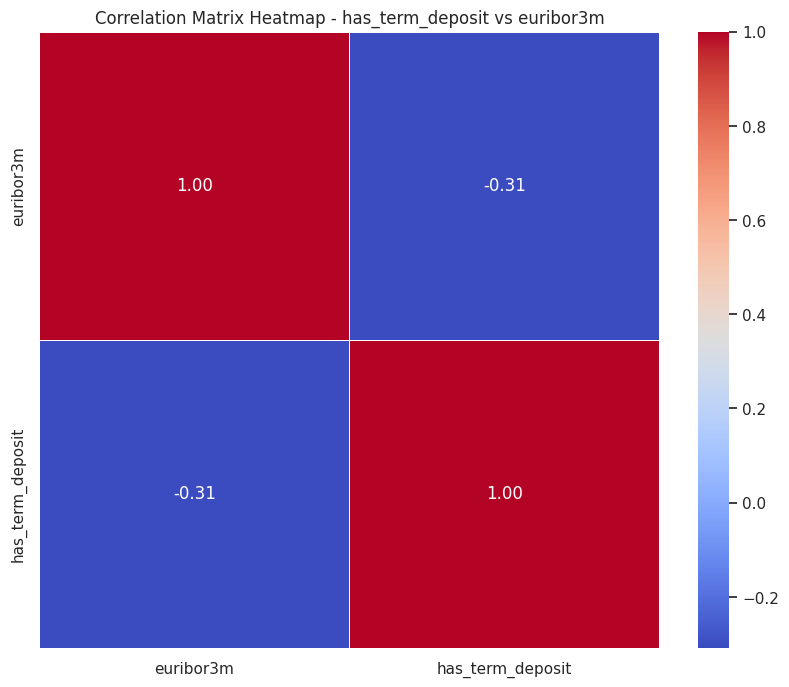

In [157]:
plot_correlation_heatmap(df2, features=['euribor3m'], target='has_term_deposit')

In [158]:
plot_correlation_heatmap_plotly(df2, features=['euribor3m'], target='has_term_deposit')

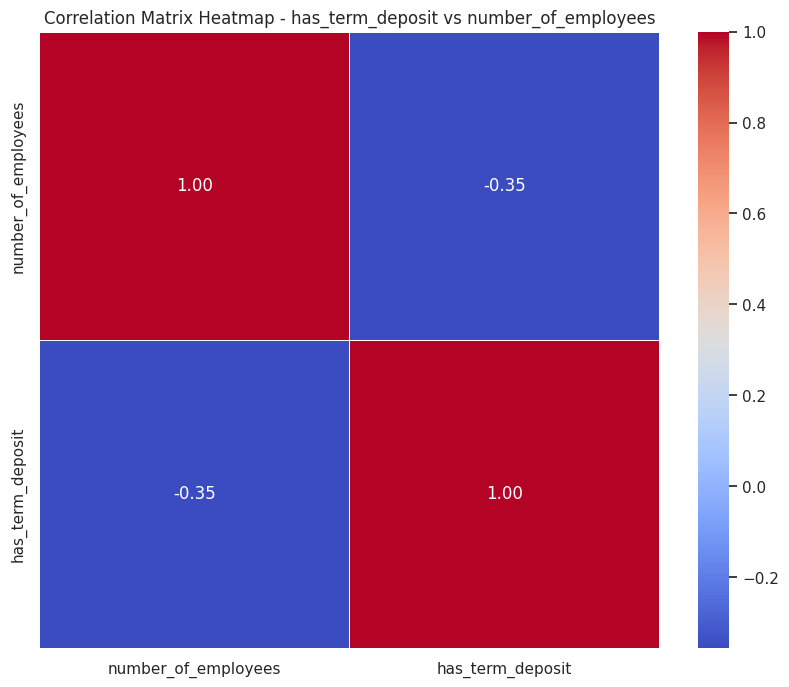

In [159]:
plot_correlation_heatmap(df2, features=['number_of_employees'], target='has_term_deposit')

In [160]:
plot_correlation_heatmap_plotly(df2, features=['number_of_employees'], target='has_term_deposit')

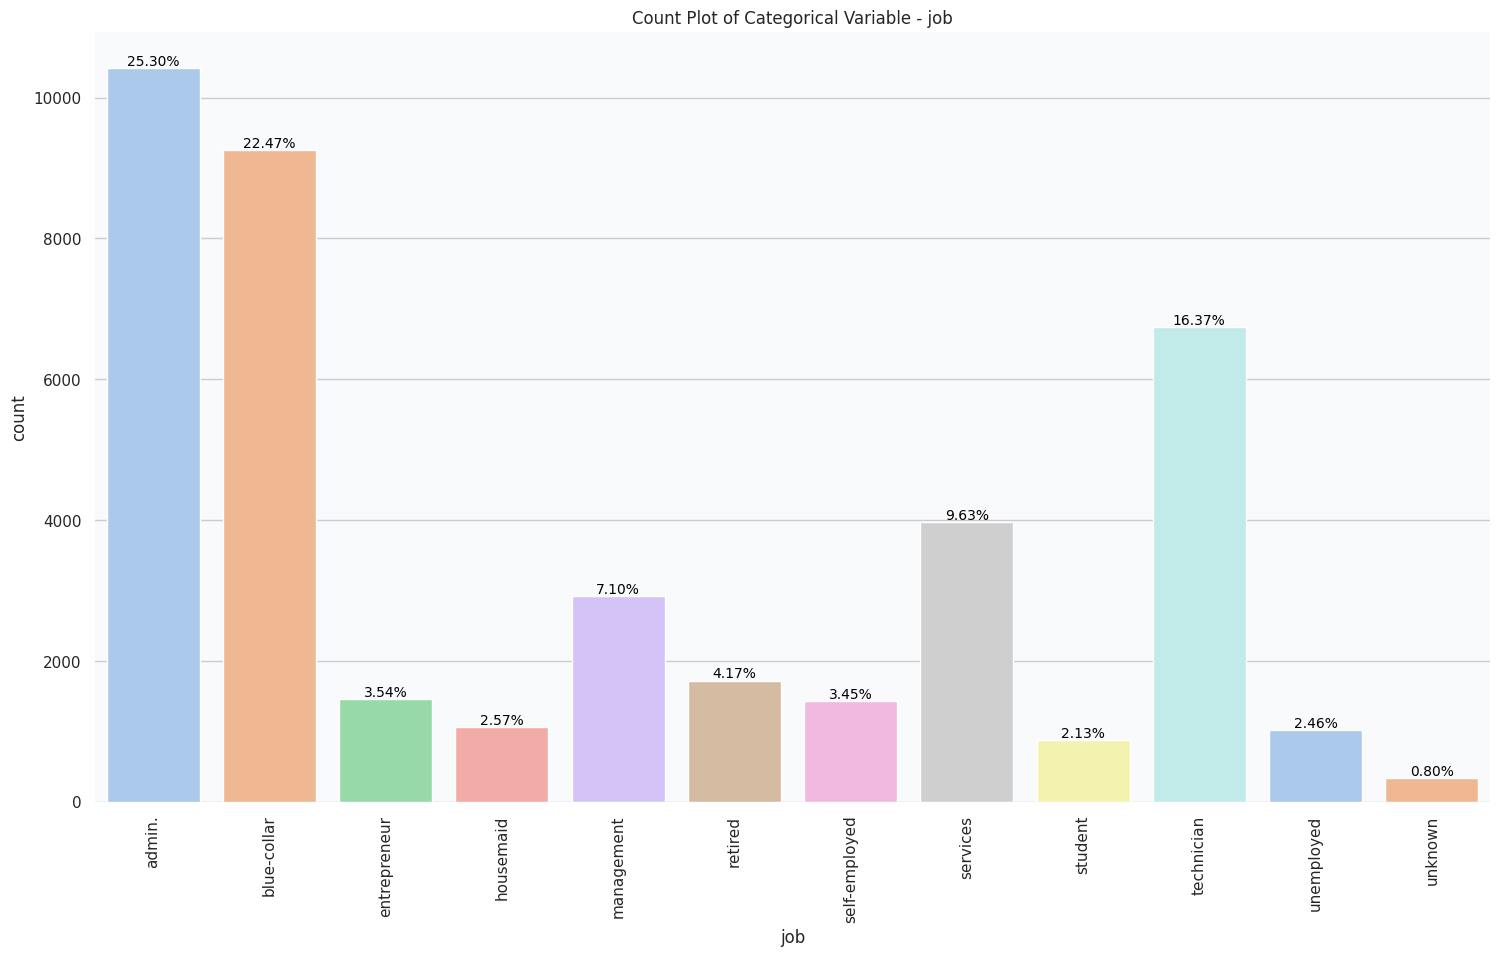

In [161]:
plot_categorical_vars_distribution(df2, 'job')

In [162]:
plot_categorical_vars_distribution_plotly(df2, 'job', '#E6ECF5')

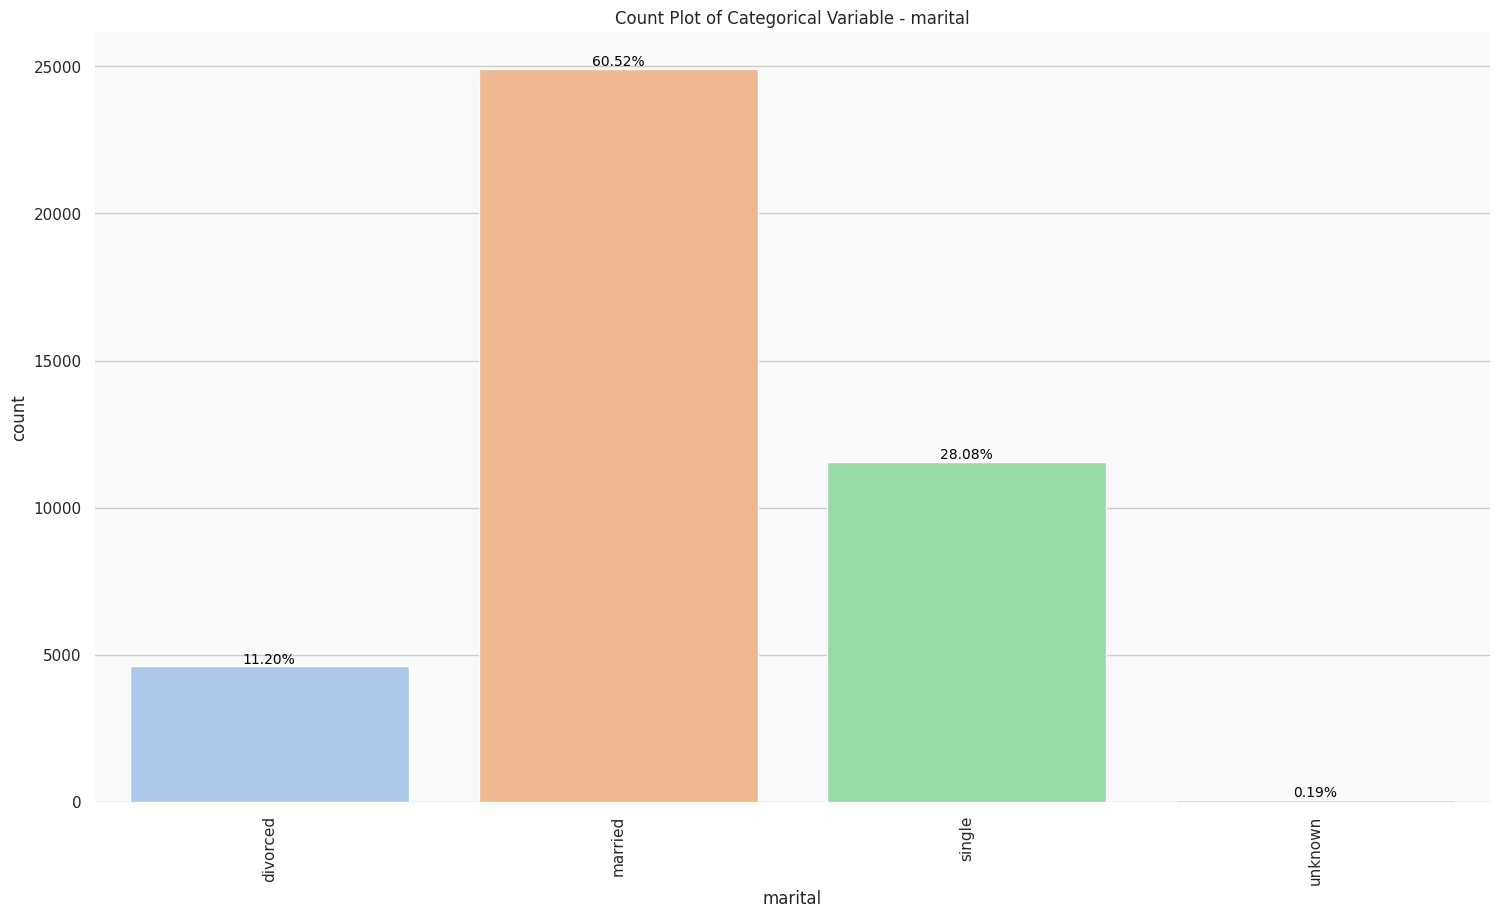

In [163]:
plot_categorical_vars_distribution(df2, 'marital')

In [164]:
plot_categorical_vars_distribution_plotly(df2, 'marital', '#E6ECF5')

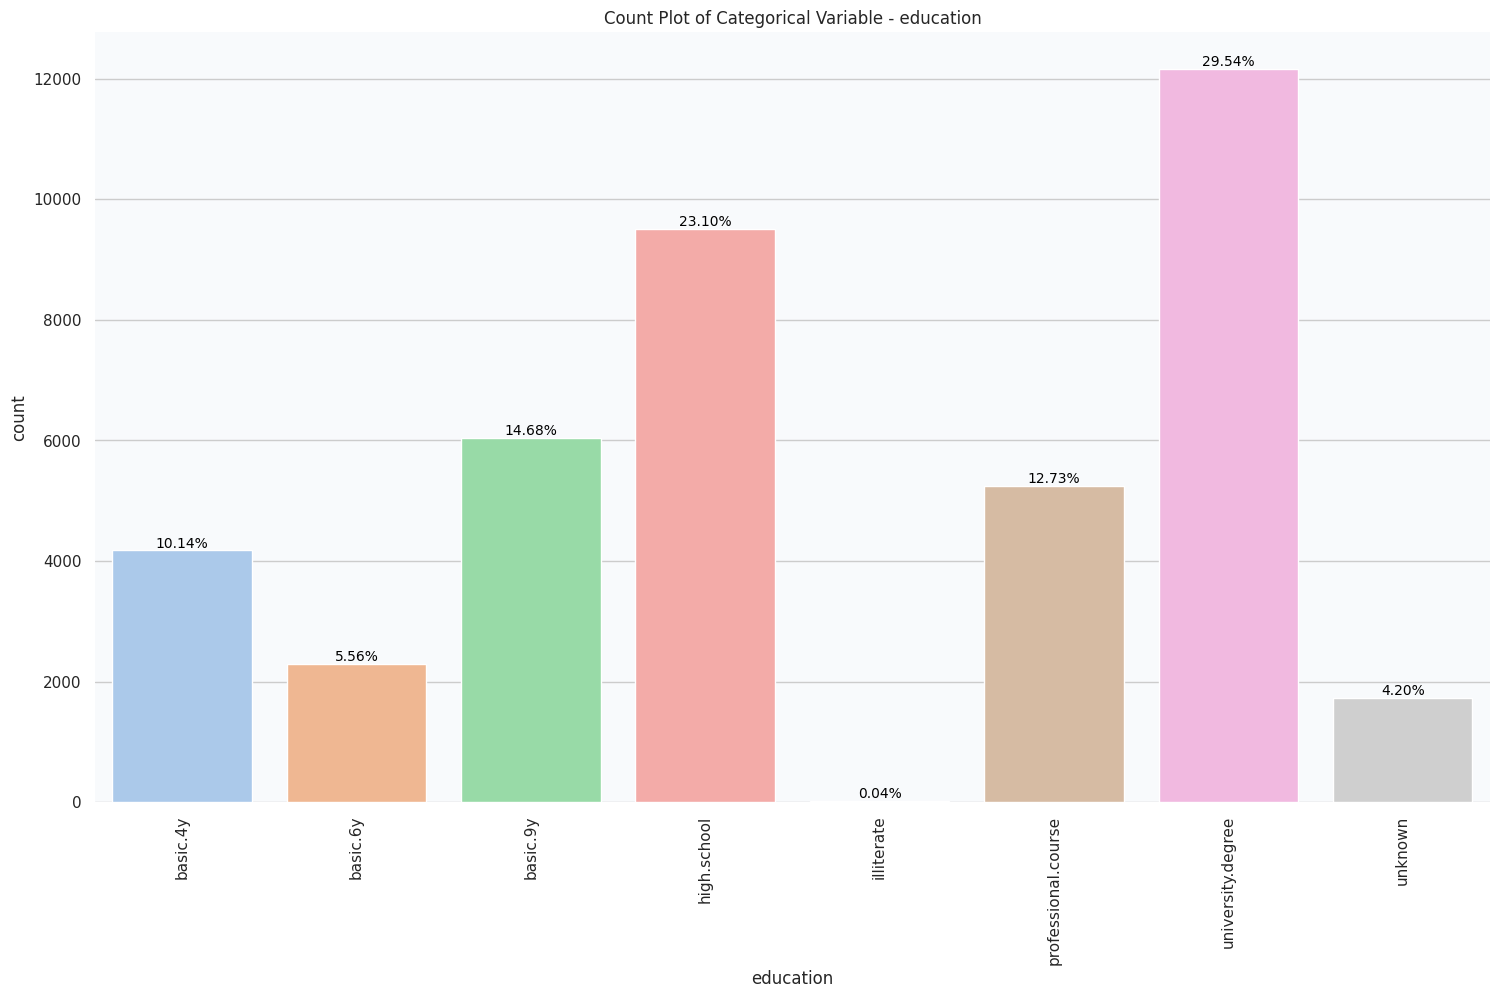

In [165]:
plot_categorical_vars_distribution(df2, 'education')


In [166]:
plot_categorical_vars_distribution_plotly(df2, 'education', '#E6ECF5')

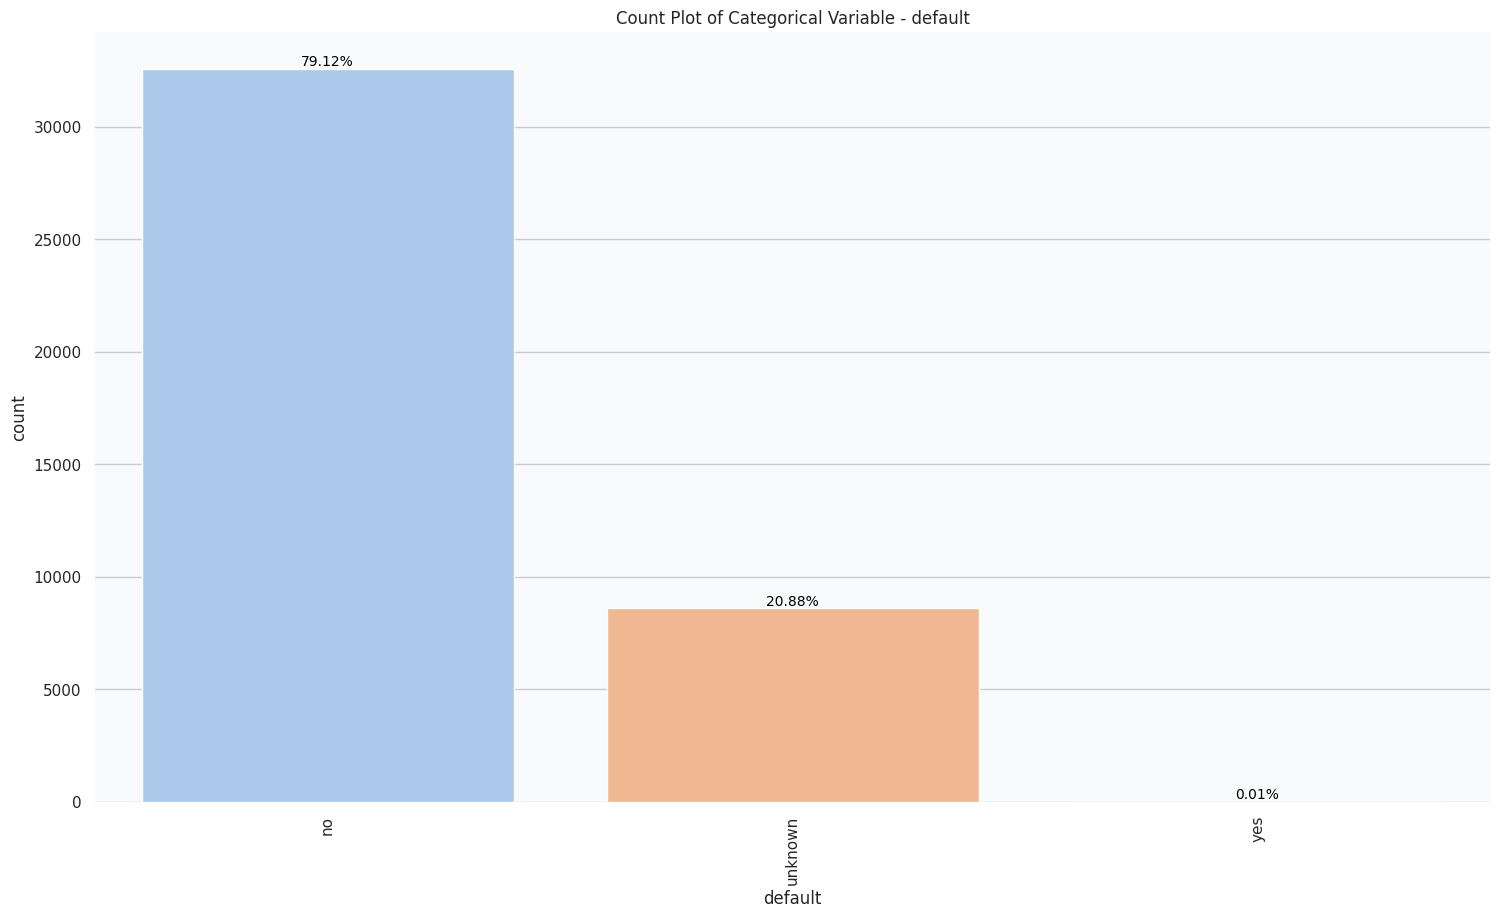

In [167]:
plot_categorical_vars_distribution(df2, 'default')

In [168]:
plot_categorical_vars_distribution_plotly(df2, 'default', '#E6ECF5')

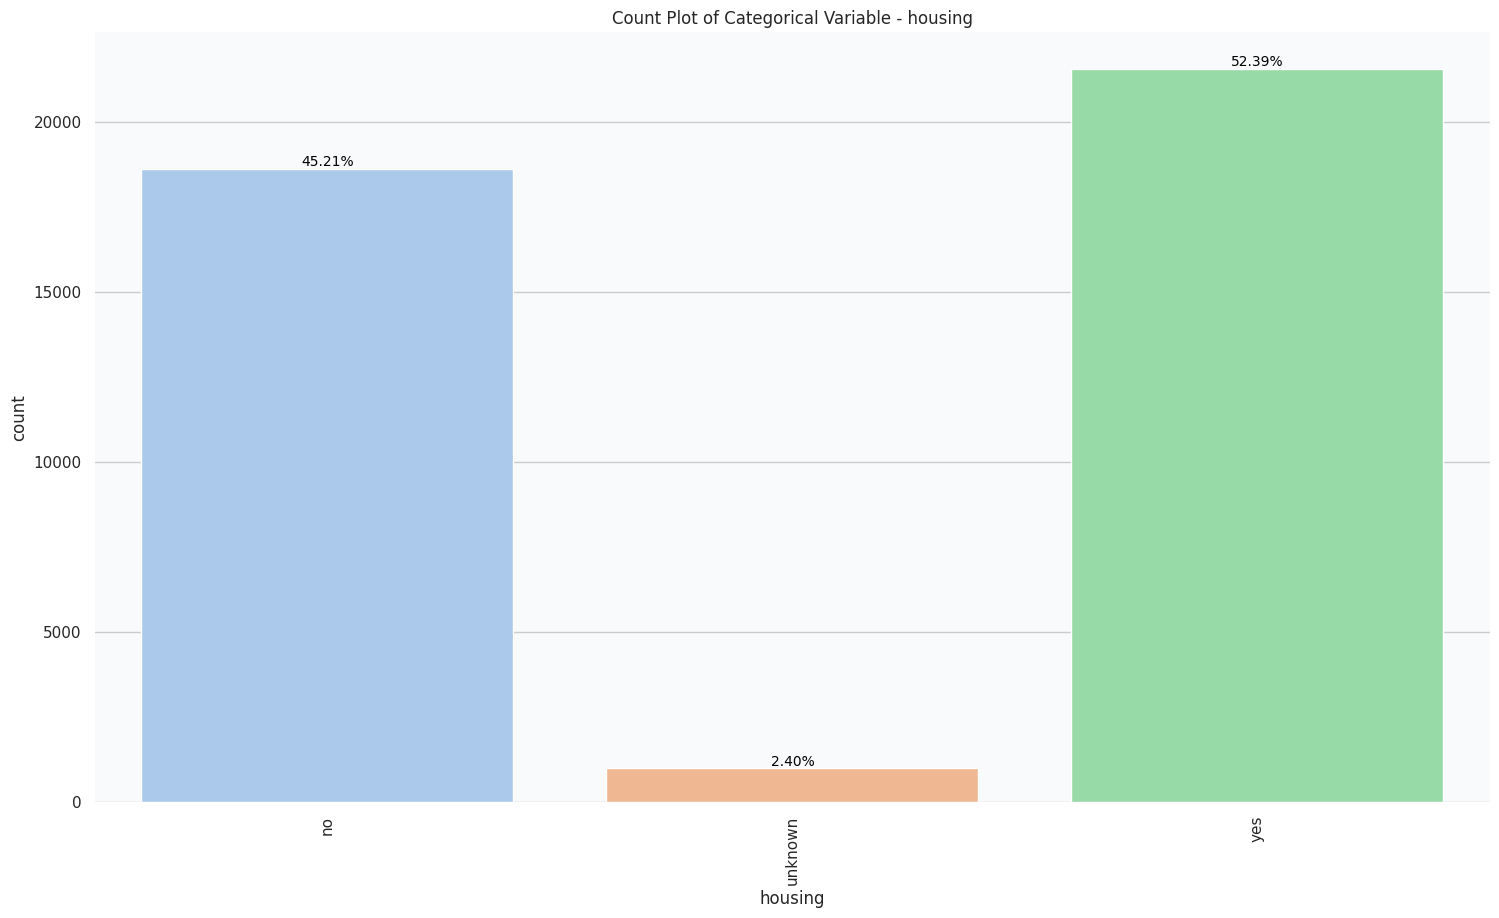

In [169]:
plot_categorical_vars_distribution(df2, 'housing')

In [170]:
plot_categorical_vars_distribution_plotly(df2, 'housing', '#E6ECF5')

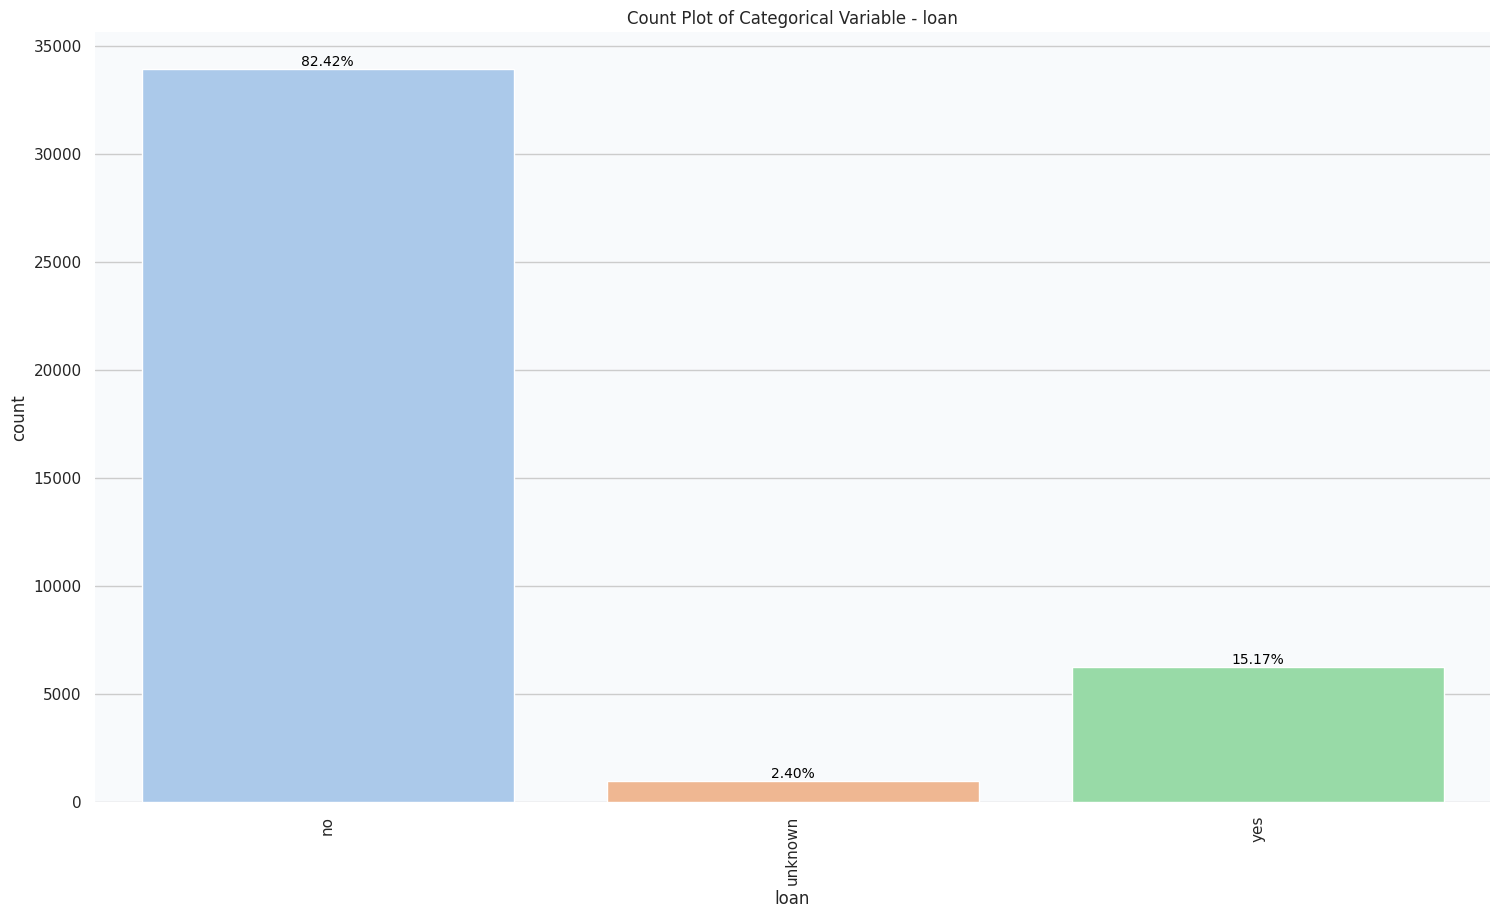

In [171]:
plot_categorical_vars_distribution(df2, 'loan')

In [172]:
plot_categorical_vars_distribution_plotly(df2, 'loan', '#E6ECF5')

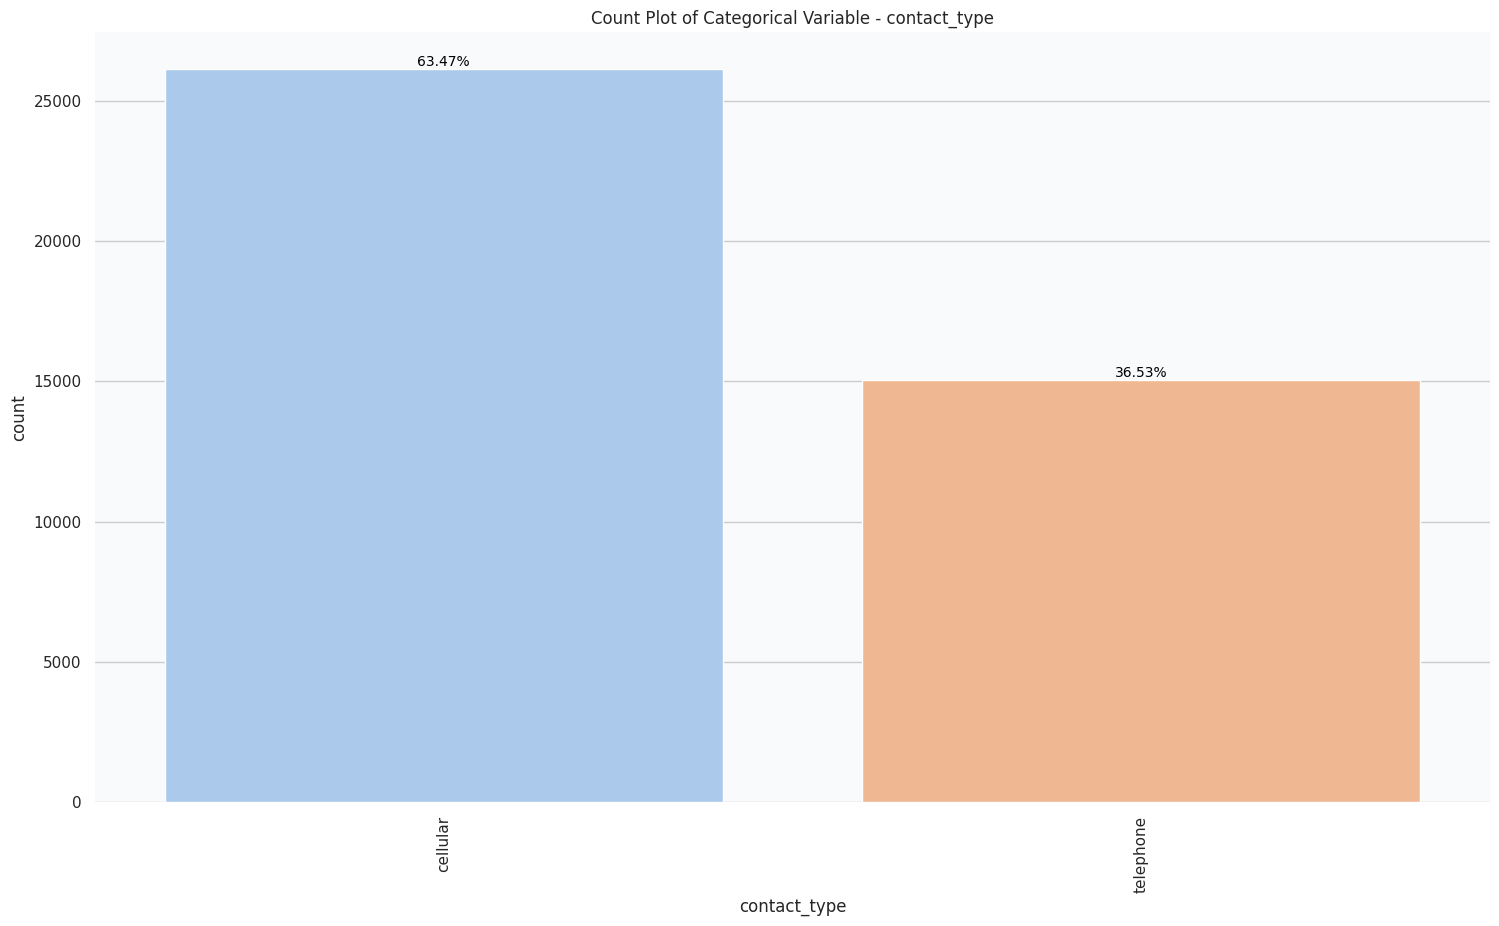

In [173]:
plot_categorical_vars_distribution(df2, 'contact_type')

In [174]:
plot_categorical_vars_distribution_plotly(df2, 'contact_type', '#E6ECF5')

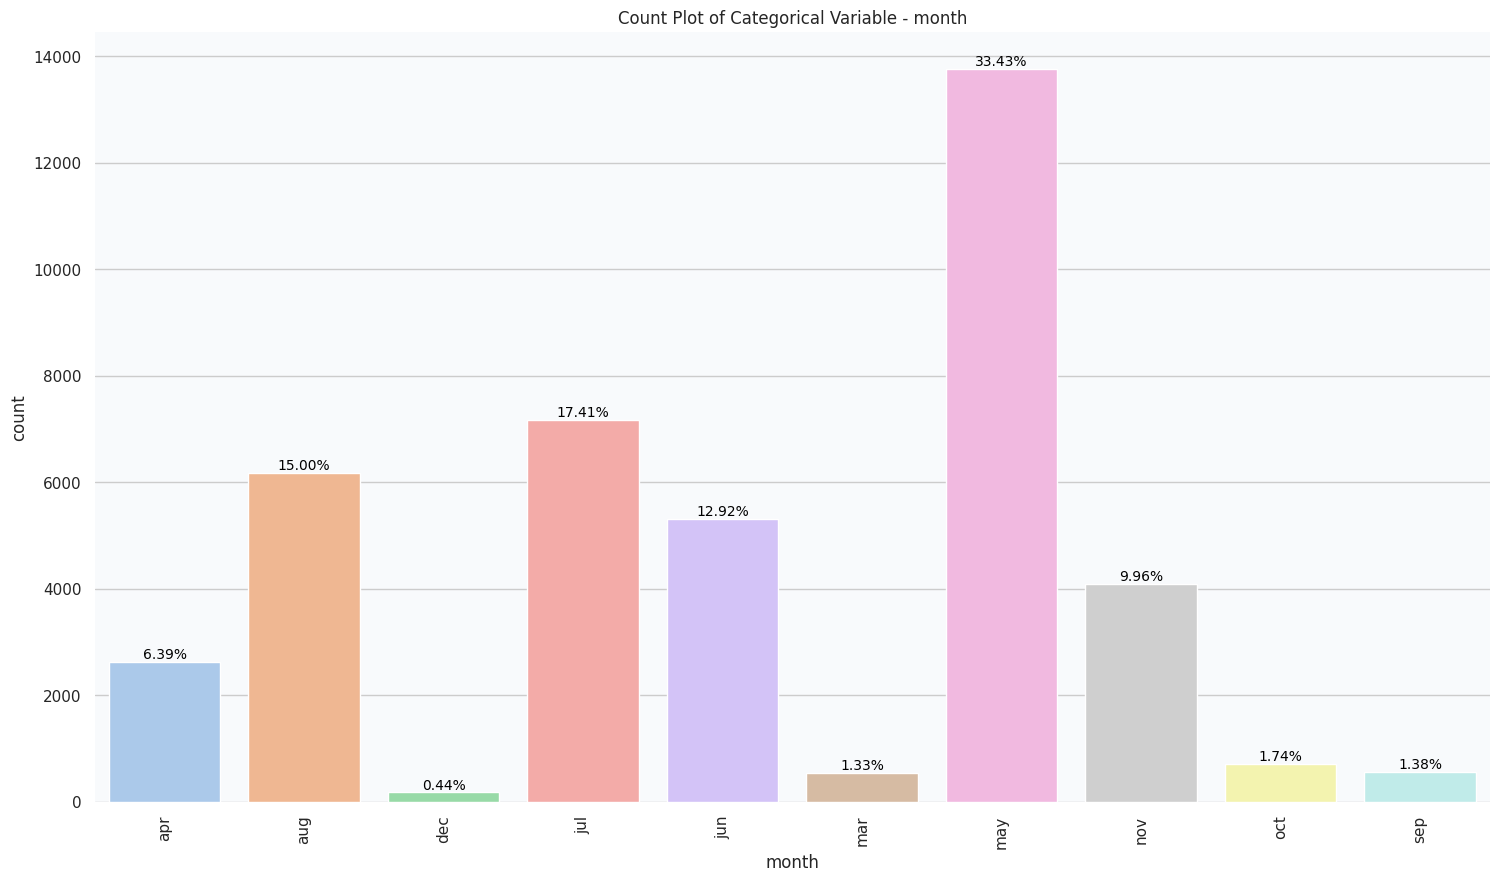

In [175]:
plot_categorical_vars_distribution(df2, 'month')

In [176]:
plot_categorical_vars_distribution_plotly(df2, 'month', '#E6ECF5')

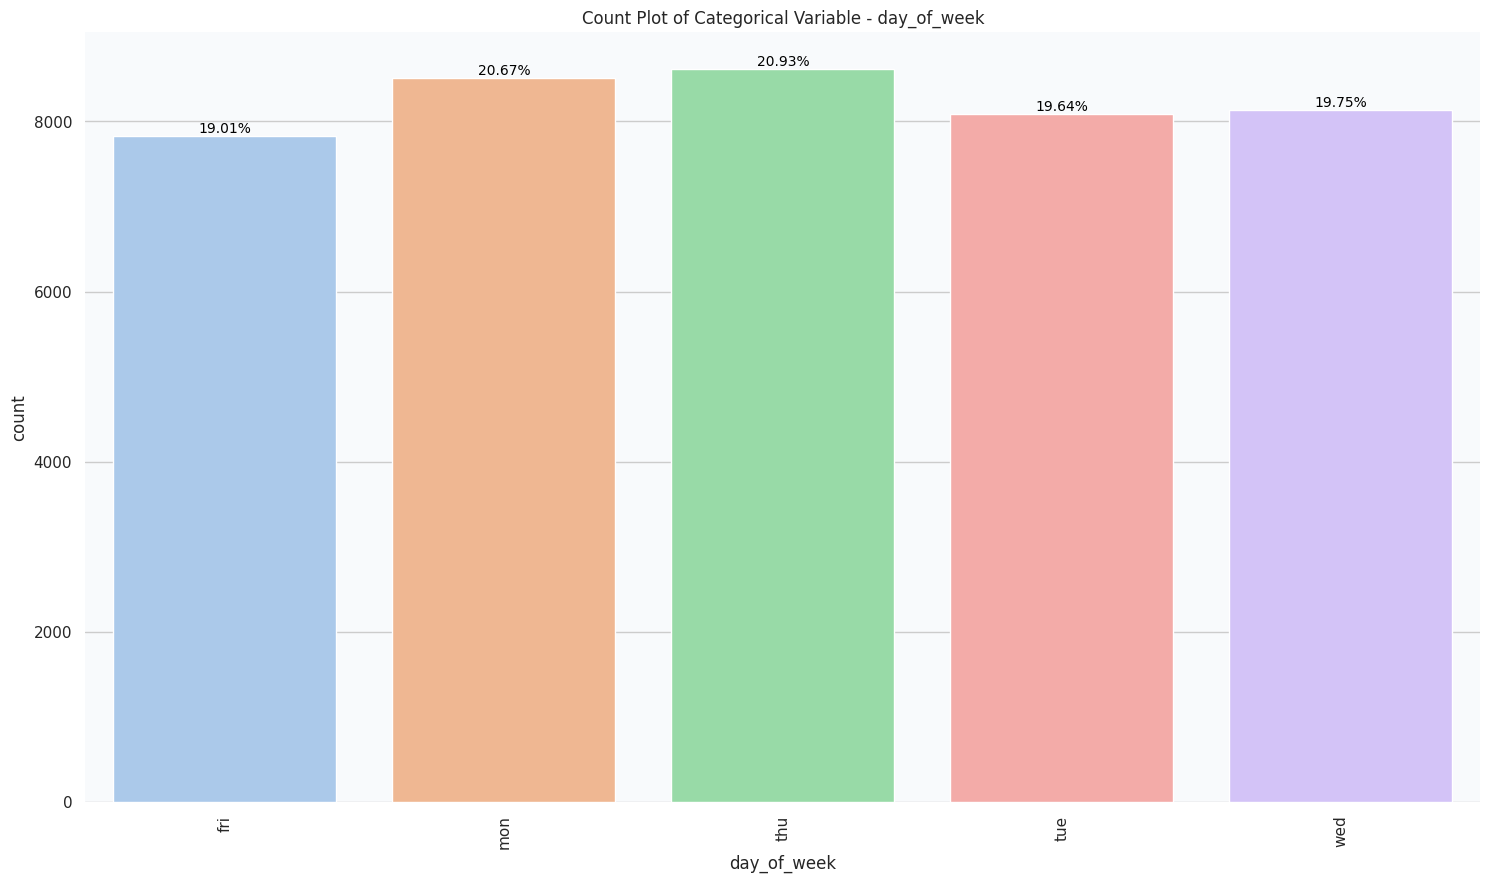

In [177]:
plot_categorical_vars_distribution(df2, 'day_of_week')


In [178]:
plot_categorical_vars_distribution_plotly(df2, 'day_of_week', '#E6ECF5')

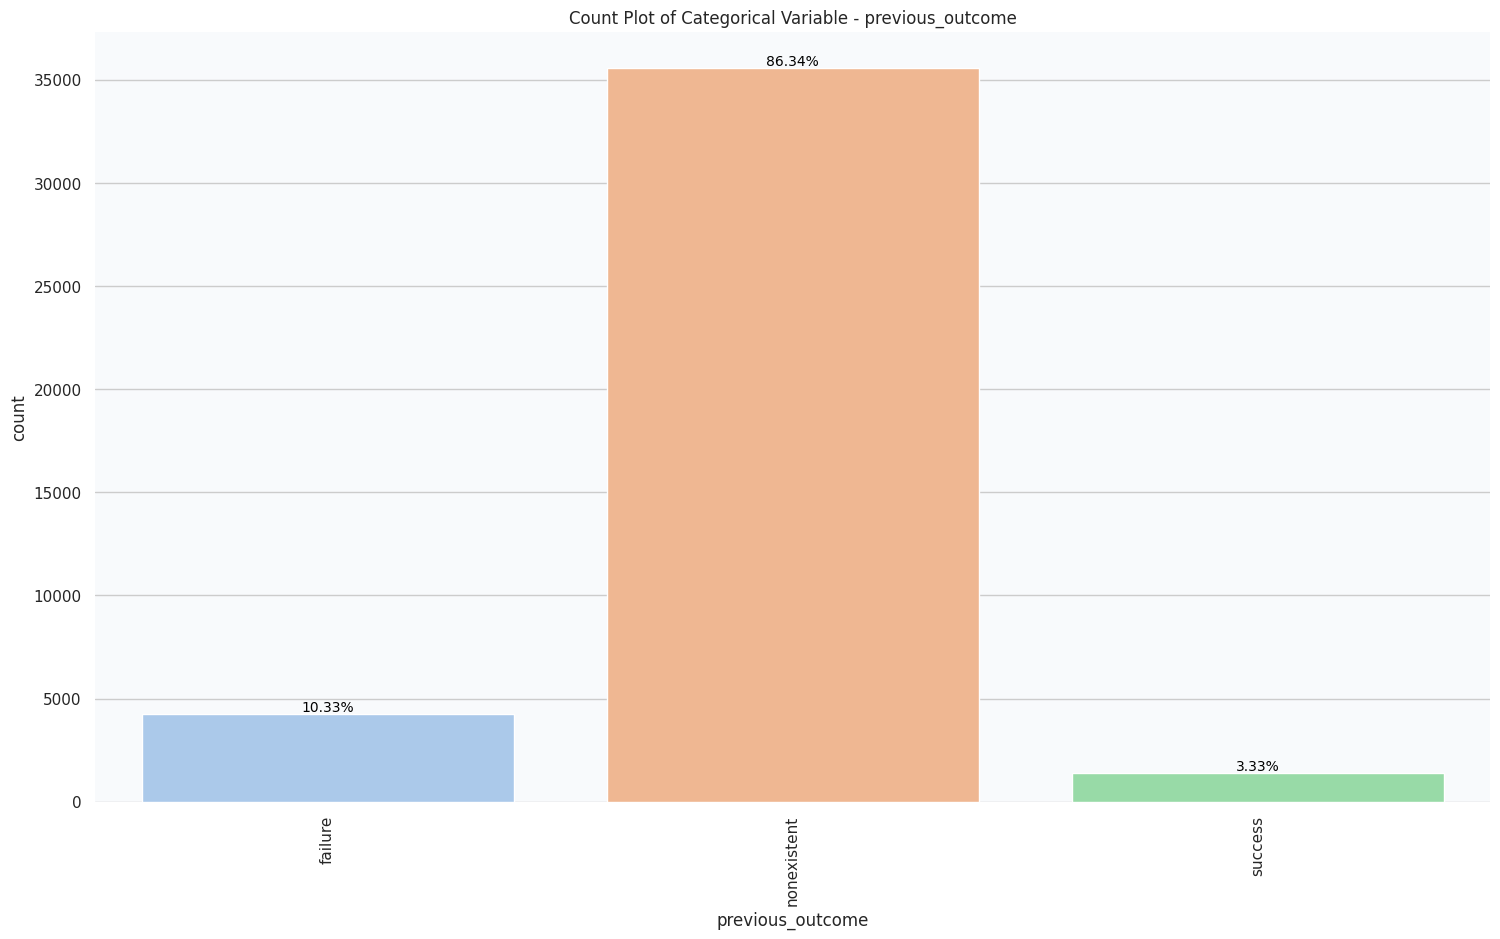

In [179]:
plot_categorical_vars_distribution(df2, 'previous_outcome')

In [180]:
plot_categorical_vars_distribution_plotly(df2, 'previous_outcome', '#E6ECF5')

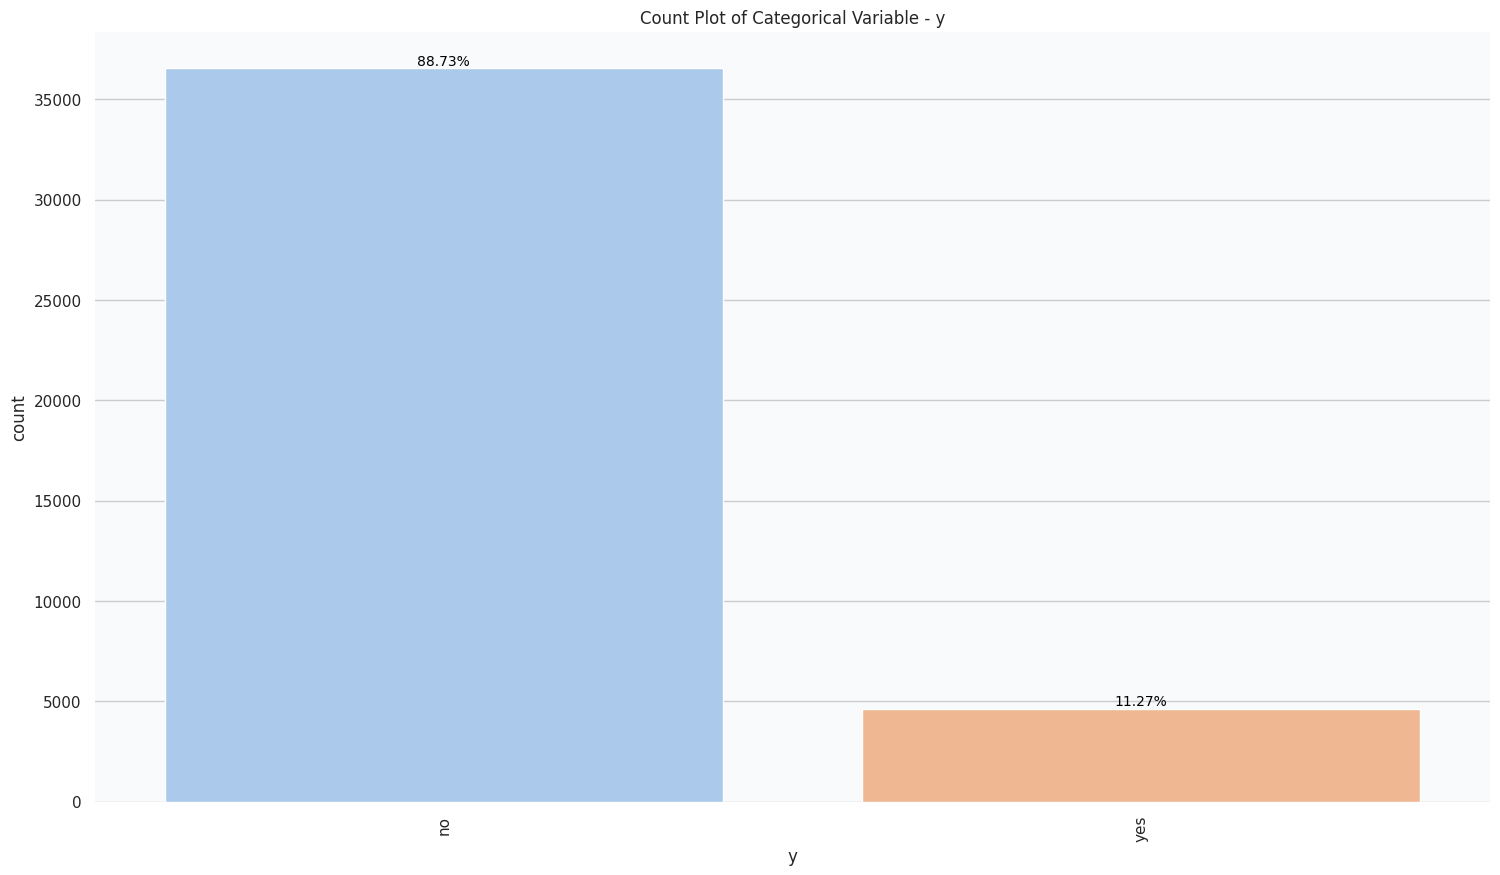

In [181]:
# Distribution of the Target
plot_categorical_vars_distribution(df2, 'y')

In [182]:
# Distribution of the Target
plot_categorical_vars_distribution_plotly(df2, 'y', '#E6ECF5')

In [183]:
print('=' * 60)
print('=' * 20, 'Summary statistics', '=' * 20)
print('=' * 60)

# Summary statistics
summary_stats = numeric_features.describe()

# Mean
mean_values = numeric_features.mean()

# Median
median_values = numeric_features.median()

# Standard Deviation
std_dev_values = numeric_features.std()

# Correlation matrix
correlation_matrix = numeric_features.corr()

# Display the results using tabulate
print("\nSummary Statistics:")
print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))

print("\nMean Values:")
print(tabulate(mean_values.to_frame(), headers='keys', tablefmt='pretty'))

print("\nMedian Values:")
print(tabulate(median_values.to_frame(), headers='keys', tablefmt='pretty'))

print("\nStandard Deviation:")
print(tabulate(std_dev_values.to_frame(), headers='keys', tablefmt='pretty'))

print("\nCorrelation Matrix:")
print(tabulate(correlation_matrix, headers='keys', tablefmt='pretty'))

==================== Summary statistics ====================

Summary Statistics:
+-------+-------------------+-----------------------+--------------------+-------------+---------------------+---------------------------+----------------------+---------------------------+-------------------+---------------------+---------------------+
|       |        age        | last_contact_duration |      campaign      | passed_days |      previous       | employment_variation_rate | consumer_price_index | consumer_confidence_index |     euribor3m     | number_of_employees |  has_term_deposit   |
+-------+-------------------+-----------------------+--------------------+-------------+---------------------+---------------------------+----------------------+---------------------------+-------------------+---------------------+---------------------+
| count |      41176.0      |        41176.0        |      41176.0       |   41176.0   |       41176.0       |          41176.0          |       41176.0    

In [184]:
df2.describe().T

count         mean         std       min  \
age                        41176.0    39.659413    9.739905    17.000   
last_contact_duration      41176.0   233.001020  189.904579     0.000   
campaign                   41176.0     2.268239    1.700447     1.000   
passed_days                41176.0   999.000000    0.000000   999.000   
previous                   41176.0     0.110768    0.313849     0.000   
employment_variation_rate  41176.0     0.081922    1.570883    -3.400   
consumer_price_index       41176.0    93.575720    0.578839    92.201   
consumer_confidence_index  41176.0   -40.502863    4.627860   -50.800   
euribor3m                  41176.0     3.621293    1.734437     0.634   
number_of_employees        41176.0  5167.034870   72.251364  4963.600   
has_term_deposit           41176.0     0.112663    0.316184     0.000   

                                25%       50%       75%       max  
age                          32.000    38.000    47.000    71.000  
last_contact_duration       102.000   180.000   301.000  1036.000  
campaign                      1.000     2.000     3.000    10.000  
passed_days                 999.000   999.000   999.000   999.000  
previous                      0.000     0.000     0.000     1.000  
employment_variation_rate    -1.800     1.100     1.400     1.400  
consumer_price_index         93.075    93.749    93.994    94.767  
consumer_confidence_index   -42.700   -41.800   -36.400   -26.900  
euribor3m                     1.344     4.857     4.961     5.045  
number_of_employees        5099.100  5191.000  5228.100  5228.100  
has_term_deposit              0.000     0.000     0.000     1.000

In [185]:
df2.isnull().sum()

age                          0
job                          0
marital                      0
education                    0
default                      0
housing                      0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
last_contact_duration        0
campaign                     0
passed_days                  0
previous                     0
previous_outcome             0
employment_variation_rate    0
consumer_price_index         0
consumer_confidence_index    0
euribor3m                    0
number_of_employees          0
y                            0
has_term_deposit             0
dtype: int64

In [186]:
df2.shape

(41176, 22)

In [187]:
df2.dtypes

age                             int64
job                          category
marital                      category
education                    category
default                      category
housing                      category
loan                         category
contact_type                 category
month                        category
day_of_week                  category
last_contact_duration           int64
campaign                        int64
passed_days                     int64
previous                        int64
previous_outcome             category
employment_variation_rate     float64
consumer_price_index          float64
consumer_confidence_index     float64
euribor3m                     float64
number_of_employees           float64
y                            category
has_term_deposit                int64
dtype: object

### Convert Categorical features to Numeric features

In [188]:
# Create a copy of the dataset
df3 = df2.copy()

In [189]:
LE=LabelEncoder()

cat_var=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact_type', 'month', 'day_of_week', 'previous_outcome', 'y']

for i in cat_var:
    df3[i]=LE.fit_transform(df3[i])


In [190]:
# To see all the variables created globally across the notebook.
%whos


Variable                                    Type                Data/Info
-------------------------------------------------------------------------
DecisionTreeClassifier                      ABCMeta             <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
KNeighborsClassifier                        ABCMeta             <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LE                                          LabelEncoder        LabelEncoder()
LabelEncoder                                type                <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LogisticRegression                          type                <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier                      ABCMeta             <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SMOTE                                       ABCMeta             <class 'imblearn.over_sam<...>pling._smote.base.SMOTE'>
SVC                                         ABCMeta  

In [191]:
# Split the Data into Validation and Training Sets
X = df3.drop(['has_term_deposit', 'y'], axis=1)
y = df3['has_term_deposit']


In [192]:
sc = StandardScaler()
sc.fit_transform(X)


array([[ 1.67771497, -0.20147477, -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       [ 1.78038661,  0.9113627 , -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       [-0.27304634,  0.9113627 , -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       ...,
       [ 1.67771497,  0.35494396, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 0.44565519,  1.46778143, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858],
       [-0.17037469,  0.35494396, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858]])

In [193]:
# Handling the imbalanced data by Resampling
sm = SMOTE(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X, y)


In [194]:
# This code first splits the dataset into a training set (70%) and a temporary set (30%). Then, it splits the temporary set into testing and validation sets, resulting in the desired sizes for each set.
# The final splits:
# Training set size = 70%
# Testing set size = 15%
# Validation set size = 15%

# Dataset splitting into training and temporary set (combining testing and validation)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Now, split the temporary set into testing and validation
# testing
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# validation
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)



In [195]:
X_train.shape

(25575, 20)

In [196]:
X_test.shape

(10961, 20)

In [197]:
X_val.shape

(25576, 20)

In [198]:
y_train.shape

(25575,)

In [199]:
y_test.shape

(10961,)

In [200]:
y_val.shape

(25576,)

### Model Selection

  * Logistic regression.
  * SVM - Support Vector Machine.
  * KNN - K Nearest Neighbors.
  * Decision tree.
  * Random forest.


In [201]:
def calc_popularity(y_actual):
    return (sum(y_actual)/len(y_actual))

In [202]:
# Calculates specificity
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

In [203]:
# Evaluation of model performance
def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
    logloss = log_loss(y_actual, y_pred)


    tn, fp, fn, tp = confusion_matrix(y_actual, (y_pred > thresh)).ravel()

    print('AUC: %.3f' % auc)
    print('Accuracy: %.3f' % accuracy)
    print('Recall: %.3f' % recall)
    print('Precision: %.3f' % precision)
    print('Specificity: %.3f' % specificity)
    print('Popularity: %.3f' % calc_popularity(y_actual))
    print('F1: %.3f' % f1)
    print('Log Loss: %.3f' % logloss)


    print('-'*20)
    confusion_matrix_table = tabulate([['True Negative', tn], ['False Positive', fp], ['False Negative', fn], ['True Positive', tp]],
                                     headers=['Metric', 'Value'], tablefmt='grid')
    print('---------- Confusion Matrix ----------\n')
    print(confusion_matrix_table)

    print(' ')
    return auc, accuracy, recall, precision, specificity, f1, logloss

In [204]:
# Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive.

thresh = 0.5

### Logistic Regression

In [205]:
# Logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [206]:
lr.random_state


42

In [207]:
# Training Set Estimation
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_train

array([1, 0, 1, ..., 1, 0, 1])

In [208]:
# Validation Set Estimation
y_pred_lr_val = lr.predict(X_val)
y_pred_lr_val

array([0, 0, 0, ..., 0, 0, 1])

In [209]:
# Training Probabilities
y_pred_lr_train_Proba = lr.predict_proba(X_train)
y_pred_lr_train_Proba

array([[0.12636052, 0.87363948],
       [0.8027752 , 0.1972248 ],
       [0.11251673, 0.88748327],
       ...,
       [0.09440641, 0.90559359],
       [0.88482193, 0.11517807],
       [0.07610549, 0.92389451]])

In [210]:
# Validation Probabilities
y_pred_lr_val_Proba = lr.predict_proba(X_val)
y_pred_lr_val_Proba

array([[0.65865548, 0.34134452],
       [0.95015589, 0.04984411],
       [0.79305166, 0.20694834],
       ...,
       [0.88893341, 0.11106659],
       [0.92463471, 0.07536529],
       [0.26057235, 0.73942765]])

In [211]:
# Training Classification Report
print("================== Logistic Regression Training Classification Report ==================\n")
print(classification_report(y_train, y_pred_lr_train))


================== Logistic Regression Training Classification Report ==================

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     12799
           1       0.82      0.84      0.83     12776

    accuracy                           0.83     25575
   macro avg       0.83      0.83      0.83     25575
weighted avg       0.83      0.83      0.83     25575



In [212]:
# Evaluate the model on the training set
print('=' * 47)
print('======== Logistic Regression Training ========')
print('=' * 47)

thresh = 0.5

lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity, lr_train_f1, lr_train_log_loss = print_report(y_train, y_pred_lr_train, thresh)


======== Logistic Regression Training ========
AUC: 0.827
Accuracy: 0.827
Recall: 0.841
Precision: 0.818
Specificity: 0.813
Popularity: 0.500
F1: 0.829
Log Loss: 6.238
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   10408 |
+----------------+---------+
| False Positive |    2391 |
+----------------+---------+
| False Negative |    2035 |
+----------------+---------+
| True Positive  |   10741 |
+----------------+---------+
 


In [213]:
# Validation Classification Report
print("================== Logistic Regression Validation Classification Report ==================\n")
print(classification_report(y_val, y_pred_lr_val))


================== Logistic Regression Validation Classification Report ==================

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     12709
           1       0.81      0.84      0.82     12867

    accuracy                           0.82     25576
   macro avg       0.82      0.82      0.82     25576
weighted avg       0.82      0.82      0.82     25576



In [214]:
# Evaluate the model on the validation set
print('=' * 48)
print('======== Logistic Regression Validation ========')
print('=' * 48)

thresh = 0.5

lr_val_auc, lr_val_accuracy, lr_val_recall, lr_val_precision, lr_val_specificity, lr_val_f1, lr_val_log_loss = print_report(y_val, y_pred_lr_val, thresh)


======== Logistic Regression Validation ========
AUC: 0.819
Accuracy: 0.819
Recall: 0.835
Precision: 0.812
Specificity: 0.804
Popularity: 0.503
F1: 0.823
Log Loss: 6.507
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   10214 |
+----------------+---------+
| False Positive |    2495 |
+----------------+---------+
| False Negative |    2122 |
+----------------+---------+
| True Positive  |   10745 |
+----------------+---------+
 


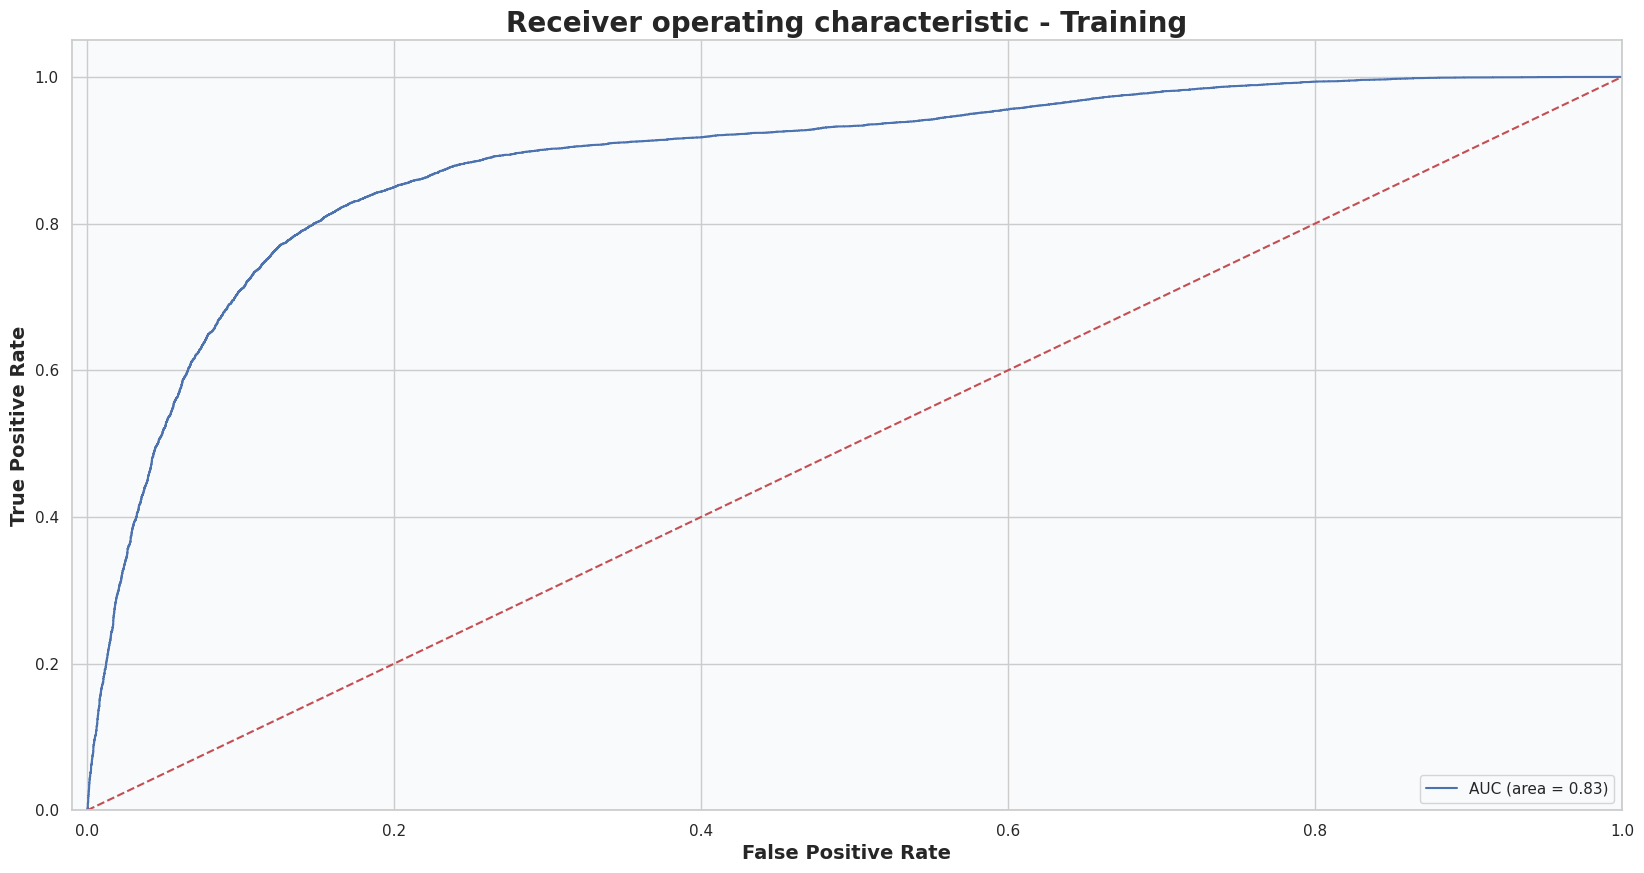

In [215]:
# AUC-ROC curve Training Set
logit_roc_auc = roc_auc_score(y_train, y_pred_lr_train)
fpr, tpr, thresholds = roc_curve(y_train, lr.predict_proba(X_train)[:, 1])

plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver operating characteristic - Training', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

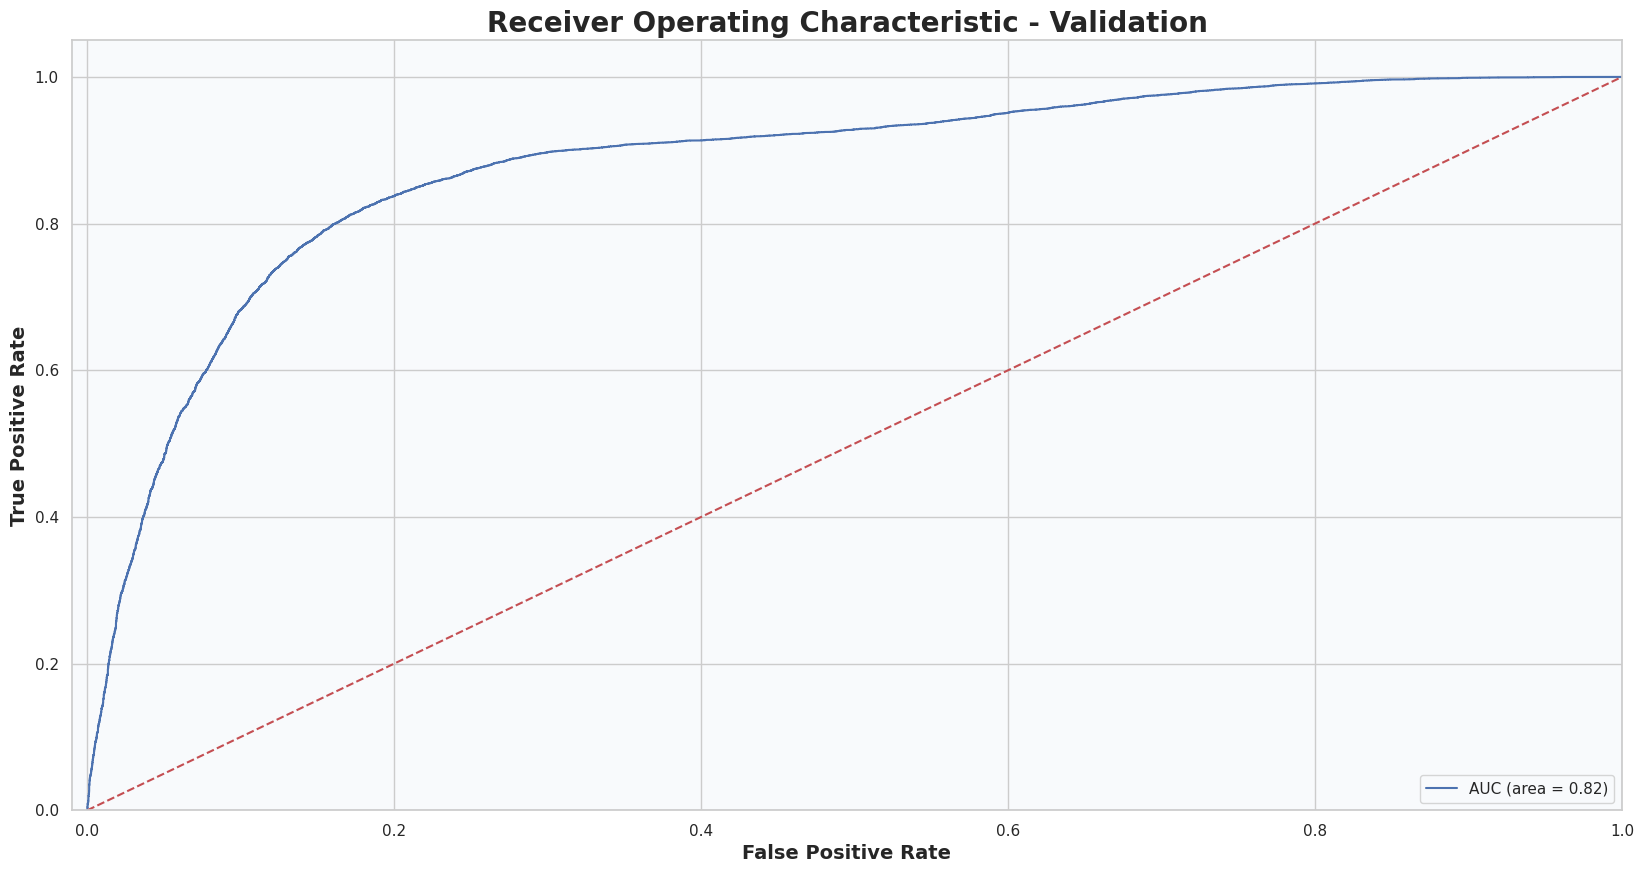

In [216]:
# AUC-ROC curve Validation Set
logit_roc_auc = roc_auc_score(y_val, y_pred_lr_val)
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:, 1])

plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic - Validation', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()


### SVM (Support Vector Machine)

In [217]:
# Support Vector Machine
svm_model = SVC(kernel = "linear", probability=True, random_state = 42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [218]:
svm_model.intercept_

array([-2965.08610323])

In [219]:
svm_model.coef_

array([[-2.90852490e+00, -3.66494701e+00, -7.59875202e+01,
        -3.18322068e+00, -1.95721343e+02, -4.37321590e+01,
        -6.07314965e+01, -3.12575727e+02, -2.43024400e+01,
        -4.14503427e+01,  1.26761130e+00, -3.43453614e+01,
        -8.73114914e-11, -1.21637710e+02,  2.20145365e+01,
        -2.55373577e+02,  1.89129573e+02,  1.12511043e+01,
         9.73039911e+01, -2.87959385e+00]])

In [220]:
svm_model.class_weight_

array([1., 1.])

In [221]:
svm_model.feature_names_in_

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact_type', 'month', 'day_of_week', 'last_contact_duration',
       'campaign', 'passed_days', 'previous', 'previous_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor3m', 'number_of_employees'],
      dtype=object)

In [222]:
svm_model.n_features_in_

20

In [223]:
# Training Set Estimation
y_pred_svm_train = svm_model.predict(X_train)
y_pred_svm_train

array([0, 0, 1, ..., 1, 0, 1])

In [224]:
# Validation Set Estimation
y_pred_svm_val = svm_model.predict(X_val)
y_pred_svm_val

array([0, 0, 0, ..., 0, 0, 1])

In [225]:
# Training Probabilities
y_pred_svm_train_Proba = svm_model.predict_proba(X_train)
y_pred_svm_train_Proba

array([[0.48094917, 0.51905083],
       [0.87955604, 0.12044396],
       [0.25124998, 0.74875002],
       ...,
       [0.1827188 , 0.8172812 ],
       [0.98550618, 0.01449382],
       [0.30335209, 0.69664791]])

In [226]:
# Validation Probabilities
y_pred_svm_val_Proba = svm_model.predict_proba(X_val)
y_pred_svm_val_Proba

array([[0.72818689, 0.27181311],
       [0.99557158, 0.00442842],
       [0.96934995, 0.03065005],
       ...,
       [0.85985188, 0.14014812],
       [0.99004272, 0.00995728],
       [0.17441244, 0.82558756]])

In [227]:
# Training Classification Report
print("================== SVM Training Classification Report ==================\n")
print(classification_report(y_train, y_pred_svm_train))

================== SVM Training Classification Report ==================

              precision    recall  f1-score   support

           0       0.73      0.93      0.82     12799
           1       0.90      0.65      0.75     12776

    accuracy                           0.79     25575
   macro avg       0.81      0.79      0.78     25575
weighted avg       0.81      0.79      0.78     25575



In [228]:
# Evaluate the model on the training set
print('=' * 47)
print('======== SVM Training ========')
print('=' * 47)

thresh = 0.5

svm_train_auc, svm_train_accuracy, svm_train_recall, svm_train_precision, svm_train_specificity, svm_train_f1, svm_train_log_loss = print_report(y_train, y_pred_svm_train, thresh)

======== SVM Training ========
AUC: 0.789
Accuracy: 0.789
Recall: 0.649
Precision: 0.901
Specificity: 0.929
Popularity: 0.500
F1: 0.755
Log Loss: 7.602
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   11889 |
+----------------+---------+
| False Positive |     910 |
+----------------+---------+
| False Negative |    4484 |
+----------------+---------+
| True Positive  |    8292 |
+----------------+---------+
 


In [229]:
# Validation Classification Report
print("================== SVM Validation Classification Report ==================\n")
print(classification_report(y_val, y_pred_svm_val))

================== SVM Validation Classification Report ==================

              precision    recall  f1-score   support

           0       0.72      0.92      0.81     12709
           1       0.90      0.64      0.75     12867

    accuracy                           0.78     25576
   macro avg       0.81      0.78      0.78     25576
weighted avg       0.81      0.78      0.78     25576



In [230]:
# Evaluate the model on the validation set
print('=' * 48)
print('======== SVM Validation ========')
print('=' * 48)

thresh = 0.5

svm_val_auc, svm_val_accuracy, svm_val_recall, svm_val_precision, svm_val_specificity, svm_val_f1, svm_val_log_loss = print_report(y_val, y_pred_svm_val, thresh)

======== SVM Validation ========
AUC: 0.783
Accuracy: 0.782
Recall: 0.641
Precision: 0.896
Specificity: 0.925
Popularity: 0.503
F1: 0.747
Log Loss: 7.864
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   11750 |
+----------------+---------+
| False Positive |     959 |
+----------------+---------+
| False Negative |    4621 |
+----------------+---------+
| True Positive  |    8246 |
+----------------+---------+
 


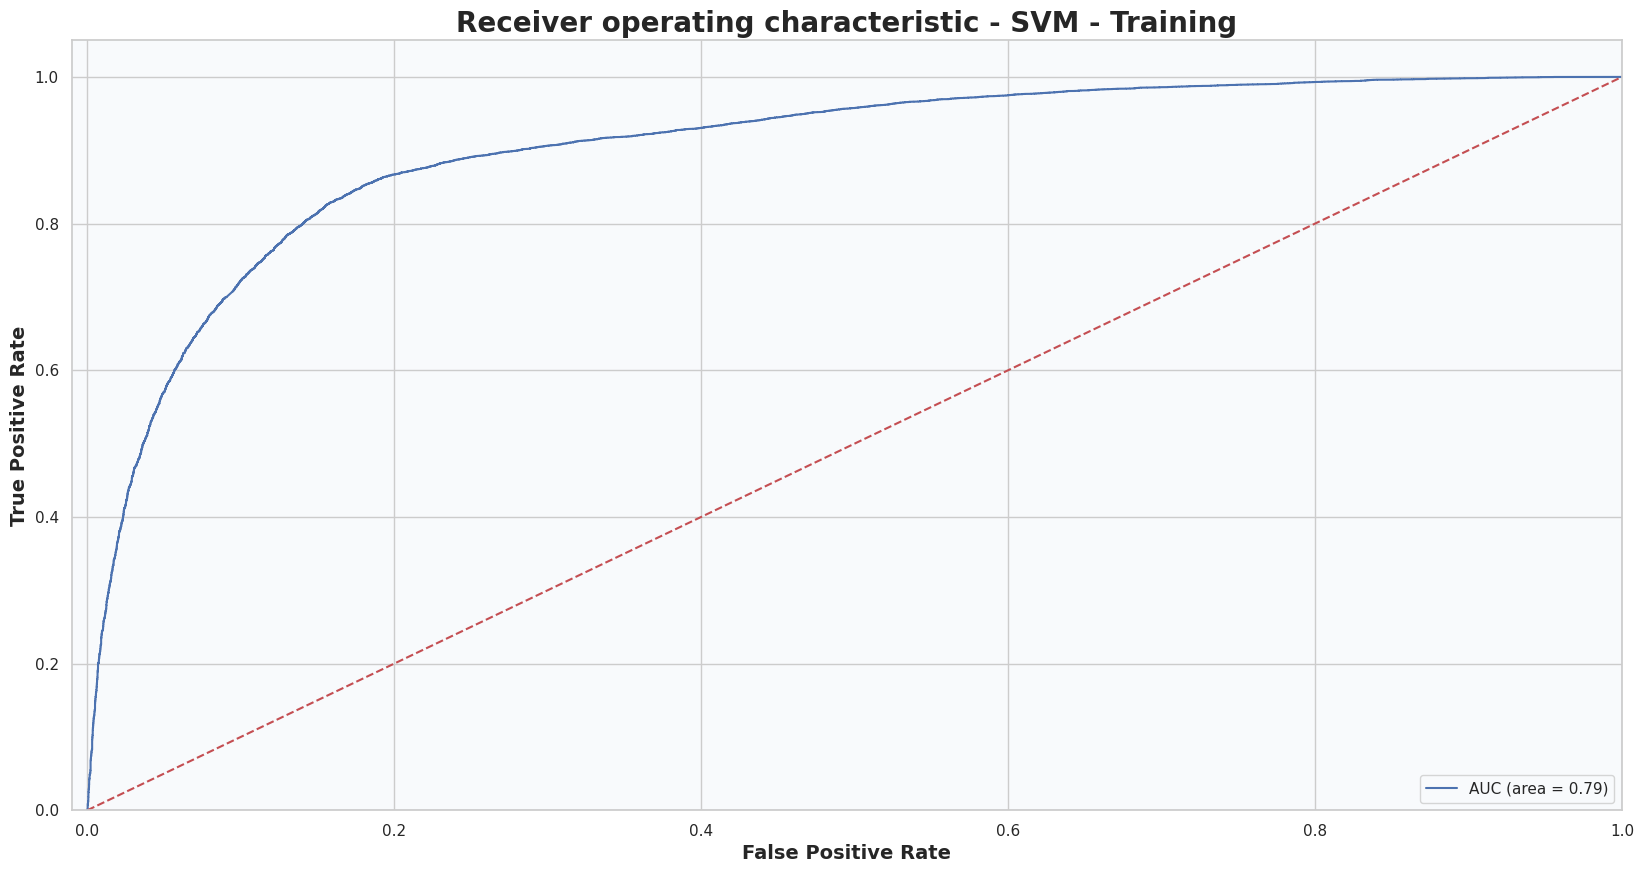

In [231]:
# AUC-ROC curve Training Set
logit_roc_auc = roc_auc_score(y_train, y_pred_svm_train)
fpr, tpr, thresholds = roc_curve(y_train, svm_model.predict_proba(X_train)[:, 1])

plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver operating characteristic - SVM - Training', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

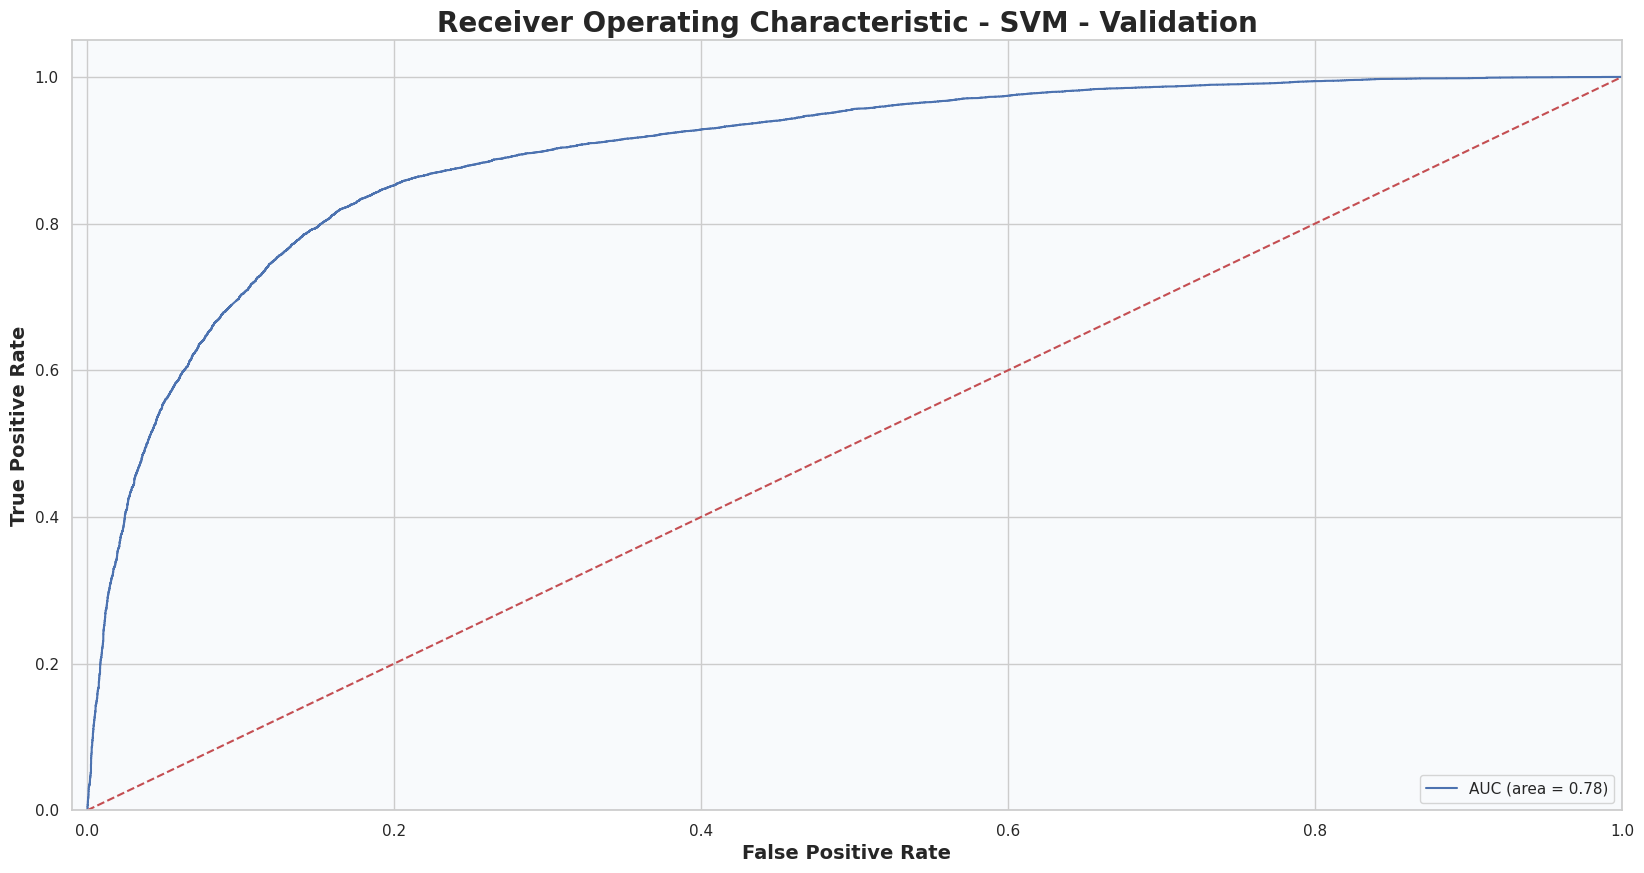

In [232]:
# AUC-ROC curve Validation Set
logit_roc_auc = roc_auc_score(y_val, y_pred_svm_val)
fpr, tpr, thresholds = roc_curve(y_val, svm_model.predict_proba(X_val)[:, 1])

plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic - SVM - Validation', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

### KNN (K Nearest Neighbors)

In [233]:
# KNN - K Nearest Neighbors.
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [234]:
# Number of features that the estimator expects for subsequent calls to predict or transform.
knn_model.n_features_in_

20

In [235]:
knn_model.metric

'minkowski'

In [236]:
knn_model.n_samples_fit_

25575

In [237]:
knn_model.weights

'uniform'

In [238]:
# Training Set Estimation
y_pred_knn_train = knn_model.predict(X_train)
y_pred_knn_train

array([1, 0, 1, ..., 1, 0, 1])

In [239]:
# Validation Set Estimation
y_pred_knn_val = knn_model.predict(X_val)
y_pred_knn_val

array([1, 0, 0, ..., 0, 0, 1])

In [240]:
# Training Probabilities
y_pred_knn_train_Proba = knn_model.predict_proba(X_train)
y_pred_knn_train_Proba

array([[0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       ...,
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ]])

In [241]:
# Validation Probabilities
y_pred_knn_val_Proba = knn_model.predict_proba(X_val)
y_pred_knn_val_Proba

array([[0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ]])

In [242]:
# Training Classification Report
print("================== KNN Training Classification Report ==================\n")
print(classification_report(y_train, y_pred_knn_train))

================== KNN Training Classification Report ==================

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     12799
           1       0.87      0.99      0.93     12776

    accuracy                           0.92     25575
   macro avg       0.93      0.92      0.92     25575
weighted avg       0.93      0.92      0.92     25575



In [243]:
# Evaluate the model on the training set
print('=' * 47)
print('======== KNN Training ========')
print('=' * 47)

thresh = 0.5

knn_train_auc, knn_train_accuracy, knn_train_recall, knn_train_precision, knn_train_specificity, knn_train_f1, knn_train_log_loss = print_report(y_train, y_pred_knn_train, thresh)

======== KNN Training ========
AUC: 0.922
Accuracy: 0.922
Recall: 0.986
Precision: 0.874
Specificity: 0.858
Popularity: 0.500
F1: 0.927
Log Loss: 2.798
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   10987 |
+----------------+---------+
| False Positive |    1812 |
+----------------+---------+
| False Negative |     173 |
+----------------+---------+
| True Positive  |   12603 |
+----------------+---------+
 


In [244]:
# Validation Classification Report
print("================== KNN Validation Classification Report ==================\n")
print(classification_report(y_val, y_pred_knn_val))

================== KNN Validation Classification Report ==================

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     12709
           1       0.84      0.97      0.90     12867

    accuracy                           0.89     25576
   macro avg       0.90      0.89      0.89     25576
weighted avg       0.90      0.89      0.89     25576



In [245]:
# Evaluate the model on the validation set
print('=' * 48)
print('======== KNN Validation ========')
print('=' * 48)

thresh = 0.5

knn_val_auc, knn_val_accuracy, knn_val_recall, knn_val_precision, knn_val_specificity, knn_val_f1, knn_val_log_loss = print_report(y_val, y_pred_knn_val, thresh)

======== KNN Validation ========
AUC: 0.889
Accuracy: 0.890
Recall: 0.968
Precision: 0.838
Specificity: 0.811
Popularity: 0.503
F1: 0.898
Log Loss: 3.980
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   10302 |
+----------------+---------+
| False Positive |    2407 |
+----------------+---------+
| False Negative |     417 |
+----------------+---------+
| True Positive  |   12450 |
+----------------+---------+
 


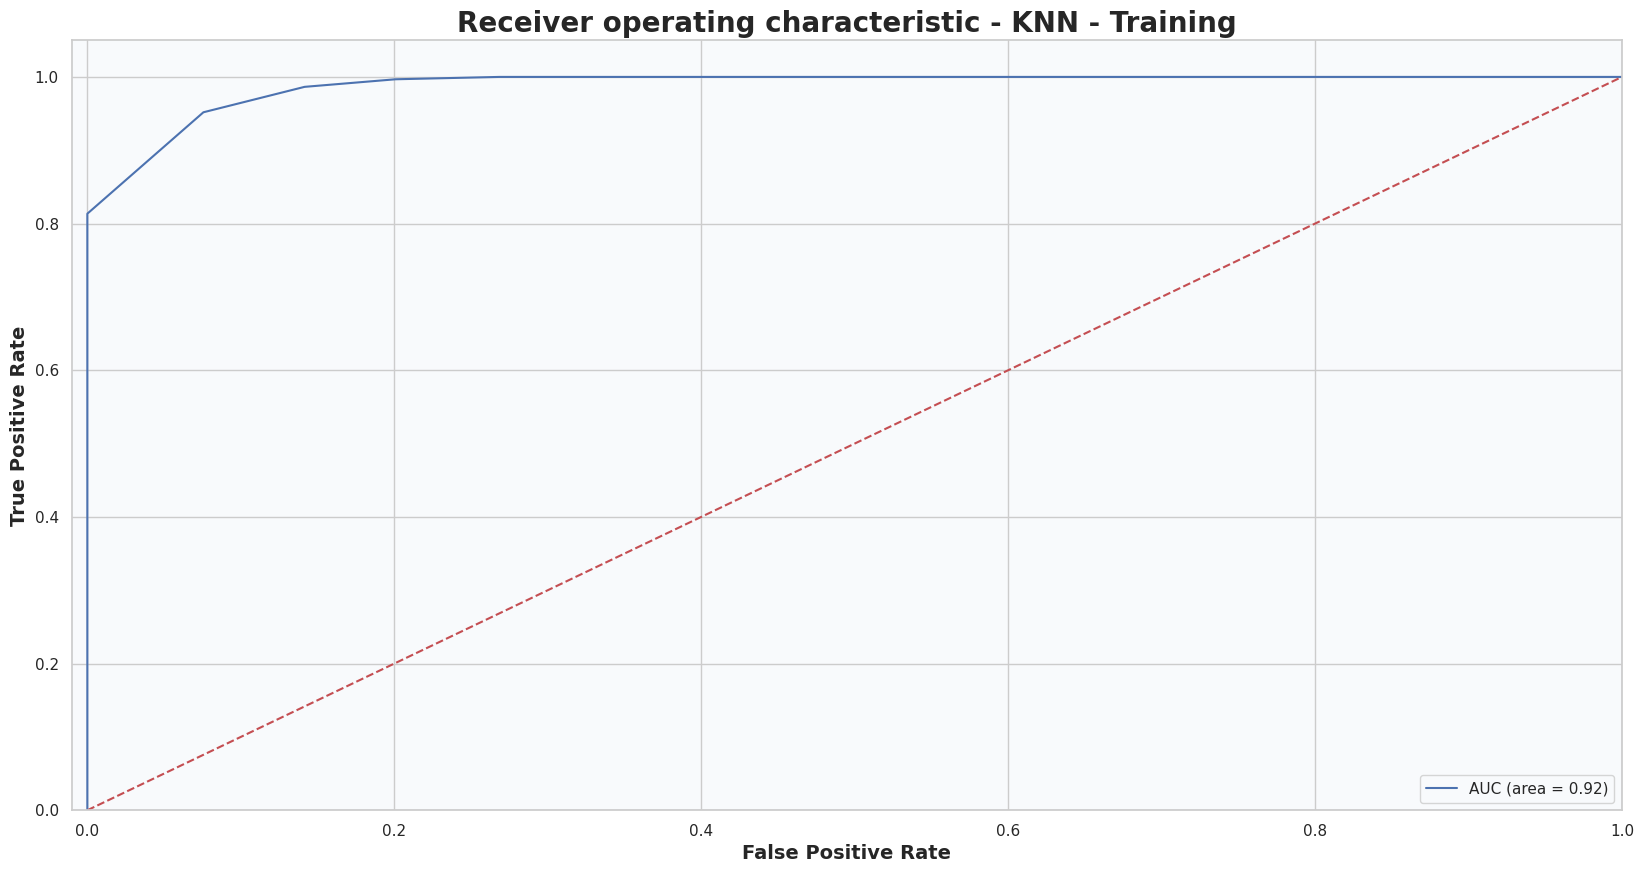

In [246]:
# AUC-ROC curve Training Set
logit_roc_auc = roc_auc_score(y_train, y_pred_knn_train)
fpr, tpr, thresholds = roc_curve(y_train, knn_model.predict_proba(X_train)[:, 1])

plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver operating characteristic - KNN - Training', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

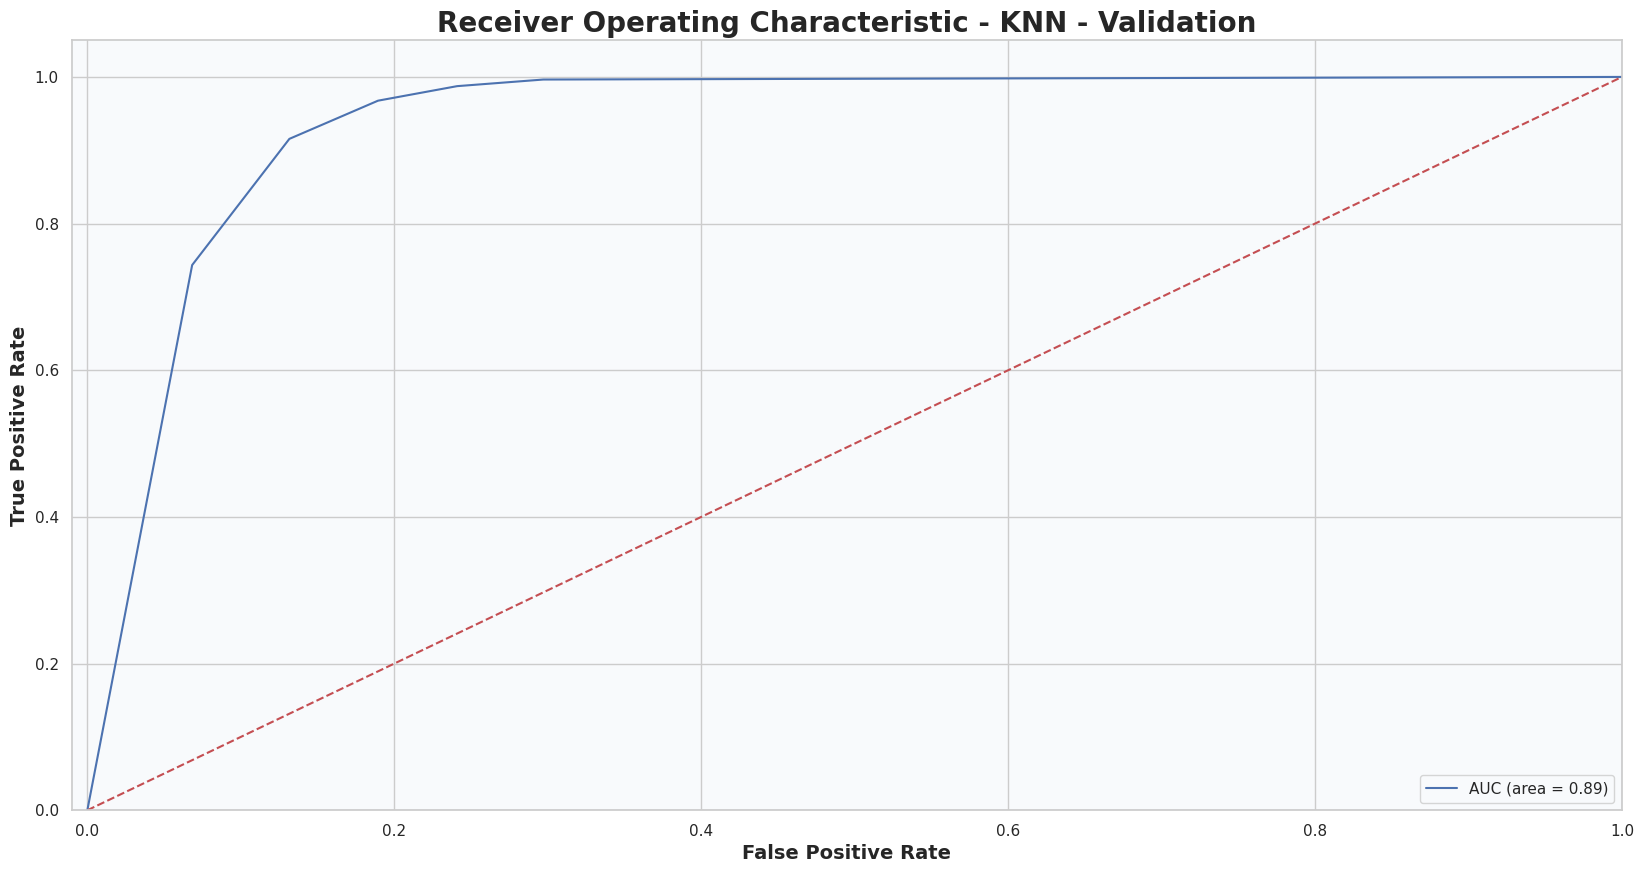

In [247]:
# AUC-ROC curve Validation Set
logit_roc_auc = roc_auc_score(y_val, y_pred_knn_val)
fpr, tpr, thresholds = roc_curve(y_val, knn_model.predict_proba(X_val)[:, 1])

plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic - KNN - Validation', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

### Decision tree

In [248]:
# Decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [249]:
dt_model.random_state


42

In [250]:
dt_model.min_samples_leaf


1

In [251]:
dt_model.min_samples_split


2

In [252]:
dt_model.max_features_


20

In [253]:
dt_model.n_features_in_


20

In [254]:
dt_model.feature_names_in_


array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact_type', 'month', 'day_of_week', 'last_contact_duration',
       'campaign', 'passed_days', 'previous', 'previous_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor3m', 'number_of_employees'],
      dtype=object)

In [255]:
dt_model.feature_importances_


array([0.03819293, 0.02323842, 0.00872056, 0.02175975, 0.00763695,
       0.01227297, 0.00942471, 0.01469083, 0.01244931, 0.02184766,
       0.39452069, 0.01845046, 0.        , 0.00709507, 0.00541944,
       0.00587657, 0.03262634, 0.09485452, 0.05956788, 0.21135495])

In [256]:
# Training Set Estimation
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_train


array([0, 0, 1, ..., 1, 0, 1])

In [257]:
# Validation Set Estimation
y_pred_dt_val = dt_model.predict(X_val)
y_pred_dt_val


array([1, 0, 0, ..., 0, 0, 1])

In [258]:
# Training Probabilities
y_pred_dt_train_Proba = dt_model.predict_proba(X_train)
y_pred_dt_train_Proba


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [259]:
# Validation Probabilities
y_pred_dt_val_Proba = dt_model.predict_proba(X_val)
y_pred_dt_val_Proba

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [260]:
# Training Classification Report
print("================== DT Training Classification Report ==================\n")
print(classification_report(y_train, y_pred_dt_train))

================== DT Training Classification Report ==================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12799
           1       1.00      1.00      1.00     12776

    accuracy                           1.00     25575
   macro avg       1.00      1.00      1.00     25575
weighted avg       1.00      1.00      1.00     25575



In [261]:
# Evaluate the model on the training set
print('=' * 47)
print('======== DT Training ========')
print('=' * 47)

thresh = 0.5

dt_train_auc, dt_train_accuracy, dt_train_recall, dt_train_precision, dt_train_specificity, dt_train_f1, dt_train_log_loss = print_report(y_train, y_pred_dt_train, thresh)

======== DT Training ========
AUC: 1.000
Accuracy: 1.000
Recall: 1.000
Precision: 1.000
Specificity: 1.000
Popularity: 0.500
F1: 1.000
Log Loss: 0.000
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   12799 |
+----------------+---------+
| False Positive |       0 |
+----------------+---------+
| False Negative |       0 |
+----------------+---------+
| True Positive  |   12776 |
+----------------+---------+
 


In [262]:
# Validation Classification Report
print("================== DT Validation Classification Report ==================\n")
print(classification_report(y_val, y_pred_dt_val))


================== DT Validation Classification Report ==================

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     12709
           1       0.90      0.91      0.91     12867

    accuracy                           0.91     25576
   macro avg       0.91      0.91      0.91     25576
weighted avg       0.91      0.91      0.91     25576



In [263]:
# Evaluate the model on the validation set
print('=' * 48)
print('======== DT Validation ========')
print('=' * 48)

thresh = 0.5

dt_val_auc, dt_val_accuracy, dt_val_recall, dt_val_precision, dt_val_specificity, dt_val_f1, dt_val_log_loss = print_report(y_val, y_pred_dt_val, thresh)


======== DT Validation ========
AUC: 0.906
Accuracy: 0.906
Recall: 0.913
Precision: 0.902
Specificity: 0.900
Popularity: 0.503
F1: 0.908
Log Loss: 3.372
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   11437 |
+----------------+---------+
| False Positive |    1272 |
+----------------+---------+
| False Negative |    1121 |
+----------------+---------+
| True Positive  |   11746 |
+----------------+---------+
 


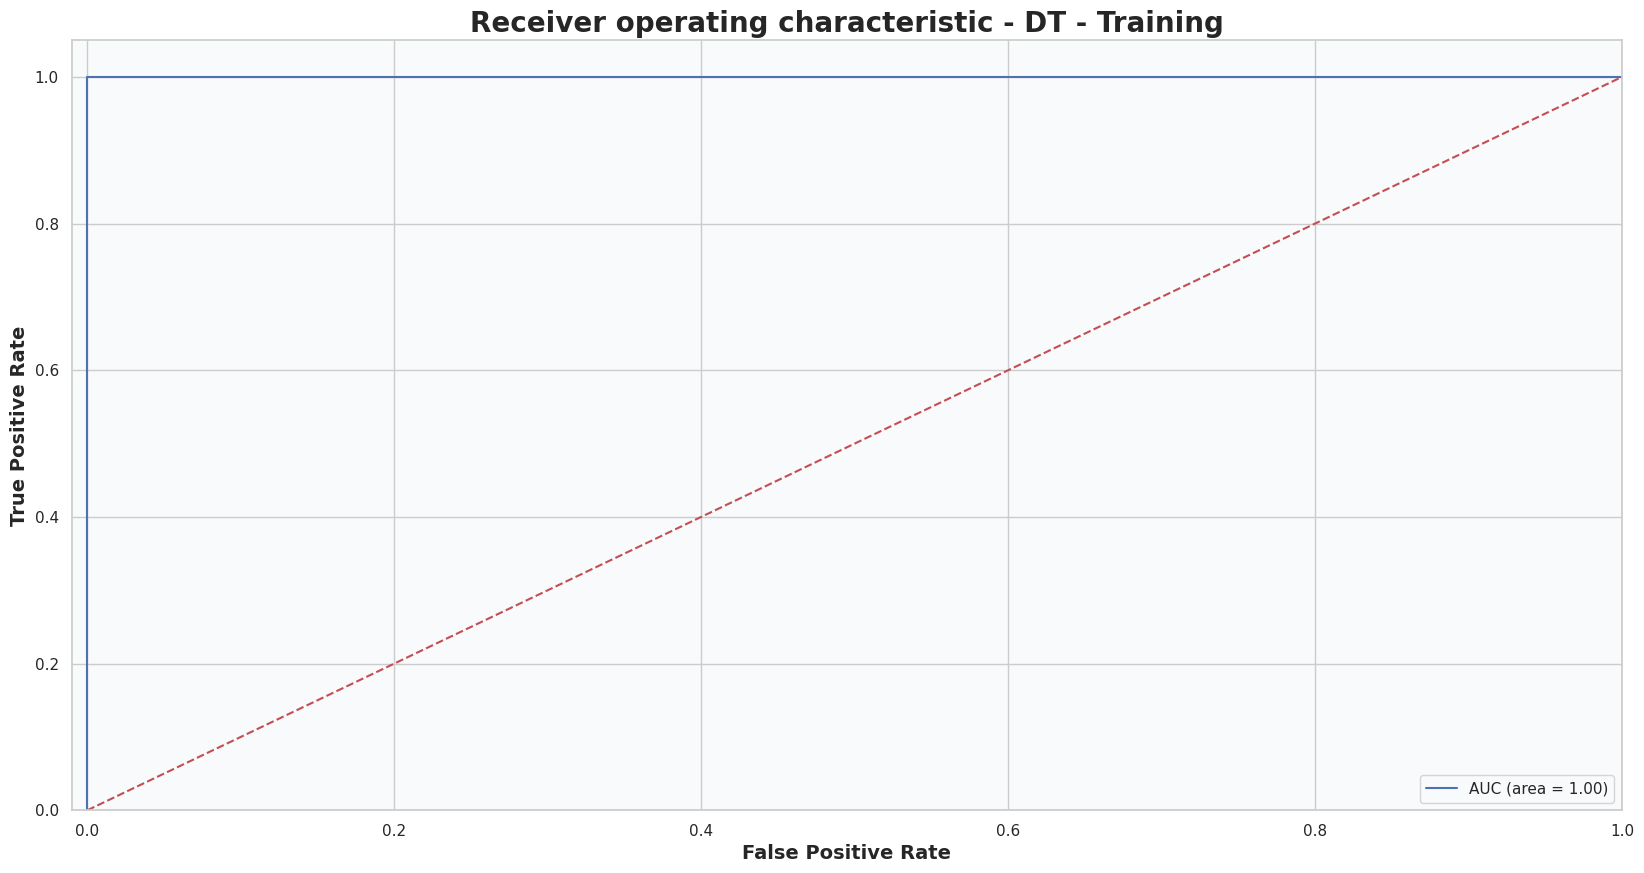

In [264]:
# AUC-ROC curve Training Set
logit_roc_auc = roc_auc_score(y_train, y_pred_dt_train)
fpr, tpr, thresholds = roc_curve(y_train, dt_model.predict_proba(X_train)[:, 1])

plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver operating characteristic - DT - Training', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()


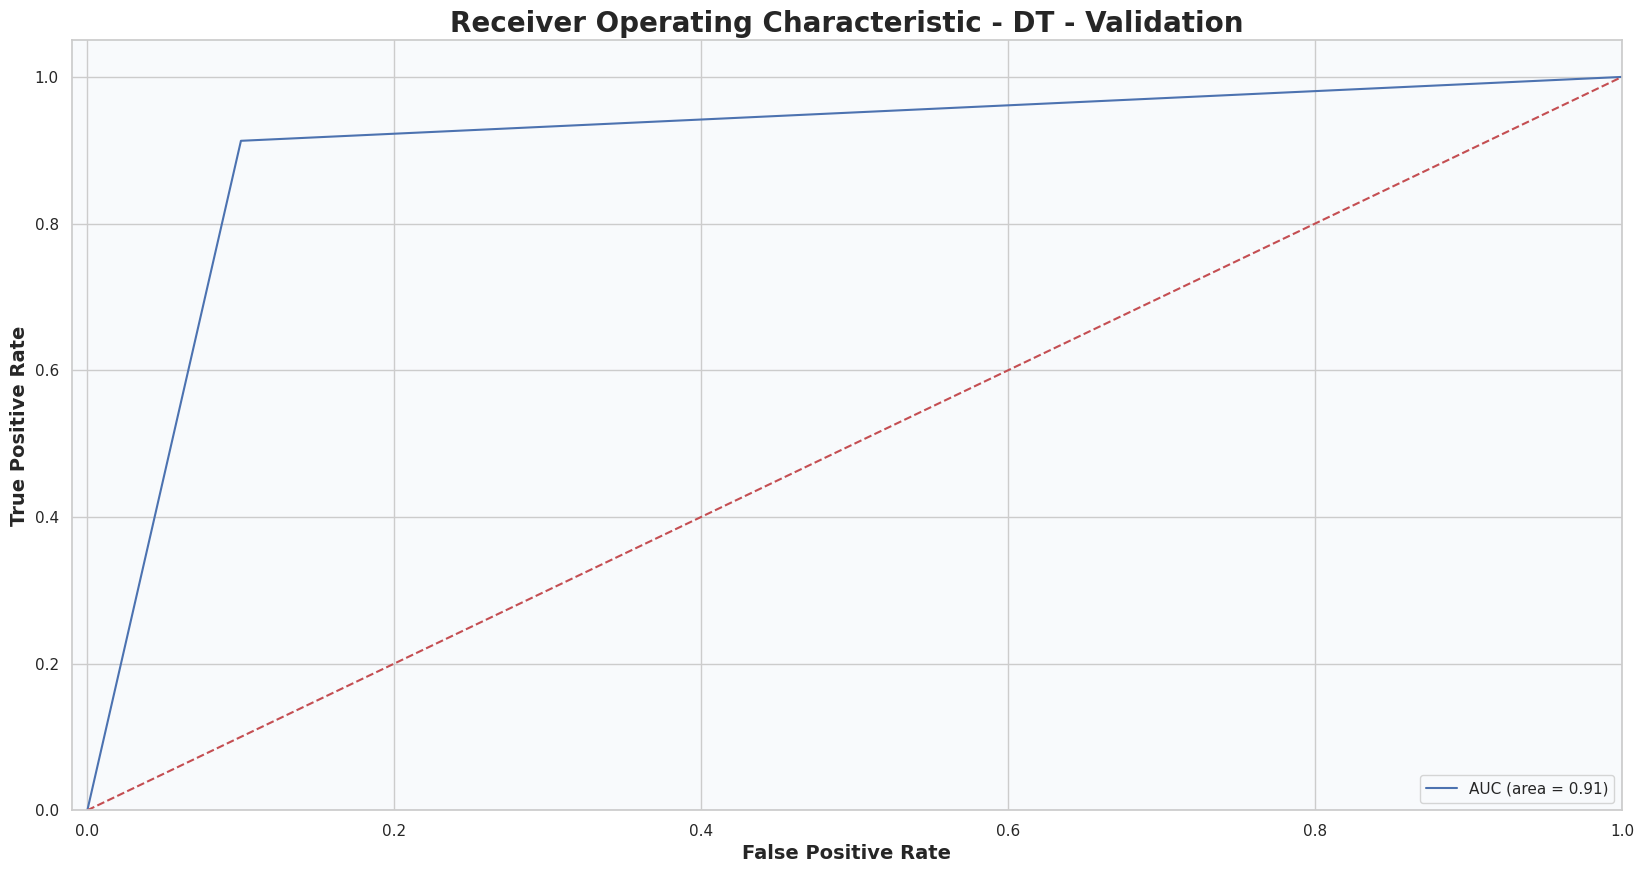

In [265]:
# AUC-ROC curve Validation Set
logit_roc_auc = roc_auc_score(y_val, y_pred_dt_val)
fpr, tpr, thresholds = roc_curve(y_val, dt_model.predict_proba(X_val)[:, 1])

plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic - DT - Validation', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()


### Random Forest

In [266]:
# Random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [267]:
rf_model.random_state


42

In [268]:
rf_model.min_samples_leaf


1

In [269]:
rf_model.min_samples_split


2

In [270]:
rf_model.n_features_in_


20

In [271]:
rf_model.feature_names_in_


array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact_type', 'month', 'day_of_week', 'last_contact_duration',
       'campaign', 'passed_days', 'previous', 'previous_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor3m', 'number_of_employees'],
      dtype=object)

In [272]:
rf_model.feature_importances_


array([0.04490096, 0.03037731, 0.0143841 , 0.02933582, 0.0231499 ,
       0.02934239, 0.02022245, 0.03739887, 0.02439266, 0.02963008,
       0.31916744, 0.02305116, 0.        , 0.00949787, 0.00974037,
       0.05950333, 0.04646715, 0.05554353, 0.10209809, 0.09179652])

In [273]:
# Training Set Estimation
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_train


array([0, 0, 1, ..., 1, 0, 1])

In [274]:
# Validation Set Estimation
y_pred_rf_val = rf_model.predict(X_val)
y_pred_rf_val

array([0, 0, 0, ..., 0, 0, 1])

In [275]:
# Training Probabilities
y_pred_rf_train_Proba = rf_model.predict_proba(X_train)
y_pred_rf_train_Proba


array([[0.69, 0.31],
       [1.  , 0.  ],
       [0.  , 1.  ],
       ...,
       [0.02, 0.98],
       [0.99, 0.01],
       [0.06, 0.94]])

In [276]:
# Validation Probabilities
y_pred_rf_val_Proba = rf_model.predict_proba(X_val)
y_pred_rf_val_Proba


array([[0.57, 0.43],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [0.9 , 0.1 ],
       [0.99, 0.01],
       [0.04, 0.96]])

In [277]:
# Training Classification Report
print("================== RF Training Classification Report ==================\n")
print(classification_report(y_train, y_pred_rf_train))


================== RF Training Classification Report ==================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12799
           1       1.00      1.00      1.00     12776

    accuracy                           1.00     25575
   macro avg       1.00      1.00      1.00     25575
weighted avg       1.00      1.00      1.00     25575



In [278]:
# Evaluate the model on the training set
print('=' * 47)
print('======== RF Training ========')
print('=' * 47)

thresh = 0.5

rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity, rf_train_f1, rf_train_log_loss = print_report(y_train, y_pred_rf_train, thresh)

======== RF Training ========
AUC: 1.000
Accuracy: 1.000
Recall: 1.000
Precision: 1.000
Specificity: 1.000
Popularity: 0.500
F1: 1.000
Log Loss: 0.000
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   12799 |
+----------------+---------+
| False Positive |       0 |
+----------------+---------+
| False Negative |       0 |
+----------------+---------+
| True Positive  |   12776 |
+----------------+---------+
 


In [280]:
# Validation Classification Report
print("================== RF Validation Classification Report ==================\n")
print(classification_report(y_val, y_pred_rf_val))


================== RF Validation Classification Report ==================

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     12709
           1       0.93      0.96      0.94     12867

    accuracy                           0.94     25576
   macro avg       0.94      0.94      0.94     25576
weighted avg       0.94      0.94      0.94     25576



In [281]:
# Evaluate the model on the validation set
print('=' * 48)
print('======== RF Validation ========')
print('=' * 48)

thresh = 0.5

rf_val_auc, rf_val_accuracy, rf_val_recall, rf_val_precision, rf_val_specificity, rf_val_f1, rf_val_log_loss = print_report(y_val, y_pred_rf_val, thresh)


======== RF Validation ========
AUC: 0.941
Accuracy: 0.941
Recall: 0.957
Precision: 0.927
Specificity: 0.924
Popularity: 0.503
F1: 0.942
Log Loss: 2.141
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |   11745 |
+----------------+---------+
| False Positive |     964 |
+----------------+---------+
| False Negative |     555 |
+----------------+---------+
| True Positive  |   12312 |
+----------------+---------+
 


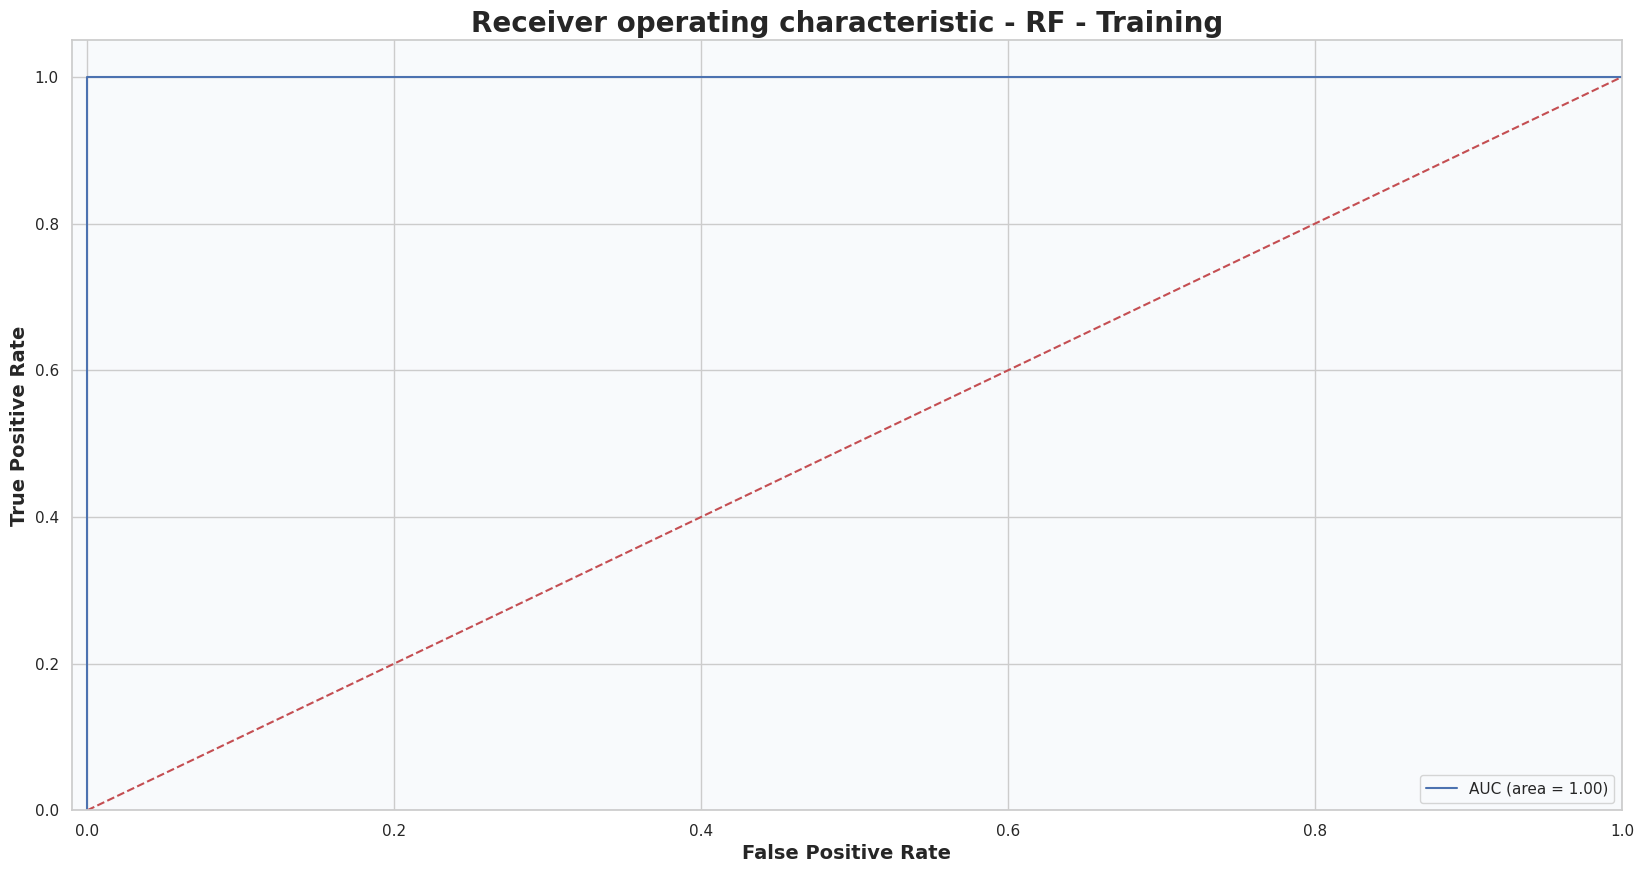

In [282]:
# AUC-ROC curve Training Set
logit_roc_auc = roc_auc_score(y_train, y_pred_rf_train)
fpr, tpr, thresholds = roc_curve(y_train, rf_model.predict_proba(X_train)[:, 1])

plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver operating characteristic - RF - Training', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()


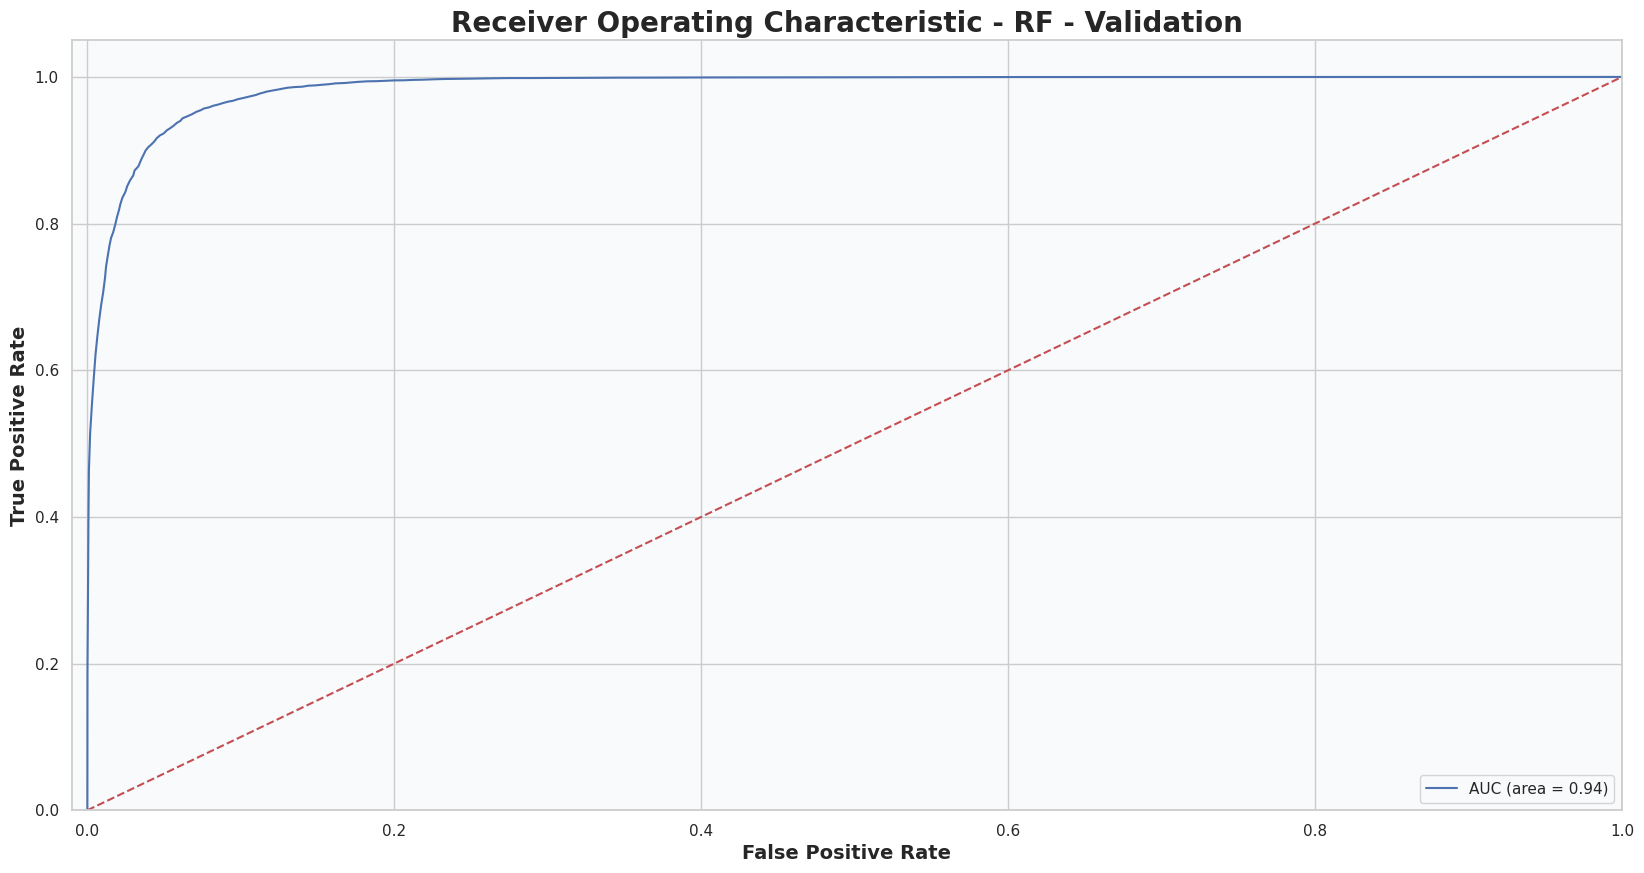

In [283]:
# AUC-ROC curve Validation Set
logit_roc_auc = roc_auc_score(y_val, y_pred_rf_val)
fpr, tpr, thresholds = roc_curve(y_val, rf_model.predict_proba(X_val)[:, 1])

plt.figure(figsize=(20, 10))

plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('Receiver Operating Characteristic - RF - Validation', fontsize=20, fontweight='bold')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()


### Analysis of results

In [284]:
# Analyze training results
# Create a DataFrame to store the results
train_results_df = pd.DataFrame({ 'Algorithm': ['Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest'],
                                  'AUC': [lr_train_auc, svm_train_auc, knn_train_auc, dt_train_auc, rf_train_auc],
                                  'Accuracy': [lr_train_accuracy, svm_train_accuracy, knn_train_accuracy, dt_train_accuracy, rf_train_accuracy],
                                  'Recall': [lr_train_recall, svm_train_recall, knn_train_recall, dt_train_recall, rf_train_recall],
                                  'Precision': [lr_train_precision, svm_train_precision, knn_train_precision, dt_train_precision, rf_train_precision],
                                  'Specificity': [lr_train_specificity, svm_train_specificity, knn_train_specificity, dt_train_specificity, rf_train_specificity],
                                  'F1 Score': [lr_train_f1, svm_train_f1, knn_train_f1, dt_train_f1, rf_train_f1],
                                  'Log Loss': [lr_train_log_loss, svm_train_log_loss, knn_train_log_loss, dt_train_log_loss, rf_train_log_loss]
                                })


In [286]:
train_results_df

Algorithm       AUC  Accuracy    Recall  Precision  \
0     Logistic Regression  0.826953  0.826940  0.840717   0.817926   
1  Support Vector Machine  0.788965  0.789091  0.649029   0.901108   
2     K Nearest Neighbors  0.922443  0.922385  0.986459   0.874298   
3           Decision Tree  1.000000  1.000000  1.000000   1.000000   
4           Random Forest  1.000000  1.000000  1.000000   1.000000   

   Specificity  F1 Score      Log Loss  
0     0.813189  0.829165  6.237701e+00  
1     0.928901  0.754573  7.601934e+00  
2     0.858426  0.926998  2.797523e+00  
3     1.000000  1.000000  2.220446e-16  
4     1.000000  1.000000  2.220446e-16

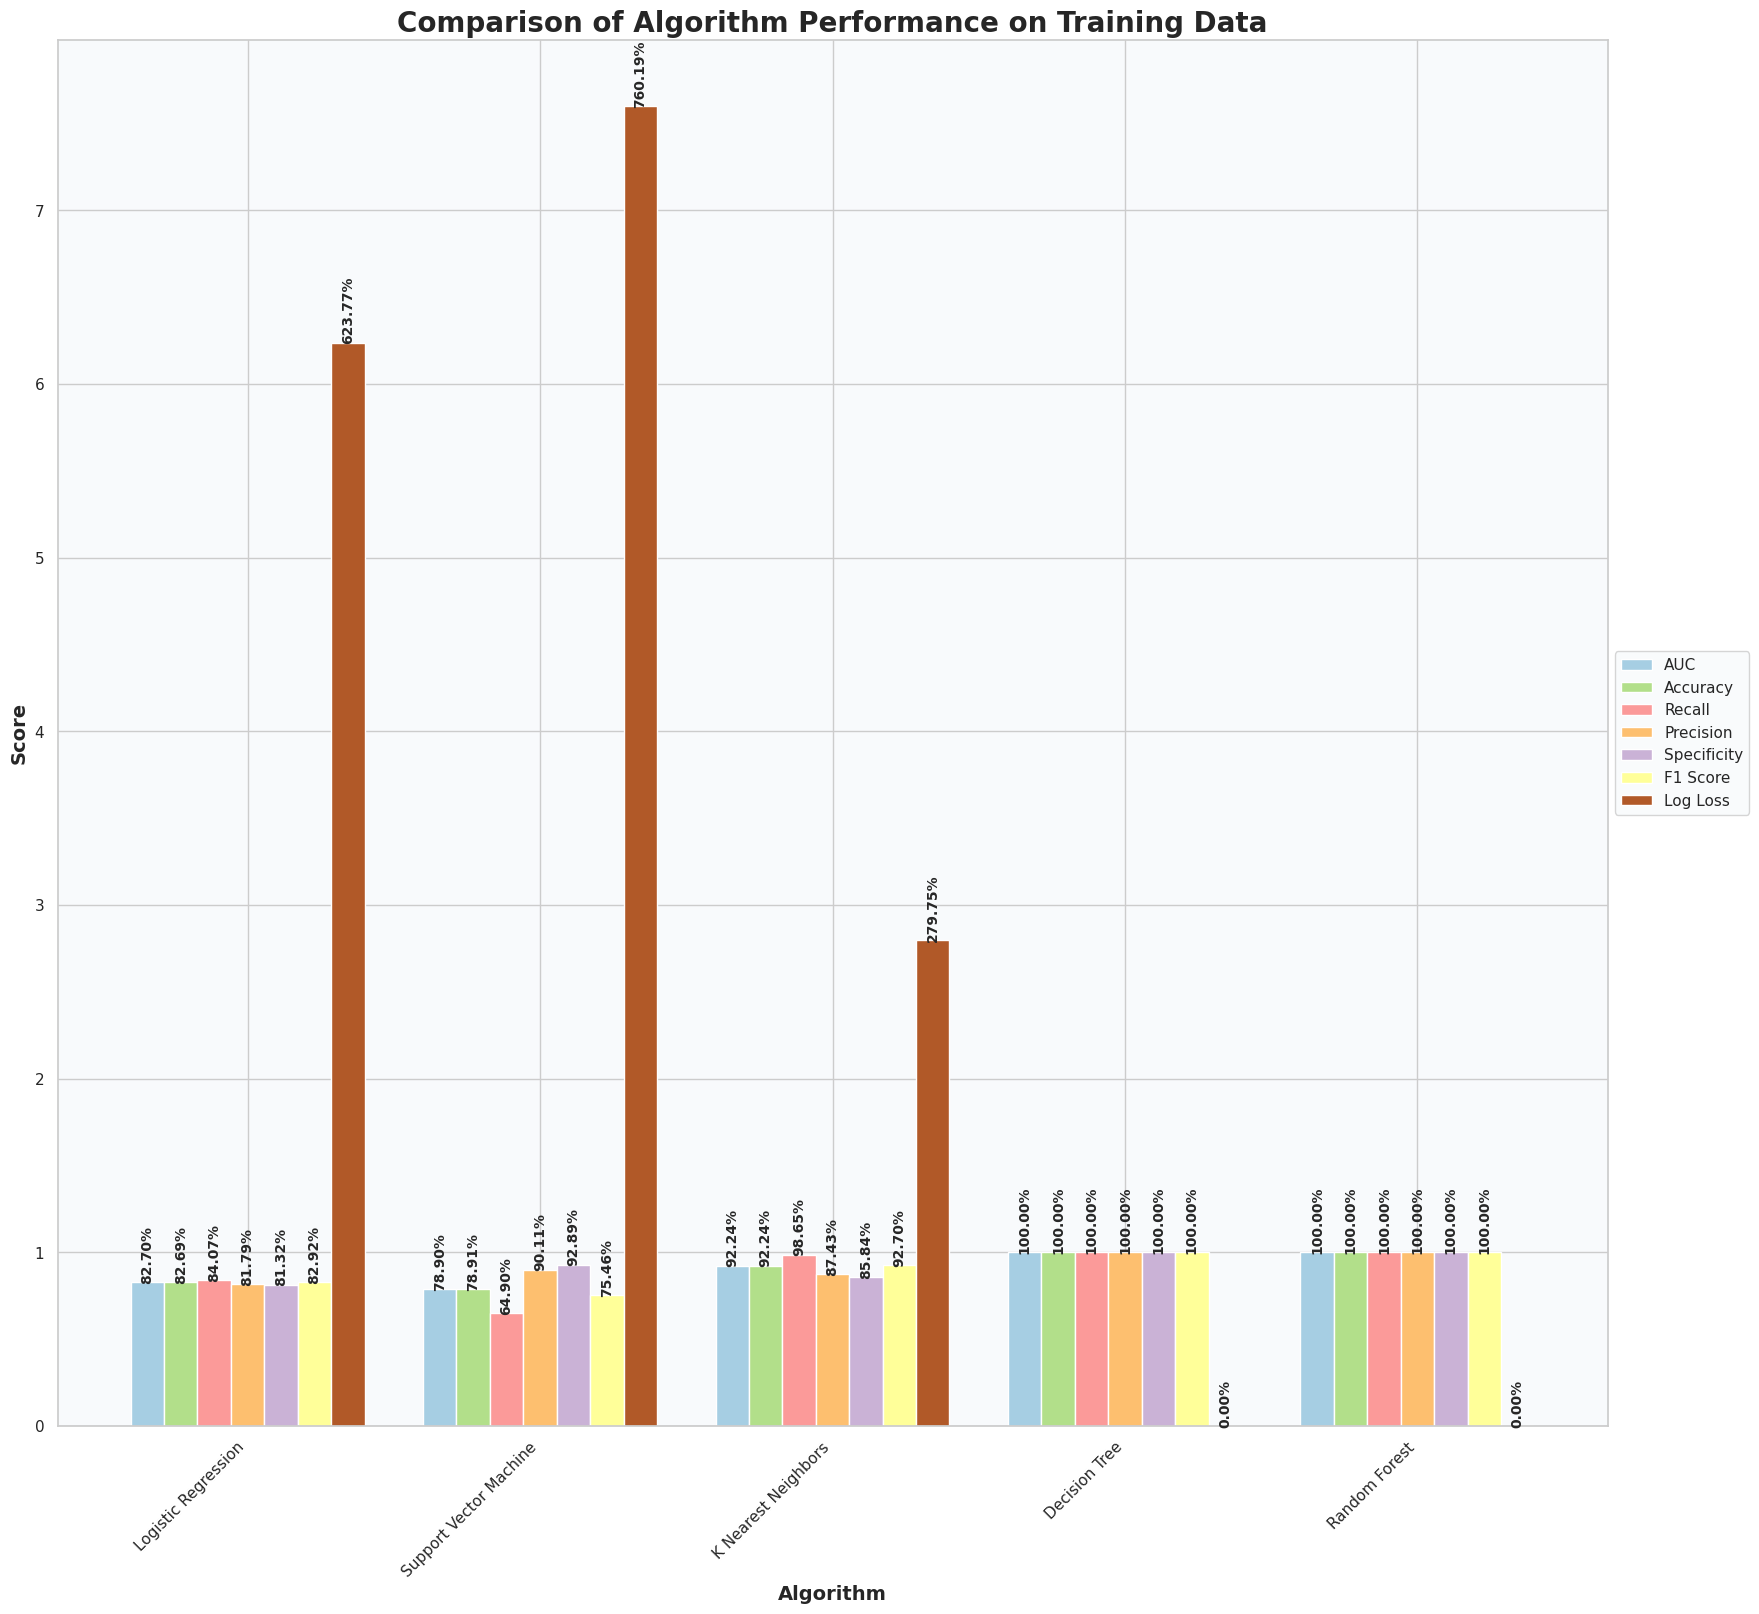

In [291]:
# Set the Algorithm column as the index for better plotting
ax = train_results_df.set_index('Algorithm').plot(kind='bar', colormap='Paired', width=0.8, figsize=(20, 18))

# Add borders to the plot
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# Display percentage values on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    offset = 0.01
    ax.annotate(f'{height:.2%}', (x + width/2, y + height + offset), ha='center', fontsize=10, fontweight='bold', rotation=90)

plt.title('Comparison of Algorithm Performance on Training Data', fontsize=20, fontweight='bold')
plt.xlabel('Algorithm', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-tick labels as algorithm names
plt.xticks(range(len(train_results_df)), train_results_df['Algorithm'], rotation=45, ha='right')

plt.show()


In [292]:
# Analyze validation results
# Create a DataFrame to store the results
val_results_df = pd.DataFrame({ 'Algorithm': ['Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest'],
                                  'AUC': [lr_val_auc, svm_val_auc, knn_val_auc, dt_val_auc, rf_val_auc],
                                  'Accuracy': [lr_val_accuracy, svm_val_accuracy, knn_val_accuracy, dt_val_accuracy, rf_val_accuracy],
                                  'Recall': [lr_val_recall, svm_val_recall, knn_val_recall, dt_val_recall, rf_val_recall],
                                  'Precision': [lr_val_precision, svm_val_precision, knn_val_precision, dt_val_precision, rf_val_precision],
                                  'Specificity': [lr_val_specificity, svm_val_specificity, knn_val_specificity, dt_val_specificity, rf_val_specificity],
                                  'F1 Score': [lr_val_f1, svm_val_f1, knn_val_f1, dt_val_f1, rf_val_f1],
                                  'Log Loss': [lr_val_log_loss, svm_val_log_loss, knn_val_log_loss, dt_val_log_loss, rf_val_log_loss]
                                })


In [293]:
val_results_df

Algorithm       AUC  Accuracy    Recall  Precision  \
0     Logistic Regression  0.819382  0.819479  0.835082   0.811556   
1  Support Vector Machine  0.782703  0.781827  0.640864   0.895817   
2     K Nearest Neighbors  0.889099  0.889584  0.967592   0.837989   
3           Decision Tree  0.906396  0.906436  0.912878   0.902289   
4           Random Forest  0.940507  0.940608  0.956866   0.927388   

   Specificity  F1 Score  Log Loss  
0     0.803682  0.823151  6.506629  
1     0.924542  0.747191  7.863762  
2     0.810607  0.898139  3.979797  
3     0.899913  0.907553  3.372398  
4     0.924148  0.941896  2.140691

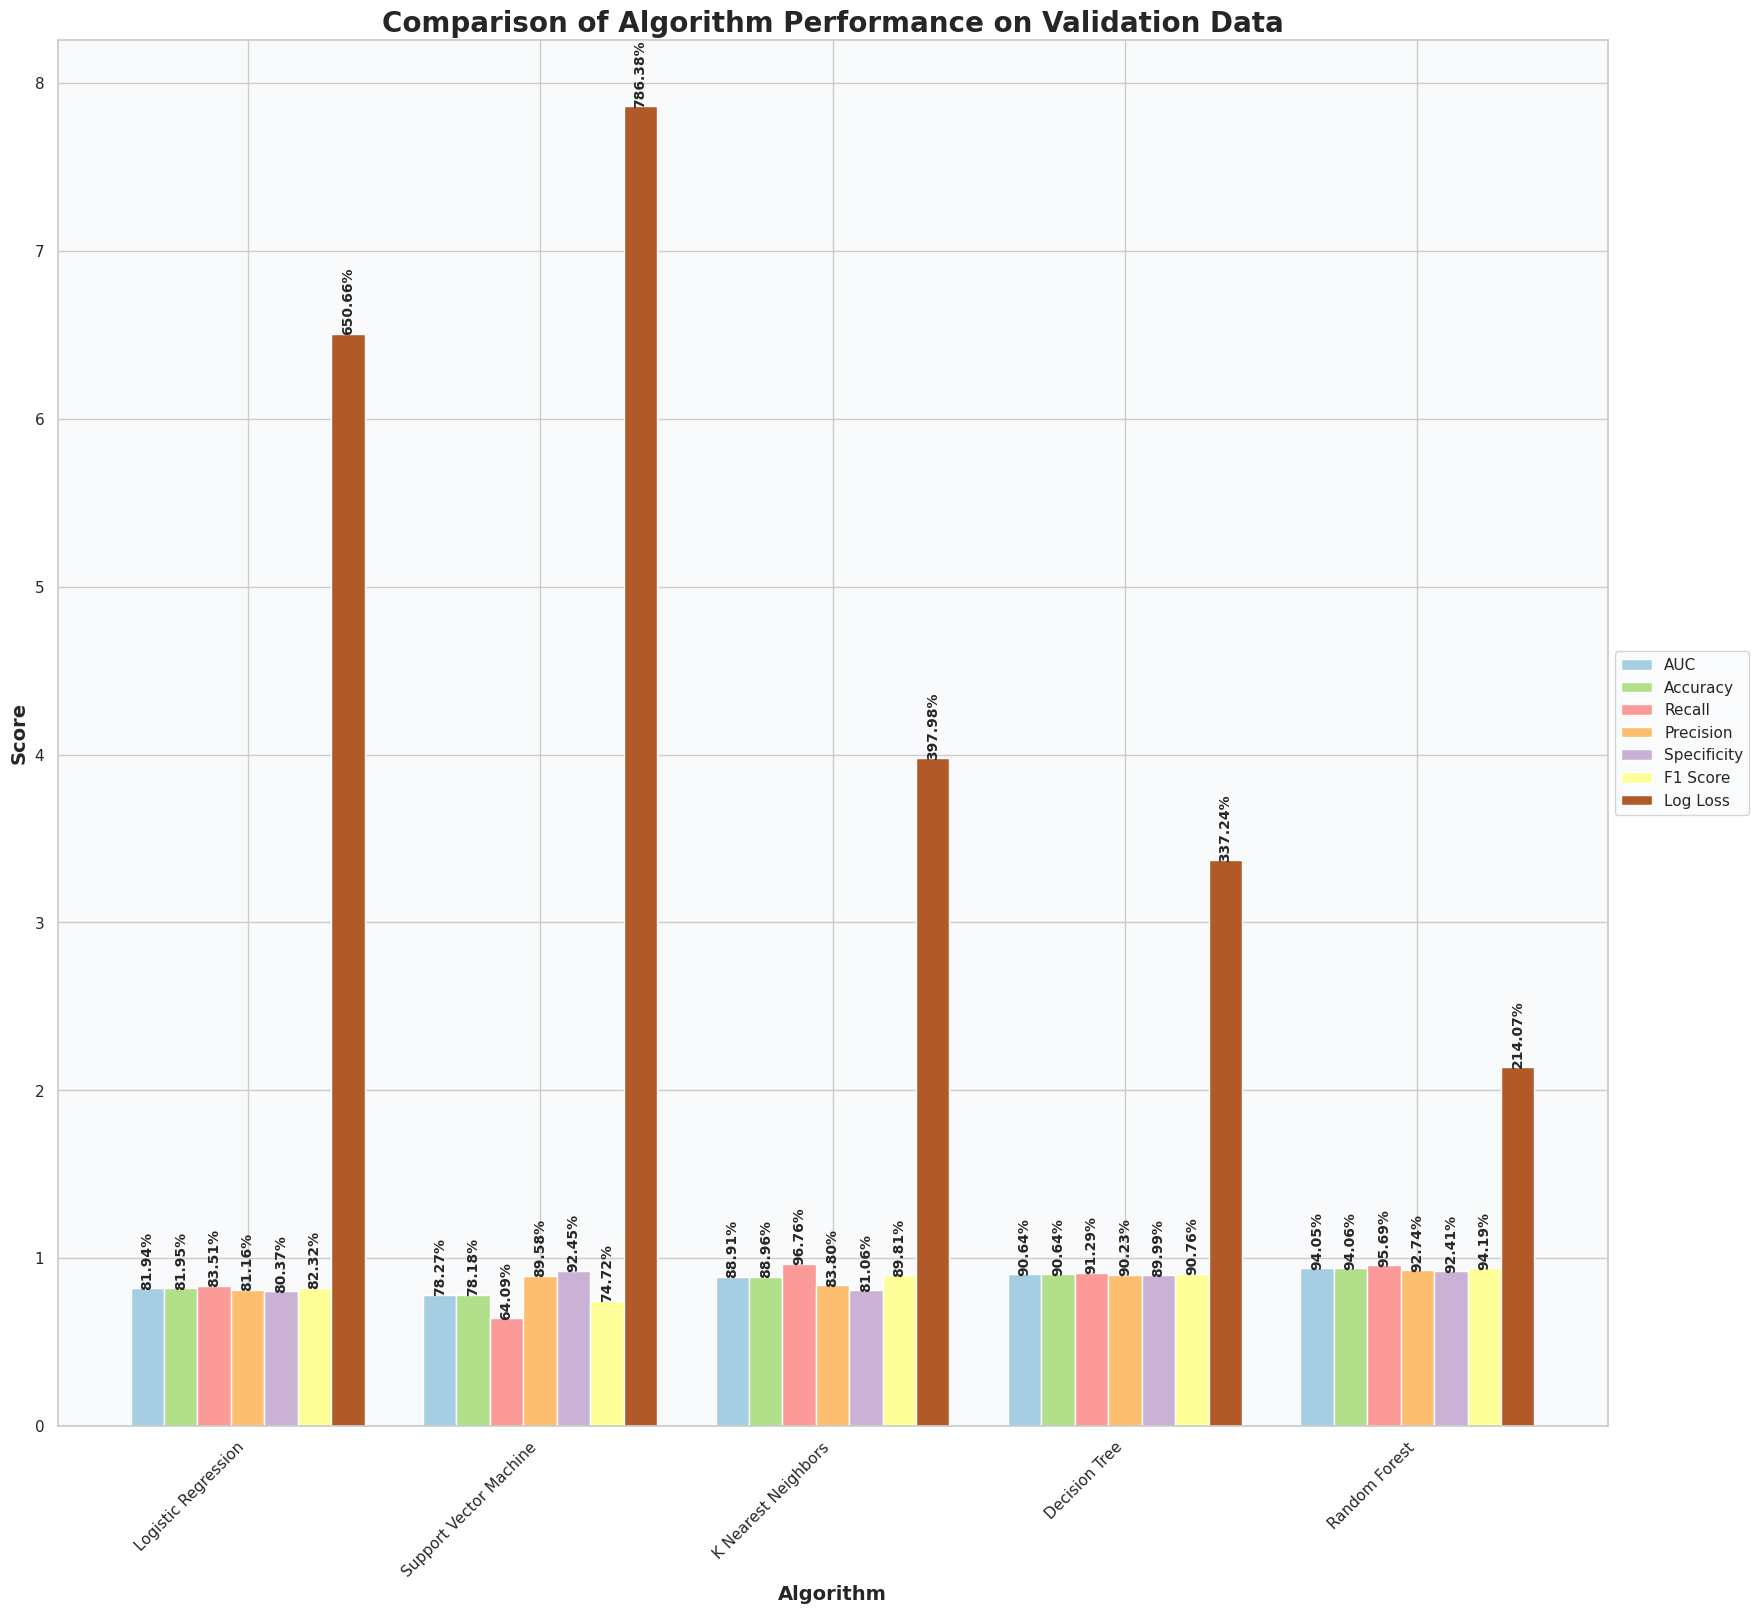

In [294]:
# Set the Algorithm column as the index for better plotting
ax = val_results_df.set_index('Algorithm').plot(kind='bar', colormap='Paired', width=0.8, figsize=(20, 18))

# Add borders to the plot
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# Display percentage values on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    offset = 0.01
    ax.annotate(f'{height:.2%}', (x + width/2, y + height + offset), ha='center', fontsize=10, fontweight='bold', rotation=90)

plt.title('Comparison of Algorithm Performance on Validation Data', fontsize=20, fontweight='bold')
plt.xlabel('Algorithm', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-tick labels as algorithm names
plt.xticks(range(len(val_results_df)), train_results_df['Algorithm'], rotation=45, ha='right')

plt.show()


### Feature Importance

In [295]:
# Feature importance for Logistic regression, Support Vector Machine and KNN
def plot_feature_importance_lr_svm(model, feature_names, algorithm_name, palette, edgecolor):
    if hasattr(model, 'coef_'):
        # For Logistic Regression
        importances = model.coef_[0]
    elif hasattr(model, 'coef'):
        # For Linear SVM
        importances = model.coef_[0]
    else:
        raise ValueError("The specified model does not support feature importances.")

    # Create a DataFrame to store feature names and importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort the DataFrame by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(20, 10))
    sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette=palette, edgecolor=edgecolor)

    # Add percentage labels above each bar
    for i, val in enumerate(feature_importance_df['Importance']):
        plt.text(i, val + 0.005, f'{val*100:.2f}%', ha='center', fontsize=10, fontweight='bold', rotation='vertical')

    plt.title(f'Feature Importance for {algorithm_name}', fontsize=20, fontweight='bold')
    plt.xlabel('Feature', fontsize=12, fontweight='bold')
    plt.ylabel('Importance', fontsize=12, fontweight='bold')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()


In [296]:
def plot_feature_importance_dt_rf(model, feature_names, algorithm_name, palette, edgecolor):
    if not hasattr(model, 'feature_importances_'):
        raise ValueError("The specified model does not support feature importances.")

    # Get feature importances from the model
    importances = model.feature_importances_

    # Create a DataFrame to store feature names and importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort the DataFrame by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(20, 10))
    sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette=palette, edgecolor=edgecolor)

    # Add percentage labels above each bar
    for i, val in enumerate(feature_importance_df['Importance']):
        plt.text(i, val + 0.005, f'{val*100:.2f}%', ha='center', fontsize=10, fontweight='bold', rotation='vertical')

    plt.title(f'Feature Importance for {algorithm_name}', fontsize=20, fontweight='bold')
    plt.xlabel('Feature', fontsize=12, fontweight='bold')
    plt.ylabel('Importance', fontsize=12, fontweight='bold')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()


In [298]:
var_names = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact_type', 'month', 'day_of_week', 'last_contact_duration',
       'campaign', 'passed_days', 'previous', 'previous_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor3m', 'number_of_employees']

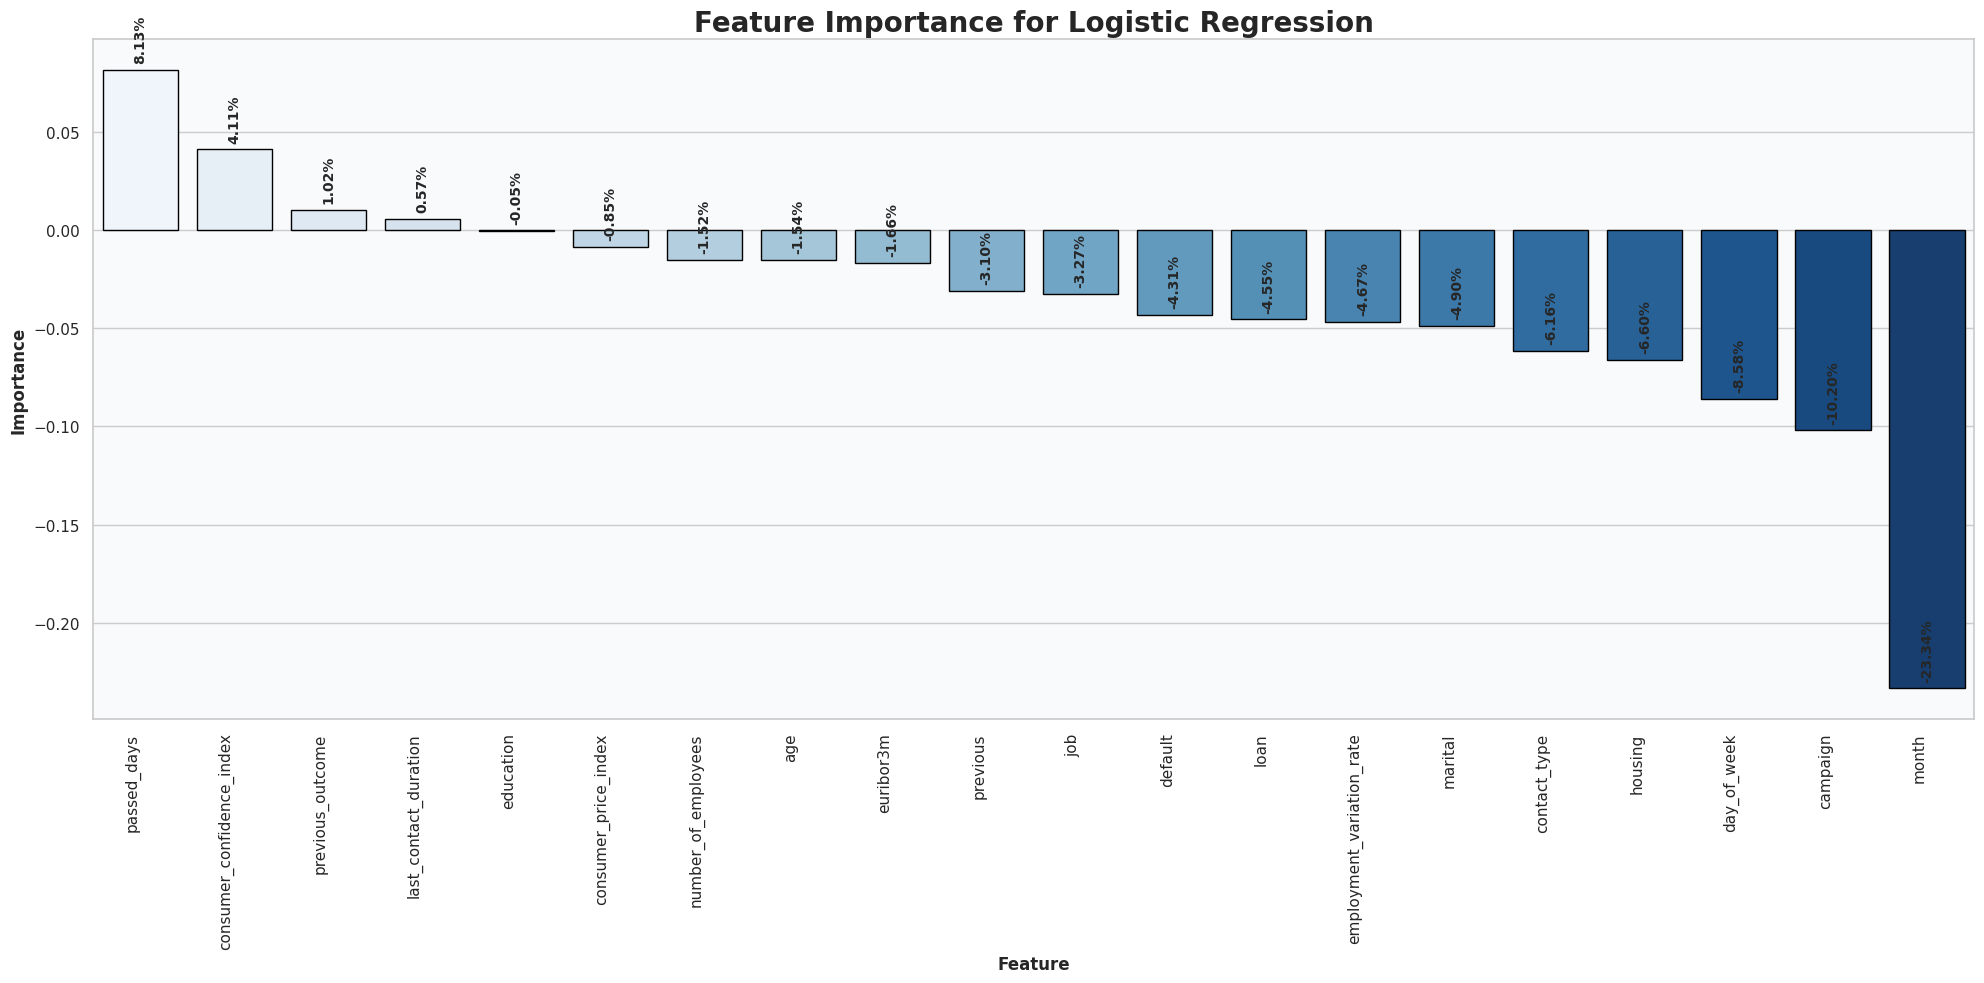

In [299]:
# Logistic Regression
plot_feature_importance_lr_svm(lr, var_names, 'Logistic Regression', palette='Blues', edgecolor='black')


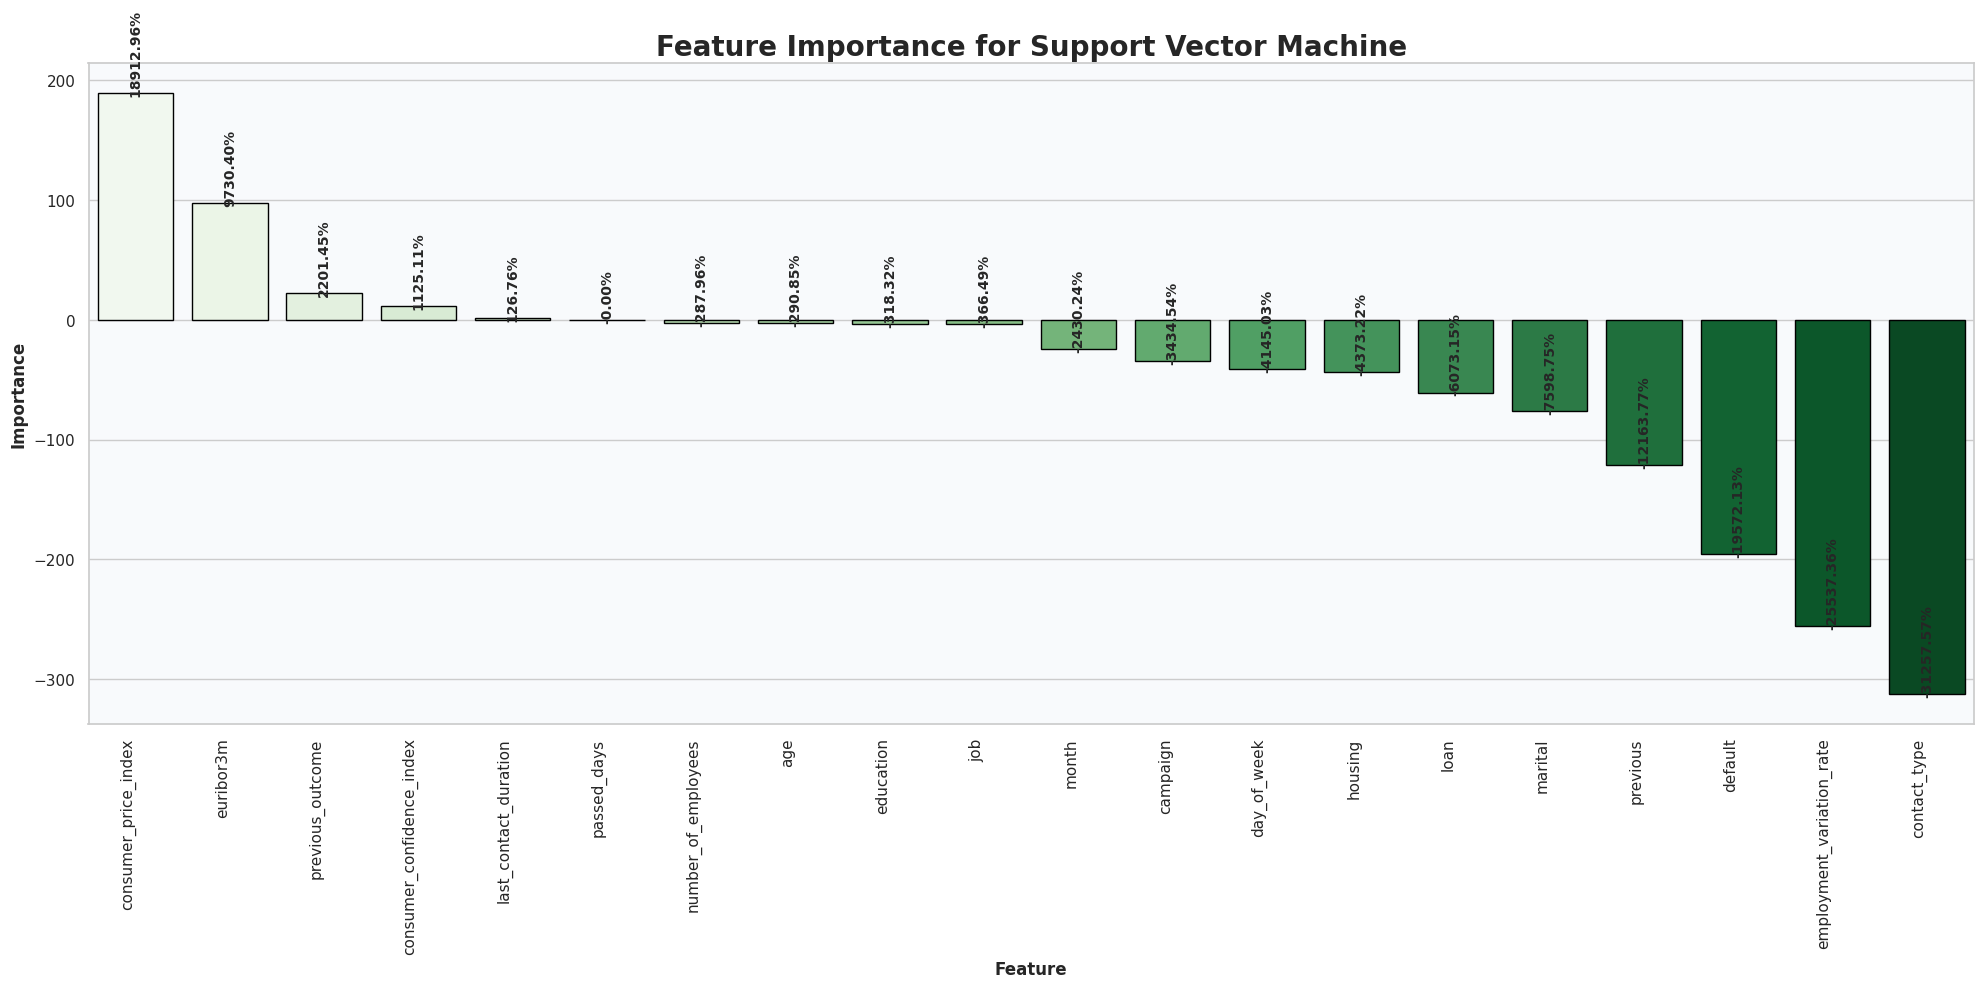

In [300]:
# Support Vector Machine
plot_feature_importance_lr_svm(svm_model, var_names, 'Support Vector Machine', palette='Greens', edgecolor='black')


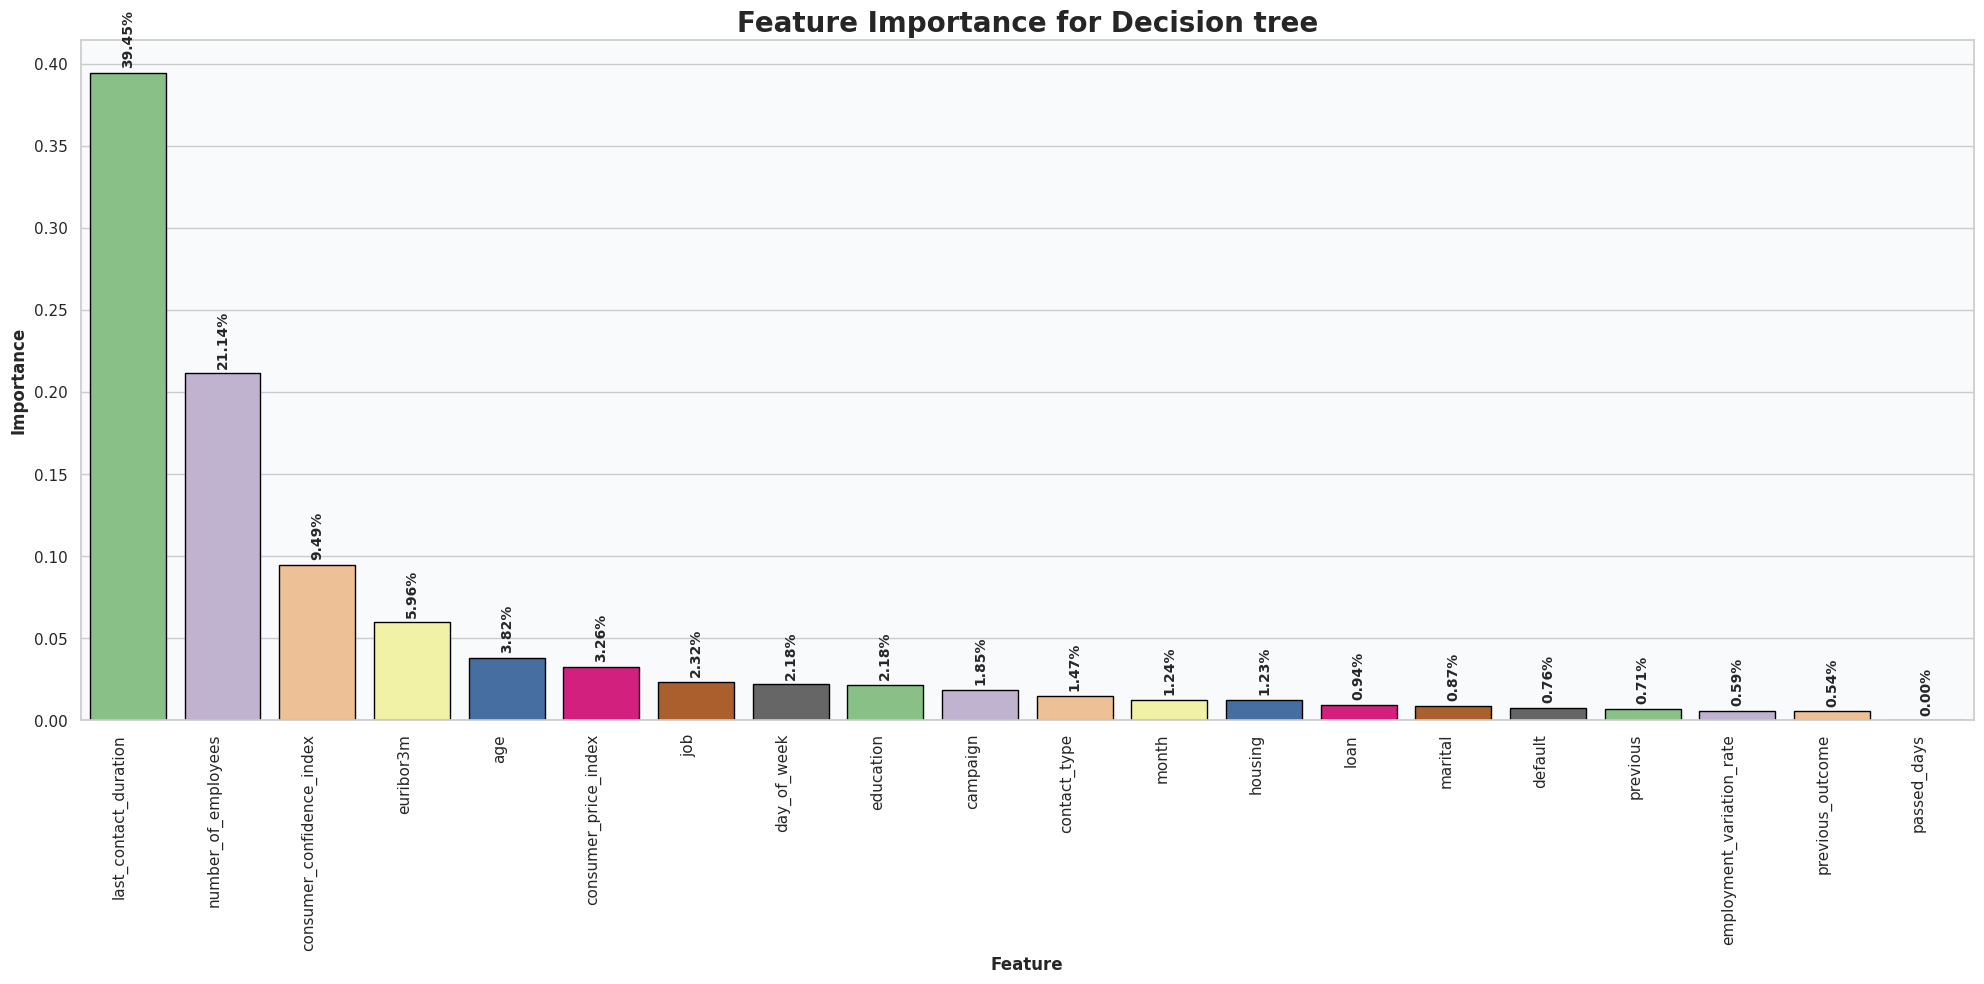

In [302]:
# Decision tree
feature_names = X_train.columns
plot_feature_importance_dt_rf(dt_model, feature_names, 'Decision tree', palette='Accent', edgecolor='black')


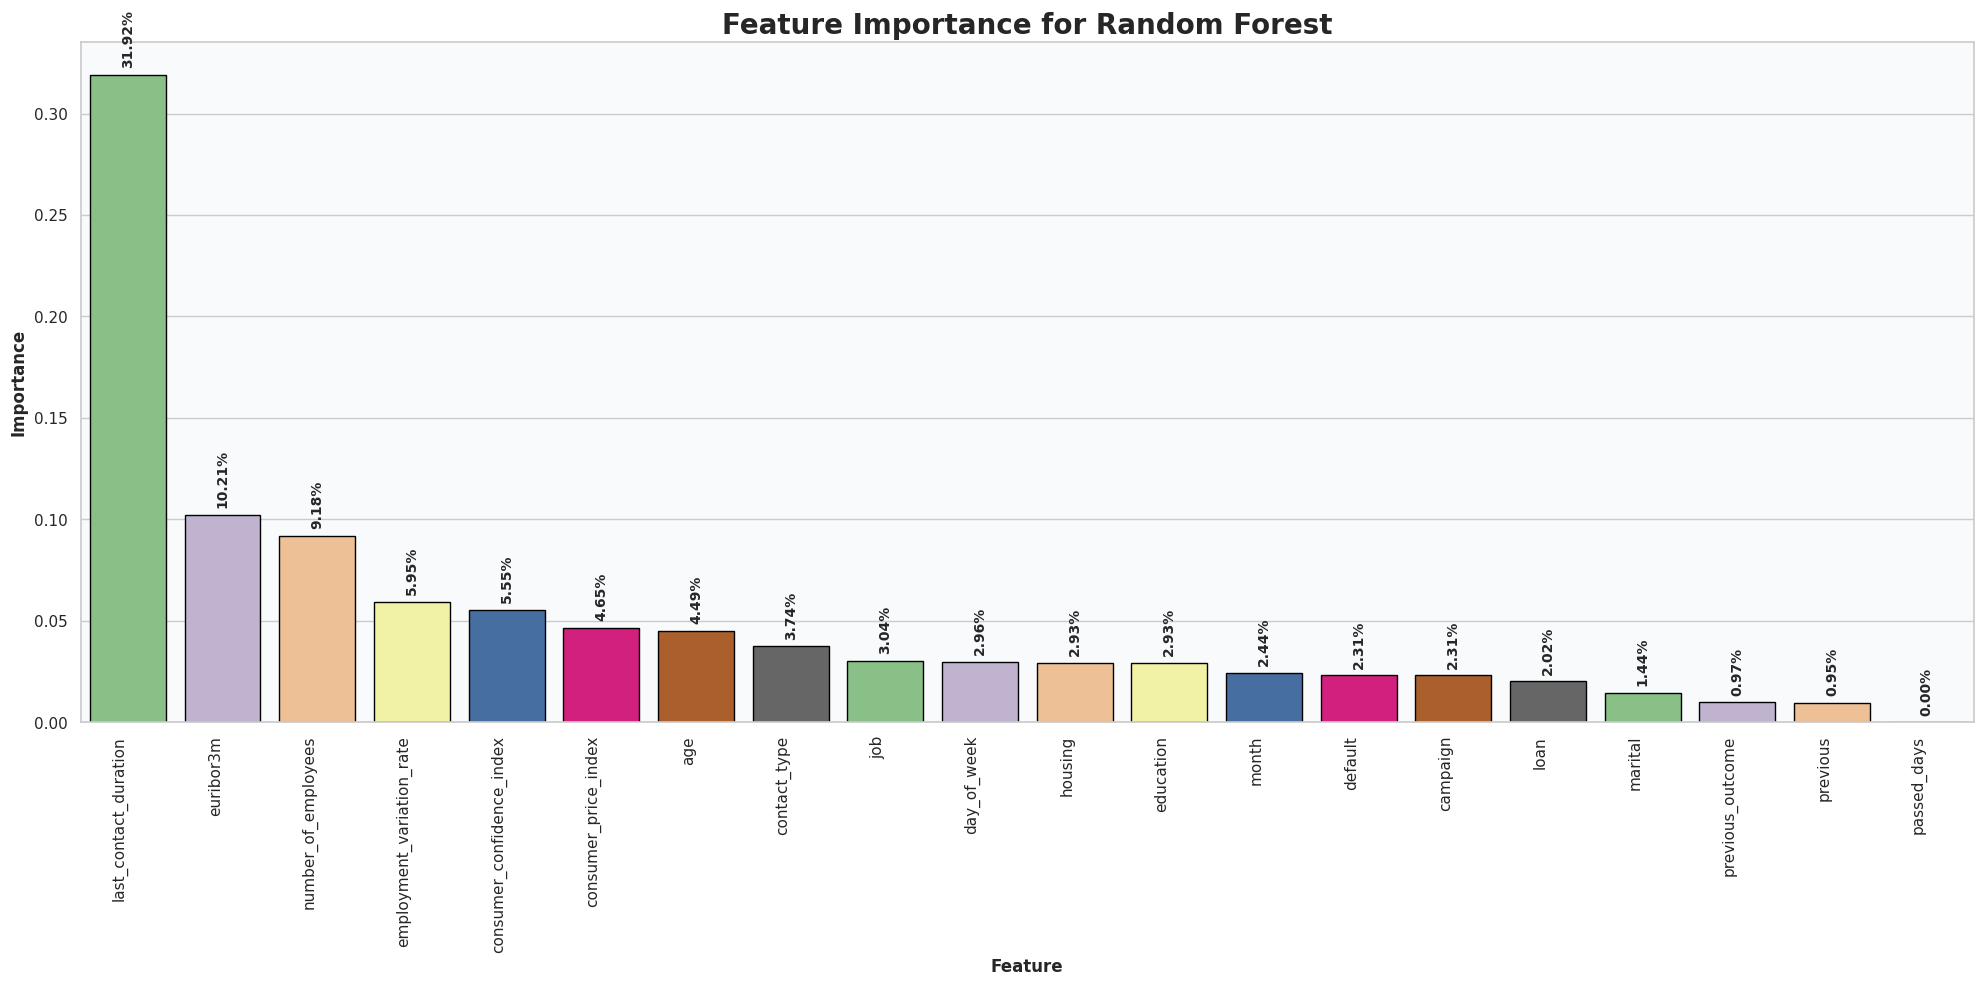

In [303]:
# Random Forest
feature_names = X_train.columns
plot_feature_importance_dt_rf(rf_model, feature_names, 'Random Forest', palette='Accent', edgecolor='black')
